In [1]:
from transformers import pipeline
from random import randrange        
from datasets import load_dataset
from rouge_score import rouge_scorer


c:\Users\raidb\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

dataset = load_dataset("samsum")

c:\Users\raidb\AppData\Local\Programs\Python\Python38\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
n = 20


In [4]:
import random

import numpy as np

# select the shortest dialogues
sorted_dataset_asc = sorted(dataset['test'], key=lambda x: len(x['dialogue']), reverse=False)
shortest_dialogues = sorted_dataset_asc[:n]

# select the longest dialogues
sorted_dataset_desc = sorted(dataset['test'], key=lambda x: len(x['dialogue']), reverse=True)
longest_dialogues = sorted_dataset_desc[:n]

# select random dialogues
np.random.seed(4) # 4
random_dialogues = np.random.choice(dataset['test'], n, replace=True)

In [5]:
# select dialogues with many speakers

def speakers(dialogue):
    speakers = set()
    for line in dialogue.split("\n"):
        speaker = line.split()[0].replace(":", "")
        speakers.add(speaker)
    return speakers

np.random.seed(6) # 6
multi_speaker_dialogues = []
added_dialogues = []

while len(multi_speaker_dialogues) < n:
    dialogue = np.random.choice(dataset['test'])
    if len(speakers(dialogue['dialogue'])) >= 5 and dialogue not in added_dialogues:
        multi_speaker_dialogues.append(dialogue)
        added_dialogues.append(dialogue['dialogue'])


In [6]:
# dialogues with contradictions or where the point is spread across multiple speakers / utterances
# obtained with chatgpt 4o 

# prompts: 

# i am doing an nlp project where i use different summarization models for conversation summarization. 
# i want to compare them on different small test splits. i need 20 dialogues and their summaries. 
# Dialogues where the speakers go back and forth in their conversation like this: "ann: movies at 5? Mary: i can't, 6? ann: maybe next time? Mary: actually nvm, 5 works. ann: ok see you". 
# Make sure to include shorter and longer dialogues, with 2 or more speakers. put them in SamSum format.

# put everything in python code and include Longer dialogues, still with contradictions

# good but give me LONGER dialogues and with 3+ speakers

# give LONGER dialogues, at least 10 utterances, and at least 3 speakers

# good, now give me 20 in total: 5 short with 2 speakers, 5 short with 3+ speakers, 5 with at least 10 utterances with 2 speakers, 5 with at least 10 utterances with 3+ speakers.

contradictions_dialogues = [
    {
        "dialogue": """Ann: Movies at 5?
Mary: I can't, 6?
Ann: Maybe next time?
Mary: Actually nvm, 5 works.
Ann: Ok, see you.""",
        "summary": "Ann and Mary decide to go to the movies at 5."
    },
    {
        "dialogue": """John: Hey, want to grab lunch?
Emily: Sure, where?
John: How about the new cafe?
Emily: Sounds good. 1 PM?
John: Perfect. See you then.""",
        "summary": "John and Emily plan to have lunch at the new cafe at 1 PM."
    },
    {
        "dialogue": """Tom: Did you finish the report?
Jerry: Not yet, still working on it.
Tom: When do you think it'll be done?
Jerry: By tomorrow morning.
Tom: Great, thanks.""",
        "summary": "Jerry tells Tom the report will be done by tomorrow morning."
    },
    {
        "dialogue": """Sarah: Can you pick up some milk?
Mark: Sure, anything else?
Sarah: Bread and eggs too.
Mark: Got it.""",
        "summary": "Sarah asks Mark to pick up milk, bread, and eggs."
    },
    {
        "dialogue": """Lisa: Are you coming to the party?
Megan: I might be late.
Lisa: No worries, just come when you can.
Megan: Will do, thanks!""",
        "summary": "Megan tells Lisa she might be late to the party but will come."
    },
    {
        "dialogue": """Jake: We need to brainstorm ideas for the new marketing campaign.
Laura: Let’s think outside the box this time.
Michael: How about a social media challenge?
Jake: Interesting. What kind of challenge?
Laura: Maybe something related to our product.
Michael: Like a photo contest with our product?
Jake: That could work. Any other ideas?
Laura: We could collaborate with influencers.
Michael: That’s a great idea. They have a wide reach.
Jake: Let’s list potential influencers we could contact.
Laura: I’ll handle that.
Michael: I’ll start drafting the challenge rules.
Jake: Perfect, we’re off to a good start.""",
        "summary": "Jake, Laura, and Michael brainstorm ideas for a new marketing campaign, including a social media challenge and collaborating with influencers."
    },
    {
        "dialogue": """Ann: We need to decide on the venue for the event.
John: I was thinking about the downtown hall.
Mary: Isn't that place a bit too small for our crowd?
Ann: True, but it’s quite central.
John: How about the new convention center?
Mary: That could work. It’s spacious and modern.
Ann: But isn’t it too expensive?
John: I heard they offer discounts for non-profits.
Mary: Really? That’s great news!
Ann: Then we should definitely consider it.
John: I’ll call them to get a quote.
Mary: Perfect, let us know what they say.
Ann: Sounds like a plan.""",
        "summary": "Ann, John, and Mary discuss the venue for their event and consider the new convention center due to its space and possible discounts."
    },
    {
        "dialogue": """Emily: We need to pick a destination for our next trip.
Liam: How about Italy?
Sophia: Italy sounds amazing! But what about the budget?
Emily: We could look for budget-friendly options.
Liam: We can stay in hostels or Airbnb.
Sophia: And maybe we can find cheap flights if we book early.
Emily: Good point. When should we go?
Liam: How about September?
Sophia: Perfect, the weather will still be nice.
Emily: Let’s start planning the itinerary.
Liam: I’ll check flights and accommodation.
Sophia: And I’ll research places to visit.
Emily: Great teamwork! This is going to be an awesome trip.""",
        "summary": "Emily, Liam, and Sophia plan a budget-friendly trip to Italy in September, dividing tasks to check flights, accommodation, and places to visit."
    },
    {
        "dialogue": """Linda: What should we do for Kate's birthday?
Tom: We could throw a surprise party.
Sophie: I love that idea! Where should we have it?
Linda: How about her favorite restaurant?
Tom: It might be too crowded and obvious.
Sophie: Maybe we can book a private room there.
Linda: That’s a great compromise.
Tom: I’ll call the restaurant to check availability.
Sophie: I can help with the decorations.
Linda: And I’ll handle the guest list.
Tom: This is going to be great!
Sophie: Kate will be so surprised and happy.
Linda: Definitely, she deserves it.""",
        "summary": "Linda, Tom, and Sophie plan a surprise birthday party for Kate at her favorite restaurant by booking a private room."
    },
    {
        "dialogue": """Mike: We should plan a team-building activity.
Sarah: That’s a good idea. Any suggestions?
Jake: What about a hiking trip?
Mike: Not everyone is into hiking.
Sarah: How about an escape room?
Jake: That sounds fun and inclusive.
Mike: I agree. It’s also good for teamwork.
Sarah: I’ll look for the best-rated escape rooms in the area.
Jake: I can help with that too.
Mike: Great, let’s decide on a date.
Sarah: How about next Friday?
Jake: Works for me.
Mike: Perfect, let’s finalize it then.""",
        "summary": "Mike, Sarah, and Jake plan a team-building activity and decide on an escape room for next Friday."
    },
    {
        "dialogue": """Emily: I think we should re-evaluate our marketing strategy.
James: Why do you say that?
Emily: Our current approach isn’t yielding the results we want.
James: What do you suggest we change?
Emily: We should focus more on social media campaigns.
James: That makes sense. What platforms do you think are best?
Emily: Instagram and TikTok have a lot of potential.
James: I agree. Should we hire a social media manager?
Emily: Yes, and we can also collaborate with influencers.
James: That’s a good idea. Any influencers in mind?
Emily: I have a few in mind. I can make a list.
James: Great, let’s get started on this right away.
Emily: I’ll draft a new strategy and share it with you.""",
        "summary": "Emily and James discuss re-evaluating their marketing strategy, focusing on social media and influencers."
    },
    {
        "dialogue": """John: Did you see the latest sales report?
Alice: Yes, our numbers are down this quarter.
John: We need to figure out why.
Alice: I think it’s because of the new competitor.
John: That’s possible. How should we respond?
Alice: We need to improve our product and marketing.
John: Agreed. Do you have any specific ideas?
Alice: We could launch a new feature.
John: That’s a good start. What else?
Alice: A targeted ad campaign might help.
John: Let’s work on a proposal for these changes.
Alice: I’ll start drafting it now.
John: Thanks, Alice. We’ll turn this around.""",
        "summary": "John and Alice discuss their declining sales numbers and plan to respond by improving their product and marketing strategies."
    },
    {
        "dialogue": """Karen: Are we still on for the meeting later?
Tom: Yes, I’m ready when you are.
Karen: Do you have the presentation materials?
Tom: I do. What about the handouts?
Karen: I printed them this morning.
Tom: Great, we’re all set then.
Karen: Did you confirm the time with the client?
Tom: Yes, they’ll be here at 3 PM.
Karen: Perfect. Let’s review the main points once more.
Tom: Sure, I’ll pull up the slides.
Karen: Thanks, Tom. This is going to go well.
Tom: I have a good feeling about it too.""",
        "summary": "Karen and Tom prepare for their meeting with a client, ensuring they have all materials ready and reviewing the main points."
    },
    {
        "dialogue": """Dave: Are we all set for the presentation tomorrow?
Megan: I’ve finished the slides.
Dave: What about the data analysis part?
Megan: I can cover that.
Dave: And the conclusion?
Megan: I’ve included it at the end.
Dave: Great, should we do a run-through?
Megan: Yes, after lunch?
Dave: Works for me.
Megan: I’ll reserve the conference room.
Dave: Good idea, thanks.
Megan: No problem, we’ll be ready.
Dave: I’m confident we’ll do well.""",
        "summary": "Dave and Megan finalize their plans for the presentation, with Megan handling slides and data analysis, and a run-through scheduled after lunch."
    },
    {
        "dialogue": """Nina: We need to finalize the guest list for the conference.
Eric: Do we have a preliminary list?
Nina: Yes, but we need to add more industry experts.
Eric: Any suggestions?
Nina: How about Dr. Smith from MIT?
Eric: Great idea. And maybe Professor Lee from Stanford?
Nina: Perfect. What about keynote speakers?
Eric: We should invite the CEO of TechCorp.
Nina: Excellent. Let’s send out the invitations soon.
Eric: I’ll draft the invitations today.
Nina: Thanks, Eric. We’re making good progress.
Eric: Yes, we are. This conference will be a success.""",
        "summary": "Nina and Eric finalize the guest list for their conference, adding industry experts and keynote speakers, and plan to send out invitations."
    },
    {
        "dialogue": """Ann: We need to decide on the venue for the event.
John: I was thinking about the downtown hall.
Mary: Isn't that place a bit too small for our crowd?
Ann: True, but it’s quite central.
John: How about the new convention center?
Mary: That could work. It’s spacious and modern.
Ann: But isn’t it too expensive?
John: I heard they offer discounts for non-profits.
Mary: Really? That’s great news!
Ann: Then we should definitely consider it.
John: I’ll call them to get a quote.
Mary: Perfect, let us know what they say.
Ann: Sounds like a plan.""",
        "summary": "Ann, John, and Mary discuss the venue for their event and consider the new convention center due to its space and possible discounts."
    },
    {
        "dialogue": """Mike: We should plan a team-building activity.
Sarah: That’s a good idea. Any suggestions?
Jake: What about a hiking trip?
Mike: Not everyone is into hiking.
Sarah: How about an escape room?
Jake: That sounds fun and inclusive.
Mike: I agree. It’s also good for teamwork.
Sarah: I’ll look for the best-rated escape rooms in the area.
Jake: I can help with that too.
Mike: Great, let’s decide on a date.
Sarah: How about next Friday?
Jake: Works for me.
Mike: Perfect, let’s finalize it then.""",
        "summary": "Mike, Sarah, and Jake plan a team-building activity and decide on an escape room for next Friday."
    },
    {
        "dialogue": """Linda: What should we do for Kate's birthday?
Tom: We could throw a surprise party.
Sophie: I love that idea! Where should we have it?
Linda: How about her favorite restaurant?
Tom: It might be too crowded and obvious.
Sophie: Maybe we can book a private room there.
Linda: That’s a great compromise.
Tom: I’ll call the restaurant to check availability.
Sophie: I can help with the decorations.
Linda: And I’ll handle the guest list.
Tom: This is going to be great!
Sophie: Kate will be so surprised and happy.
Linda: Definitely, she deserves it.""",
        "summary": "Linda, Tom, and Sophie plan a surprise birthday party for Kate at her favorite restaurant by booking a private room."
    },
    {
        "dialogue": """Emily: We need to pick a destination for our next trip.
Liam: How about Italy?
Sophia: Italy sounds amazing! But what about the budget?
Emily: We could look for budget-friendly options.
Liam: We can stay in hostels or Airbnb.
Sophia: And maybe we can find cheap flights if we book early.
Emily: Good point. When should we go?
Liam: How about September?
Sophia: Perfect, the weather will still be nice.
Emily: Let’s start planning the itinerary.
Liam: I’ll check flights and accommodation.
Sophia: And I’ll research places to visit.
Emily: Great teamwork! This is going to be an awesome trip.""",
        "summary": "Emily, Liam, and Sophia plan a budget-friendly trip to Italy in September, dividing tasks to check flights, accommodation, and places to visit."
    },
    {
        "dialogue": """Jake: We need to brainstorm ideas for the new marketing campaign.
Laura: Let’s think outside the box this time.
Michael: How about a social media challenge?
Jake: Interesting. What kind of challenge?
Laura: Maybe something related to our product.
Michael: Like a photo contest with our product?
Jake: That could work. Any other ideas?
Laura: We could collaborate with influencers.
Michael: That’s a great idea. They have a wide reach.
Jake: Let’s list potential influencers we could contact.
Laura: I’ll handle that.
Michael: I’ll start drafting the challenge rules.
Jake: Perfect, we’re off to a good start.""",
        "summary": "Jake, Laura, and Michael brainstorm ideas for a new marketing campaign, including a social media challenge and collaborating with influencers."
    }
]

In [7]:
# monologues (as a single utterance)
# obtained with chatgpt 4o 

# prompts (same chat as the contradictions)): 

# now give me another 20 but with a single speaker

# good but make them different lengths

single_speaker = [
    {
        "dialogue": """Emily: I need to pick up some groceries after work. I'll get milk, bread, and eggs. Should I get anything else? Maybe some fruits and vegetables too. And perhaps some snacks for the weekend. Yes, that should be enough.""",
        "summary": "Emily plans her grocery shopping, deciding to get milk, bread, eggs, fruits, vegetables, and snacks."
    },
    {
        "dialogue": """John: I have a busy day today. First, I have a meeting at 9 AM. Then, I need to finish the report by noon. After lunch, I have a conference call at 2 PM. In the evening, I’ll go to the gym. Busy but productive day ahead.""",
        "summary": "John outlines his busy day with meetings, report work, a conference call, and a gym session."
    },
    {
        "dialogue": """Anna: I need to clean the house this weekend. I’ll start with the living room. Then, I'll move to the kitchen. After that, the bedrooms need a good vacuuming. Lastly, I'll clean the bathrooms. It’s going to be a lot of work, but it’ll be worth it.""",
        "summary": "Anna plans her weekend house cleaning, starting with the living room, then the kitchen, bedrooms, and bathrooms."
    },
    {
        "dialogue": """Tom: I should call my parents today. I haven't talked to them in a while. I'll ask them how they're doing. Maybe I'll invite them over for dinner this weekend. It’ll be nice to catch up with them.""",
        "summary": "Tom decides to call his parents, ask about their well-being, and possibly invite them over for dinner."
    },
    {
        "dialogue": """Laura: I need to finish reading this book by the end of the week. I’m halfway through, so I need to read at least 50 pages a day. It’s a really interesting book, so it shouldn’t be too hard. I’ll make sure to find some quiet time each day to read.""",
        "summary": "Laura plans to finish her book by reading at least 50 pages a day."
    },
    {
        "dialogue": """Mike: I should start running again. It’s been months since I last ran. I’ll start with a short run, maybe 2 miles. Gradually, I’ll increase the distance. Running in the morning would be best, before work. Yes, I’ll start tomorrow.""",
        "summary": "Mike plans to resume running, starting with 2 miles and gradually increasing the distance, running in the mornings."
    },
    {
        "dialogue": """Sophie: I need to plan my vacation. I want to go somewhere warm, maybe a beach destination. I’ll look for flights to the Caribbean. I should also book a hotel. A place with good reviews and close to the beach would be ideal. I’m so excited!""",
        "summary": "Sophie plans her vacation, looking for flights and hotels in a warm beach destination, possibly the Caribbean."
    },
    {
        "dialogue": """Alex: I need to fix my car this weekend. The brakes have been making a weird noise. I’ll take it to the mechanic first thing Saturday morning. Hopefully, it’s nothing too serious. I should also get the oil changed while I’m there.""",
        "summary": "Alex plans to take his car to the mechanic to fix the brakes and get the oil changed."
    },
    {
        "dialogue": """Rachel: I should organize my closet. There are so many clothes I don’t wear anymore. I’ll start by sorting everything into keep, donate, and toss piles. It’ll be a big project, but I’ll feel so much better once it’s done.""",
        "summary": "Rachel plans to organize her closet by sorting clothes into keep, donate, and toss piles."
    },
    {
        "dialogue": """Kevin: I need to start eating healthier. I’ll begin by cutting out junk food. I’ll also add more fruits and vegetables to my diet. Maybe I should start cooking more meals at home too. It’s going to be a big change, but it’s necessary.""",
        "summary": "Kevin decides to eat healthier by cutting out junk food, adding more fruits and vegetables, and cooking more meals at home."
    },
    {
        "dialogue": """Sarah: I need to catch up on my emails. There are so many unread messages. I’ll start with the most urgent ones. Then, I’ll go through the rest. I should also unsubscribe from newsletters I never read. That’ll help reduce the clutter. Maybe I can set aside some time every day to keep my inbox organized. It’s so easy to fall behind.""",
        "summary": "Sarah plans to catch up on her emails, starting with urgent ones and unsubscribing from unnecessary newsletters, and considers setting aside daily time for this."
    },
    {
        "dialogue": """Chris: I should start learning a new language. Spanish would be useful. I’ll look for an online course. Maybe I can practice with a language partner too. It’ll be a fun and rewarding challenge. I’ve always wanted to visit Spain and South America. Being able to speak the language would make the trips even more enjoyable. Yes, I’ll start today.""",
        "summary": "Chris decides to start learning Spanish, looking for an online course and considering practicing with a language partner, motivated by travel aspirations."
    },
    {
        "dialogue": """Megan: I need to find a new hobby. Something creative like painting or photography. I’ll look for local classes. It’ll be a nice way to relax and unwind. Plus, I’ll meet new people with similar interests. It’s been a while since I did something just for fun. Maybe I’ll start with a weekend workshop and see how it goes. Yes, that sounds perfect.""",
        "summary": "Megan decides to find a new hobby, considering painting or photography, and plans to look for local classes and workshops."
    },
    {
        "dialogue": """Daniel: I should start saving more money. I’ll create a budget to track my expenses. Maybe I can cut down on dining out. I’ll also set up a savings account. It’s important to be more financially responsible. I could start by setting small, achievable goals. Maybe save a certain amount each month and gradually increase it. Financial stability is crucial.""",
        "summary": "Daniel plans to save more money by creating a budget, cutting down on dining out, setting up a savings account, and setting small financial goals."
    },
    {
        "dialogue": """Olivia: I need to redecorate my living room. I’ll start by choosing a new color scheme. Maybe something bright and cheerful. I’ll look for some new furniture as well. A comfy couch and a stylish coffee table would be nice. I should also get some plants to add a touch of green. It’ll be a big project, but I’m excited to give the space a fresh look.""",
        "summary": "Olivia plans to redecorate her living room, choosing a new color scheme, buying new furniture, and adding plants for a fresh look."
    },
    {
        "dialogue": """Mark: I need to plan my week ahead. On Monday, I have a project meeting in the morning. Tuesday is my deadline for the quarterly report. Wednesday, I need to visit the client’s site. Thursday, there’s a team-building activity in the afternoon. Friday, I’ll catch up on any pending tasks. It’s going to be a hectic week, but planning ahead will help me stay on top of things.""",
        "summary": "Mark plans his busy week with a project meeting, report deadline, client visit, team-building activity, and catching up on tasks."
    },
    {
        "dialogue": """Tina: I need to start a new workout routine. I’ll try to go to the gym at least three times a week. I’ll focus on cardio on Mondays, strength training on Wednesdays, and a mix of both on Fridays. I should also incorporate some yoga for flexibility. Keeping a workout log might help me stay motivated. It’s important to stay active and healthy.""",
        "summary": "Tina plans a new workout routine with gym sessions three times a week, focusing on cardio, strength training, and yoga."
    },
    {
        "dialogue": """Nathan: I should start writing a journal. It might help me organize my thoughts better. I’ll start by writing a little every night before bed. Reflecting on my day and setting goals for tomorrow. It’s a good way to unwind and clear my mind. Maybe I can also jot down any creative ideas I have. This could be a really beneficial habit.""",
        "summary": "Nathan decides to start journaling every night to organize his thoughts, reflect on his day, and set goals."
    },
    {
        "dialogue": """Lisa: I need to revamp my wardrobe. A lot of my clothes are outdated. I’ll start by sorting through what I have and deciding what to keep, donate, or throw away. Then, I’ll make a list of basics I need to buy. Maybe I’ll also add a few trendy pieces. Shopping can be fun if it’s planned out. Time for a fresh look!""",
        "summary": "Lisa plans to revamp her wardrobe by sorting old clothes, making a list of basics to buy, and adding some trendy pieces."
    },
    {
        "dialogue": """James: I need to prepare for my presentation next week. I’ll start by outlining the key points I want to cover. Then, I’ll create some slides to highlight the main ideas. Practice will be crucial, so I’ll rehearse a few times. I should also anticipate potential questions and prepare answers. Confidence is key, so I need to make sure I’m well-prepared.""",
        "summary": "James plans to prepare for his presentation by outlining key points, creating slides, practicing, and preparing for potential questions."
    }
]

In [8]:
from typing import List
import re
from transformers import pipeline
from sklearn.cluster import DBSCAN
from transformers import BertTokenizer, BertModel
import torch
import numpy as np


# Rule-Based Summarizer class 
class SentenceScore:
    def __init__(self, sentence: str, score: int, index: int):
        self.sentence = sentence
        self.score = score
        self.index = index

    def get_sentence(self) -> str:
        return self.sentence

    def get_score(self) -> int:
        return self.score

    def get_index(self) -> int:
        return self.index

class RuleBased:
    
    @staticmethod
    def preprocess(text: str) -> str:
        text = text.strip().replace(r'\s+', ' ')
        text = re.sub(r'\.{2,}', '.', text)
        text = re.sub(r'\s+', ' ', text)
        return text

    @staticmethod
    def calculate_sentence_scores(text: str) -> List[SentenceScore]:
        scores = []
        sentences = re.split(r'[.!?]', text)
        for index, sentence in enumerate(sentences):
            sentence = sentence.strip()
            if not sentence:
                continue
                
            length_score = len(sentence.split())
            modal_score = 2 if RuleBased.contains_modal(sentence) else 0
            desire_score = 1 if RuleBased.contains_desire(sentence) else 0
            total_score = length_score + modal_score + desire_score
            scores.append(SentenceScore(sentence, total_score, index))
        return scores

    @staticmethod
    def contains_modal(sentence: str) -> bool:
        modal_verbs = ["can", "could", "may", "might", "must", "shall", "should", "will", "would"]
        modal_contractions = ["can't", "couldn't", "mayn't", "mightn't", "mustn't", "shan't", "shouldn't", "won't", "wouldn't"]
        for modal in modal_verbs:
            if f" {modal} " in sentence.lower():
                return True
        for contraction in modal_contractions:
            if f" {contraction} " in sentence.lower():
                return True
        return False

    @staticmethod
    def contains_desire(sentence: str) -> bool:
        desire_words = ["want", "need", "desire", "wish", "crave", "long for"]
        for word in desire_words:
            if f" {word} " in sentence.lower():
                return True
        return False

    @staticmethod
    def generate_summary(scores: List[SentenceScore], summary_size: int) -> List[str]:
        scores.sort(key=lambda s: s.get_score(), reverse=True)
        top_scores = scores[:summary_size]
        top_scores.sort(key=lambda s: s.get_index())  # Maintain original order
        summary = []
        for score in top_scores:
            summary_sentence = score.get_sentence().replace(':', ' said')
            summary.append(summary_sentence)
        return summary

def rule_based_summarize(text: str) -> str:
    text = RuleBased.preprocess(text)
    scores = RuleBased.calculate_sentence_scores(text)
    total_sentences = len(scores)
    summary_size = max(3, total_sentences // 2)  # Minimum 3 sentences, or half the total sentences
    summary_sentences = RuleBased.generate_summary(scores, summary_size)
    summary = " ".join(summary_sentences)
    return summary

In [9]:
# abstractive models

meeting_summary = pipeline("summarization", model="knkarthick/MEETING_SUMMARY")
bart = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")

In [10]:
 # extractive model

from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import DBSCAN
import numpy as np
import re

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to preprocess text (optional)
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    #MUST GO THROUGH SAMSUM AND FIND HOW IMAGES AND FILES ARE REPRESENTED TO REMOVE THEM, AS THEY WILL LIKELY FORM THEIR OWN CLUSTER, BETTER TO JUST DELETE
    text = text.lower()  # Convert to lowercase
    return text

def get_sentence_embeddings(sentences):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

def cluster_sentences_with_speakers(dialogue, eps=0.3, min_samples=1):
    # Separate dialogue into sentences and speakers
    sentences = []
    speakers = []
    for utterance in dialogue:
        split_utterance = utterance.split(": ", 1)
        if len(split_utterance) == 2:
            speaker, sentence = split_utterance
            sentences.append(sentence.strip())
            speakers.append(speaker.strip())
        else:
            print(f"Warning: Skipping utterance '{utterance}' due to missing delimiter ': '")

    num_sentences = len(sentences)
    if num_sentences == 0:
        print("Warning: No valid sentences found in the dialogue.")
        return dialogue  # Return the original dialogue without clustering

    # Get embeddings for each sentence in the dialogue
    embeddings = get_sentence_embeddings(sentences)
    embeddings_np = embeddings.numpy()

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
    labels = dbscan.fit_predict(embeddings_np)

    # Create a dictionary to store sentences for each cluster
    clustered_sentences = {}
    for idx, label in enumerate(labels):
        if label not in clustered_sentences:
            clustered_sentences[label] = []
        clustered_sentences[label].append((speakers[idx], sentences[idx], embeddings_np[idx]))

    # Generate summary sentences from each cluster
    summary_sentences = []

    for cluster, sentences_info in clustered_sentences.items():
        if cluster == -1:
            continue  # Skip noise points
        if sentences_info:  # Check if the cluster is non-empty
            # Calculate the centroid of the cluster
            cluster_embeddings = np.array([info[2] for info in sentences_info])
            centroid = cluster_embeddings.mean(axis=0)
            
            # Find the sentence closest to the centroid
            distances = np.linalg.norm(cluster_embeddings - centroid, axis=1)
            closest_idx = distances.argmin()
            representative_sentence = sentences_info[closest_idx][:2] 
            summary_sentences.append(representative_sentence)

    sum_sentences=[]
    idx=0
    
    for idx, utterance in enumerate(sentences):
        if len(sum_sentences)==len(summary_sentences):
            continue
        for text in summary_sentences:
            if utterance in text:
                sum_sentences.append((speakers[idx],utterance))
            
    return sum_sentences

# Preprocess and summarize each dialogue
def extract_summary(cluster_sentences_with_speakers, dialogue):
    dialogue = dialogue.splitlines()
    summary = cluster_sentences_with_speakers(dialogue)
    return summary

def summarize(dialogue):
    summary = extract_summary(cluster_sentences_with_speakers, dialogue)
    s = ""
    for speaker, sentence in summary:
        s += f"{speaker}: {sentence} "
    return s

# # # Extract dialogues from the dataset
# train_data = dataset['train']
# dialogues = train_data['dialogue']

# for idx, dialogue in enumerate(dialogues[5:10]):  # Process the first 5 dialogues as an example
#     print(f"Dialogue {idx + 1}:")
#     print("Dialogue: "+ dialogue)
#     summary = summarize(dialogue)
#     print("Summary: "+summary)
#     print()

## Computing ROUGE scores for different input types

In [11]:
!pip3 install rouge


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip3 install bert-score


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import numpy as np
from bert_score import score

summarizer1 = meeting_summary
summarizer2 = bart

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Iterate over all dialogues in shortest_dialogues
def compute_summaries_and_rouge(dialogues, summarizer1, summarizer2, scorer):
    rouge1_scores_model1 = []
    rouge1_scores_model2 = []
    rouge1_scores_model3 = []
    rouge1_scores_model4 = []

    rouge2_scores_model1 = []
    rouge2_scores_model2 = []
    rouge2_scores_model3 = []
    rouge2_scores_model4 = []

    rougeL_scores_model1 = []
    rougeL_scores_model2 = []
    rougeL_scores_model3 = []
    rougeL_scores_model4 = []
    
    c = 1
    for sample in dialogues:
        print(f"Dialogue {c}")
        # Summarize the dialogue with each model
        res1 = summarizer1(sample["dialogue"])
        res2 = summarizer2(sample["dialogue"])
        res3 = summarize(sample["dialogue"])
        res4 = rule_based_summarize(sample["dialogue"])
    
        print("Original Dialogue:")
        print(sample["dialogue"])
        print("Reference Summary:")
        print(sample["summary"])
        print("Meeting Summary summary:")
        print(res1[0]['summary_text'])
        print("BART summary:")
        print(res2[0]['summary_text'])
        print("Extractive summary:")
        print(res3)
        print("Rule-Based summary:")
        print(res4)
        print()

        # Compute the ROUGE scores for each model
        shortest_scores1 = scorer.score(sample['summary'], res1[0]['summary_text'])
        shortest_scores2 = scorer.score(sample['summary'], res2[0]['summary_text'])
        shortest_scores3 = scorer.score(sample['summary'], res3)
        shortest_scores4 = scorer.score(sample['summary'], res4)

        # Store the ROUGE-1 F1 scores
        rouge1_scores_model1.append(shortest_scores1['rouge1'].fmeasure)
        rouge1_scores_model2.append(shortest_scores2['rouge1'].fmeasure)
        rouge1_scores_model3.append(shortest_scores3['rouge1'].fmeasure)
        rouge1_scores_model4.append(shortest_scores4['rouge1'].fmeasure)

        # Store the ROUGE-2 F1 scores
        rouge2_scores_model1.append(shortest_scores1['rouge2'].fmeasure)
        rouge2_scores_model2.append(shortest_scores2['rouge2'].fmeasure)
        rouge2_scores_model3.append(shortest_scores3['rouge2'].fmeasure)
        rouge2_scores_model4.append(shortest_scores4['rouge2'].fmeasure)

        # Store the ROUGE-L F1 scores
        rougeL_scores_model1.append(shortest_scores1['rougeL'].fmeasure)
        rougeL_scores_model2.append(shortest_scores2['rougeL'].fmeasure)
        rougeL_scores_model3.append(shortest_scores3['rougeL'].fmeasure)
        rougeL_scores_model4.append(shortest_scores4['rougeL'].fmeasure)

        c += 1

    # Compute the average ROUGE-1 F1 scores for each model
    avg_rouge1_score_model1 = np.mean(rouge1_scores_model1)
    avg_rouge1_score_model2 = np.mean(rouge1_scores_model2)
    avg_rouge1_score_model3 = np.mean(rouge1_scores_model3)
    avg_rouge1_score_model4 = np.mean(rouge1_scores_model4)

    print("Average ROUGE-1 F1 score for Meeting Summary:", avg_rouge1_score_model1)
    print("Average ROUGE-1 F1 score for BART:", avg_rouge1_score_model2)
    print("Average ROUGE-1 F1 score for Extractive Summary:", avg_rouge1_score_model3)
    print("Average ROUGE-1 F1 score for Rule-Based Summary:", avg_rouge1_score_model4)
    print()

    # Compute the average ROUGE-2 F1 scores for each model
    avg_rouge2_score_model1 = np.mean(rouge2_scores_model1)
    avg_rouge2_score_model2 = np.mean(rouge2_scores_model2)
    avg_rouge2_score_model3 = np.mean(rouge2_scores_model3)
    avg_rouge2_score_model4 = np.mean(rouge2_scores_model4)

    print("Average ROUGE-2 F1 score for Meeting Summary:", avg_rouge2_score_model1)
    print("Average ROUGE-2 F1 score for BART:", avg_rouge2_score_model2)
    print("Average ROUGE-2 F1 score for Extractive Summary:", avg_rouge2_score_model3)
    print("Average ROUGE-2 F1 score for Rule-Based Summary:", avg_rouge2_score_model4)
    print()

    # Compute the average ROUGE-L F1 scores for each model
    avg_rougeL_score_model1 = np.mean(rougeL_scores_model1)
    avg_rougeL_score_model2 = np.mean(rougeL_scores_model2)
    avg_rougeL_score_model3 = np.mean(rougeL_scores_model3)
    avg_rougeL_score_model4 = np.mean(rougeL_scores_model4)

    print("Average ROUGE-L F1 score for Meeting Summary:", avg_rougeL_score_model1)
    print("Average ROUGE-L F1 score for BART:", avg_rougeL_score_model2)
    print("Average ROUGE-L F1 score for Extractive Summary:", avg_rougeL_score_model3)
    print("Average ROUGE-L F1 score for Rule-Based Summary:", avg_rougeL_score_model4)

    # Create a list with the average scores for each model
    avg_scores_model1 = [avg_rouge1_score_model1, avg_rouge2_score_model1, avg_rougeL_score_model1]
    avg_scores_model2 = [avg_rouge1_score_model2, avg_rouge2_score_model2, avg_rougeL_score_model2]
    avg_scores_model3 = [avg_rouge1_score_model3, avg_rouge2_score_model3, avg_rougeL_score_model3]
    avg_scores_model4 = [avg_rouge1_score_model4, avg_rouge2_score_model4, avg_rougeL_score_model4]

    # Create a list with the ROUGE metrics
    metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

    # Create a bar plot with the average scores
    x = np.arange(len(metrics))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, avg_scores_model1, width, label='Meeting Summary')
    rects2 = ax.bar(x, avg_scores_model2, width, label='BART')
    rects3 = ax.bar(x + width, avg_scores_model3, width, label='Extractive Summary')
    rects4 = ax.bar(x + 2 * width, avg_scores_model4, width, label='Rule-Based Summary')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Average scores by model and metric')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    fig.tight_layout()

    plt.show()

    

### Shortest

Your max_length is set to 62, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Dialogue 1


Your max_length is set to 142, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 62, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Sean: I overslept :/
Sam: Again??
Sean: I know.
Reference Summary:
Sean overslept again.
Meeting Summary summary:
Sean overslept again. 
BART summary:
Sean overslept again and is angry with himself for it. He is annoyed with Sam for not being able to help him get up earlier. He feels sorry for not getting up earlier, though. He oversleeping is not a good idea.  
Extractive summary:
Sean: I overslept :/ Sam: Again?? Sean: I know. 
Rule-Based summary:
Sean said I overslept  said/ Sam said Again Sean said I know

Dialogue 2


Your max_length is set to 142, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 62, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Blake: where r u men?
George: comin'!
Blake: good 
Reference Summary:
George is coming to a meeting with Blake.
Meeting Summary summary:
George and Blake's men are coming.
BART summary:
George and Blake are coming to meet Blake.    George is on his way to meet with Blake and his friends now.     George is very happy. George and Blake will meet soon, as Blake reports. George is also happy. 
Extractive summary:
Blake: where r u men? George: comin'! Blake: good 
Rule-Based summary:
Blake said where r u men George said comin' Blake said good

Dialogue 3


Your max_length is set to 142, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 62, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Mike: Let's go for a beer
Tom: Now?
Mike: Yes
Ben: Ok
Reference Summary:
Mike, Tom and Ben will go for a beer.
Meeting Summary summary:
Mike, Tom and Ben will go for a beer.
BART summary:
Mike, Tom, Ben and Tom are going for a beer now, as Mike wants to go for a drink with them.    - Ben and Mike will join them soon.  - Tom, Mike and Ben are going to have a beer. 
Extractive summary:
Mike: Let's go for a beer Tom: Now? Mike: Yes 
Rule-Based summary:
Mike said Let's go for a beer Tom said Now Mike said Yes Ben said Ok

Dialogue 4


Your max_length is set to 142, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 62, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Dialogue:
Jair: Still busy?
Callum: Yes a little sorry
Jair: ok
Reference Summary:
Callum is still busy.
Meeting Summary summary:
Callum is busy and apologises to Jair.
BART summary:
Callum is still busy and sorry. Jair will try to keep up with Callum soon.    "Jair is ok.  "   - Callum is sorry.  - Jair is okay.  Callum's busy. 
Extractive summary:
Jair: Still busy? Callum: Yes a little sorry Jair: ok 
Rule-Based summary:
Jair said Still busy Callum said Yes a little sorry Jair said ok

Dialogue 5


Your max_length is set to 142, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 62, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
William: are you still angry?
Emilia: YES 
William: :(
Reference Summary:
Emilia is still angry.
Meeting Summary summary:
Emilia is still angry. 
BART summary:
Emilia is still angry. William feels sorry for her, but she's not going to change her mind yet.    - William's still angry with Emilia, but he can't help her.  - Emilia doesn't want to change anything.
Extractive summary:
William: are you still angry? Emilia: YES William: :( 
Rule-Based summary:
William said are you still angry Emilia said YES William said  said(

Dialogue 6


Your max_length is set to 142, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 62, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Marika: Are you coming today?
Lara: Yes!
Marika: Great!
Reference Summary:
Marika is coming today.
Meeting Summary summary:
Lara is coming to Marika today.
BART summary:
Lara is coming today. Marika is happy for her and is looking forward to her arrival.    Lara will see Marika today. She will arrive at Marika's place at 10:30.     lara will be there. 
Extractive summary:
Marika: Are you coming today? Lara: Yes! 
Rule-Based summary:
Marika said Are you coming today Lara said Yes Marika said Great

Dialogue 7


Your max_length is set to 142, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 62, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
Gina: did u lock the door
Warren: yes
Gina: good, thanks
Reference Summary:
Warren locked the door.
Meeting Summary summary:
Warren locked the door on Gina's request.
BART summary:
Warren locked the door. Gina is waiting for him.    - Gina's waiting for Warren to tell her if he locked it.  - Warren confirms that he has done so. Gina's happy.     Gina's waiting. 
Extractive summary:
Gina: did u lock the door Warren: yes 
Rule-Based summary:
Gina said did u lock the door Warren said yes Gina said good, thanks

Dialogue 8


Your max_length is set to 142, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Tony: <photo_file>
Amy: Sweet little cat <3
Lucas: Adorable!! 
Reference Summary:
Tony sent a photo of his cat to Amy and Lucas.
Meeting Summary summary:
Tony shares a photo of a cat with Amy and Lucas.
BART summary:
Tony shares a photo of his cat with Amy and Lucas. They think it's adorable.      Â   - Tony, Lucas and Amy.  - Amy, Lucas, Tony, and Tony's friend, Tony's cat, is adorable.
Extractive summary:
Tony: <photo_file> Amy: Sweet little cat <3 Lucas: Adorable!! 
Rule-Based summary:
Tony said <photo_file> Amy said Sweet little cat <3 Lucas said Adorable

Dialogue 9


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Mae: Is the dress ready?
Cael: Not yet
Mae: Hope to have it soon
Reference Summary:
Cael lets Mae know that the dress isn't ready yet.
Meeting Summary summary:
Cael hasn't got the dress ready yet. Mae hopes to have it soon.
BART summary:
Cael's dress is not ready yet, but Mae hopes to have it soon.    - Mae hopes it will be ready soon, but Cael doesn't have it yet.  - Cael is not sure when Mae will have it. 
Extractive summary:
Mae: Is the dress ready? Cael: Not yet Mae: Hope to have it soon 
Rule-Based summary:
Mae said Is the dress ready Cael said Not yet Mae said Hope to have it soon

Dialogue 10


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 62, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Dialogue:
Louis: Gotta go, my mom's calling me
Fabian: Ok, see ya
Louis: See ya
Reference Summary:
Louis finishes the conversation with Fabian because his mother is calling.
Meeting Summary summary:
Louis' mom is calling him, so he has to leave.
BART summary:
Fabian and Louis will see each other soon. Louis has to go because his mom is calling him.       -  -  Â   .   "Louis and Fabian" are going to meet soon, as Fabian's mother is calling Louis.
Extractive summary:
Louis: Gotta go, my mom's calling me Fabian: Ok, see ya 
Rule-Based summary:
Louis said Gotta go, my mom's calling me Fabian said Ok, see ya Louis said See ya

Dialogue 11


Your max_length is set to 142, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 62, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Ben: pizza tonight?
Steven: sure thing!
Ben: at Marco's?
Steven: (y)
Reference Summary:
Ben and Steven will go to Marco's tonight to eat pizza.
Meeting Summary summary:
Ben and Steven will have pizza tonight at Marco's.
BART summary:
Ben and Steven will have pizza tonight at Marco's, as they agreed on the price. They will meet at Marco’s at 7 pm.       - Ben and Steven are going to have pizza.  - Steven agrees. - Ben agrees.
Extractive summary:
Ben: pizza tonight? Steven: sure thing! Ben: at Marco's? Steven: (y) 
Rule-Based summary:
Ben said pizza tonight Steven said sure thing Ben said at Marco's

Dialogue 12


Your max_length is set to 142, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 62, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Dialogue:
Ty: do you speak French?
Veronica: no 
Ty: pity, I need a translator 
Reference Summary:
Ty needs a translator. Veronica doesn't speak French.
Meeting Summary summary:
Veronica doesn't speak French. Ty needs a translator.
BART summary:
Veronica doesn't speak French. Ty needs a translator to speak to her in French. She doesn't have any French skills.    - Ty needs to borrow a translator from Veronica to speak in French with her.  - Veronica doesn't do that. 
Extractive summary:
Ty: do you speak French? Veronica: no Ty: pity, I need a translator 
Rule-Based summary:
Ty said do you speak French Veronica said no Ty said pity, I need a translator

Dialogue 13


Your max_length is set to 142, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 62, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


Original Dialogue:
Karine: <file_video>
Jessie: That was us at kindergarten!
Karine: yes!! 
Reference Summary:
Jessie and Karine went together to the kindergarten.
Meeting Summary summary:
Jessie and Karine watched a video of themselves at kindergarten.
BART summary:
Jessie and Karine were at kindergarten. They send each other a video of themselves at kindergarten together. It was a good memory for them both. It reminds them of each other of being in kindergarten.       - Karine. 
Extractive summary:
Karine: <file_video> Jessie: That was us at kindergarten! Karine: yes!! 
Rule-Based summary:
Karine said <file_video> Jessie said That was us at kindergarten Karine said yes

Dialogue 14


Your max_length is set to 142, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 62, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Dialogue:
Tiffany: buy me a burger on your way home
Railey: ok
Tiffany: thx, sis :)
Reference Summary:
Railey will buy Tiffany a burger.
Meeting Summary summary:
Railey will buy Tiffany a burger on her way home.
BART summary:
Railey will buy a burger for Tiffany on her way home on Tiffany's request. She will buy it for her sister, Tiffany, on Railey's request, as well. Tiffany is very happy about it.    - Tiffany's sister, Riley. 
Extractive summary:
Tiffany: buy me a burger on your way home Railey: ok Tiffany: thx, sis :) 
Rule-Based summary:
Tiffany said buy me a burger on your way home Railey said ok Tiffany said thx, sis  said)

Dialogue 15


Your max_length is set to 142, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 62, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


Original Dialogue:
Sue: Call me when you get this.
Sue: it's important
Steve: OK, I'm calling
Reference Summary:
Steve is calling Sue at her request.
Meeting Summary summary:
Steve will call Sue when he gets an important message.
BART summary:
Steve will call Sue when he gets this message.    Steve is calling Sue. Sue is very concerned about it and wants Steve to call her when he receives it. Steve will do that.  Steve's calling Sue now, Sue's waiting for him.
Extractive summary:
Sue: Call me when you get this. Sue: it's important Steve: OK, I'm calling 
Rule-Based summary:
Sue said Call me when you get this Sue said it's important Steve said OK, I'm calling

Dialogue 16


Your max_length is set to 142, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 62, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Dialogue:
Ola: Hey running late
Ola: I should be free by 8
Kurt: Sure no prob, call me
Reference Summary:
Ola should be free by 8. Kurt wants her to call him.
Meeting Summary summary:
Ola will be free by 8. Kurt will call him if he's running late.
BART summary:
Ola is running late. She should be free by 8. Kurt will call her if she's still free by that time. Ola will call Kurt back.       - Ola is free at 8.  - Kurt is available. 
Extractive summary:
Ola: Hey running late Ola: I should be free by 8 Kurt: Sure no prob, call me 
Rule-Based summary:
Ola said Hey running late Ola said I should be free by 8 Kurt said Sure no prob, call me

Dialogue 17


Your max_length is set to 142, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 62, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


Original Dialogue:
Daisy: going home?
Lisa: not yet
Daisy: please be back before 11 pm
Lisa: ok
Reference Summary:
Lisa isn't going home yet. Daisy wants her to be back before 11 p.m.
Meeting Summary summary:
Daisy wants Lisa to be back home before 11 pm.
BART summary:
Daisy wants Lisa to be back home before 11 pm. Lisa is not going home yet.   Lisa will be back before 11 PM. Lisa will let Daisy know when she's back. Lisa won't go home yet, because she's not ready. 
Extractive summary:
Daisy: going home? Lisa: not yet Daisy: please be back before 11 pm 
Rule-Based summary:
Daisy said going home Lisa said not yet Daisy said please be back before 11 pm Lisa said ok

Dialogue 18


Your max_length is set to 142, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 62, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Dialogue:
Zoe: <file_video>
Frank: Love you!
Zoe: :-*
Frank: Have a good day, babe :-*
Reference Summary:
Franks tells Zoe he loves her.
Meeting Summary summary:
Frank and Zoe exchange love messages.
BART summary:
Zoe sends Frank a video. He loves her.       .   He wishes her a good day.  . He is still in love with her, as he always is with her and sends her a message of love. 
Extractive summary:
Zoe: <file_video> Frank: Love you! Zoe: :-* Frank: Have a good day, babe :-* 
Rule-Based summary:
Zoe said <file_video> Frank said Love you Zoe said  said-* Frank said Have a good day, babe  said-*

Dialogue 19


Your max_length is set to 142, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 62, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Dan: buy me a sandwich on your way to work.
Kevin: ok, no problem!
Dan: thanks!
Reference Summary:
Dan wants Kevin to buy him a sandwich on his way to work.
Meeting Summary summary:
Kevin will buy Dan a sandwich on his way to work.
BART summary:
Kevin will buy Dan a sandwich on his way to work as a thank you gift.    Kevin will buy a sandwich for Dan as a thanks for his good behaviour. Kevin will get the sandwich from Dan's favourite place, The Kebab Shop. 
Extractive summary:
Dan: buy me a sandwich on your way to work. Kevin: ok, no problem! 
Rule-Based summary:
Dan said buy me a sandwich on your way to work Kevin said ok, no problem Dan said thanks

Dialogue 20


Your max_length is set to 142, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Dolph: hey
Dolph: remember to bring your passport tomorrow
Ziggler: Cool, i will
Reference Summary:
Ziggler will bring the passport tomorrow as reminded by Dolph.
Meeting Summary summary:
Ziggler will bring his passport tomorrow.
BART summary:
Dolph reminds Ziggler to bring his passport tomorrow. He'll bring it, too.  He's cool with it, as he's going to do it himself.       .   - Dolph, Ziggling,  
Extractive summary:
Dolph: hey Dolph: remember to bring your passport tomorrow Ziggler: Cool, i will 
Rule-Based summary:
Dolph said hey Dolph said remember to bring your passport tomorrow Ziggler said Cool, i will

Average ROUGE-1 F1 score for Meeting Summary: 0.6751500095764802
Average ROUGE-1 F1 score for BART: 0.29510484180817576
Average ROUGE-1 F1 score for Extractive Summary: 0.48140665421782297
Average ROUGE-1 F1 score for Rule-Based Summary: 0.39882345761630755

Average ROUGE-2 F1 score for Meeting Summary: 0.4415688389286787
Average ROUGE-2 F1 score for BART: 0.17

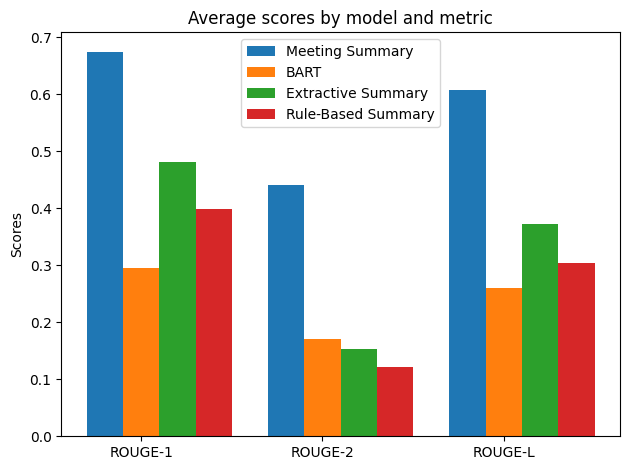

In [14]:
compute_summaries_and_rouge(shortest_dialogues, summarizer1, summarizer2, scorer)

### Longest

Dialogue 1
Original Dialogue:
Noah: Hi there! The quince we talked about the other day... Are you still interested?
Sophie: Hello Noah, but of course I am.Thank you.
Noah: Actually William went to collect the rest of them for you immediately. They're in a basket on our terrace, so you call collect them any time.
Sophie: That's very very kind of him! He's really a darling.
Sophie: We won't be going your direction any time soon I'm afraid. How long will they keep? Is it windfall?
Noah: Both really but they all look very healthy. No bruises afa one can see. Or only odd small ones. They' be alright for a couple of days I guess. The weather's cool.
Sophie: It would be a shame if they rotted. I'll talk to Frank and maybe to the twins too and go back to you asap.
Noah: OK.
Sophie: Hey Noah, the twins will be on their way from Notts tomorrow afternoon and passing Windfield. Is it alright if they pop in and collect the quince?
Noah: Absolutely! In fact anyone can come any time and just take the

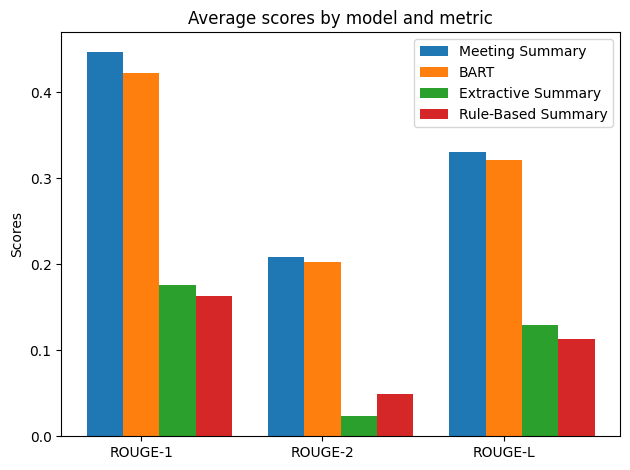

In [15]:
compute_summaries_and_rouge(longest_dialogues, summarizer1, summarizer2, scorer)

### Random

Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Dialogue 1


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Louis: Gotta go, my mom's calling me
Fabian: Ok, see ya
Louis: See ya
Reference Summary:
Louis finishes the conversation with Fabian because his mother is calling.
Meeting Summary summary:
Louis' mom is calling him, so he has to leave.
BART summary:
Fabian and Louis will see each other soon. Louis has to go because his mom is calling him.       -  -  Â   .   "Louis and Fabian" are going to meet soon, as Fabian's mother is calling Louis.
Extractive summary:
Louis: Gotta go, my mom's calling me Fabian: Ok, see ya 
Rule-Based summary:
Louis said Gotta go, my mom's calling me Fabian said Ok, see ya Louis said See ya

Dialogue 2


Your max_length is set to 142, but your input_length is only 86. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=43)


Original Dialogue:
Max: I know I will never be famous music producer
Max: But check this out
Max: My latest project
Max: <file_other>
Jim: I'll listen to it when I get home.
Jim: Knowing you I'm sure it's good.
Max: Thanks
Max: Let me know what you think later
Jim: I will
Reference Summary:
Jim will check out Max's latest music project when he gets home.
Meeting Summary summary:
Max has sent Jim his latest music project. Jim will listen to it when he gets home.
BART summary:
Max sends Jim his latest music project. Jim will listen to it when he gets home and let him know what he thinks later.   He is sure it will be good, like Max's previous projects. He will share it with Max later. He is a music producer.
Extractive summary:
Max: I know I will never be famous music producer Max: <file_other> Jim: I'll listen to it when I get home. Jim: Knowing you I'm sure it's good. Max: Thanks 
Rule-Based summary:
Max said I know I will never be famous music producer Max said But check this out Max 

Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Leticia: would any of you have 10$ and could lend it? I'm really in need, I will gve it back as soon as possible
Lora: sure
Lora: is everything ok?
Leticia: actually no...
Leticia: I've lost my wallet, or someone stole it...i'm not sure but i always take care of my stuff so that's even more weird
Miranda: shit...that's bad
Miranda: if you need any help I'm also here
Leticia: thank you girls, really
Lora: you better call the bank and block your account
Leticia: I've already done it
Miranda: did you have like a lot of money in this wallet?
Leticia: fortunately not...you know i hate dealing with cash
Lora: at least that...
Leticia: yeah...but i'm afraid i'll have to get new documents and i have no time for that :///////////
Miranda: don't worry, maybe there will be some good person who posts it on lost/found
Leticia: I hope so
Reference Summary:
Leticia lost her wallet with cards and documents and needs to borrow 10 dollars. Miranda and Lora offer help. The girls hope s

Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Jenny: where does Mary live now?
Maria: In Southampton 
Louis: Yes, she moved there in December
Reference Summary:
Mary moved to Southampton in December.
Meeting Summary summary:
Mary moved to Southampton in December.
BART summary:
Mary moved to Southampton in December. She lives with Louis and Maria. Jenny and Louis don't know where Mary lives.       in Southampton, according to Maria and Louis, and Jenny doesn't know either. She moved there from New York. 
Extractive summary:
Jenny: where does Mary live now? Maria: In Southampton Louis: Yes, she moved there in December 
Rule-Based summary:
Jenny said where does Mary live now Maria said In Southampton Louis said Yes, she moved there in December

Dialogue 5


Your max_length is set to 142, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)
Your max_length is set to 62, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


Original Dialogue:
Chandler: Phoebe!! Do you have money?? 
Phoebe: Yes I have .. But why do you need it..
Chandler: Open your door.. And pay the delivery guy standing outside my door..
Phoebe: Oh chandler !! you idiot... On my way..
Reference Summary:
Chandler asks Phoebe to open the door and pay the delivery guy standing outside his door.
Meeting Summary summary:
Phoebe will open Chandler's door and pay the delivery guy.
BART summary:
Phoebe has money. Chandler wants her to open her door and pay the delivery guy standing outside. Phoebe is on her way to do that. She doesn't understand why Chandler thinks she needs the money. She's angry with him.  
Extractive summary:
Phoebe: Oh chandler !! you idiot... On my way.. 
Rule-Based summary:
Do you have money Phoebe said Yes I have But why do you need it And pay the delivery guy standing outside my door

Dialogue 6


Your max_length is set to 142, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


Original Dialogue:
Ewan: Uncle I graduated!
Uncle Jayson: My nephew gradumacated! 
Uncle Jayson: How time flies congrats!
Ewan: Haha thanks! Gradiated! 😂
Uncle Jayson: 😂
Reference Summary:
Uncle Jayson is pleased with Ewan's graduation.
Meeting Summary summary:
Ewan graduated. Uncle Jayson congratulates him.
BART summary:
Ewan graduated. Uncle Jayson congratulates him on his nephew's graduation. Ewan finds the congratulations funny.       in response to the message from Uncle Jayson. Â   - ewan's uncle finds it funny too.
Extractive summary:
Uncle Jayson: My nephew gradumacated! Uncle Jayson: 😂 
Rule-Based summary:
Ewan said Uncle I graduated Uncle Jayson said My nephew gradumacated Uncle Jayson said How time flies congrats

Dialogue 7
Original Dialogue:
Mike: How did Chicago do last nite?
Pat: Chicago what?
Mike: Fire man!
Pat: dunno.
Mike: How come?
Pat: Its soccer right?
Mike: you not a soccer fan?
Pat: nah. baseball and hockey is wot i luv.
Mike: it's bears and white sox right?
Pat

Your max_length is set to 62, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
Rachel: <file_other>
Rachel: Top 50 Best Films of 2018
Rachel: :)
Janice: Omg, I've watched almost all 50... xDD
Spencer: Hahah, Deadpool 2 also??
Janice: Yep
Spencer: Really??
Janice: My bf forced me to watch it xD
Rachel: Hahah
Janice: It wasn't that bad
Janice: I thought it'd be worse
Rachel: And Avengers? :D
Janice: 2 times
Rachel: Omg
Janice: xP
Rachel: You are the best gf in the world
Rachel: Your bf should appreciate that ;-)
Janice: He does
Janice: x)
Reference Summary:
Rachel sends a list of Top 50 films of 2018. Janice watched almost half of them, Deadpool 2 and Avengers included.
Meeting Summary summary:
Janice watched Deadpool 2 and Avengers 2 twice because her boyfriend forced her to.
BART summary:
Rachel has sent Janice a list of the Top 50 Best Films of 2018. Janice has watched almost all of them. She has watched Deadpool 2 twice and Avengers twice. Her boyfriend forced her to watch both of them, but she didn't find them that bad.
Extractive summary:
R

Your max_length is set to 142, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
Marika: Are you coming today?
Lara: Yes!
Marika: Great!
Reference Summary:
Marika is coming today.
Meeting Summary summary:
Lara is coming to Marika today.
BART summary:
Lara is coming today. Marika is happy for her and is looking forward to her arrival.    Lara will see Marika today. She will arrive at Marika's place at 10:30.     lara will be there. 
Extractive summary:
Marika: Are you coming today? Lara: Yes! 
Rule-Based summary:
Marika said Are you coming today Lara said Yes Marika said Great

Dialogue 10
Original Dialogue:
Gary: Hey, don't forget about Tom's bday party!
Lara: I won't! What time should I show up?
Gary: Around 5 pm. He's supposed to be back home at 5:30, so we'll have just enough time to prep things up.
Lara: You're such a great boyfriend. He will be so happy!
Gary: Yep, I am :)
Lara: So I'll just pick up the cake and get the balloons...
Gary: Thanks, you're so helpful. I've already paid for the cake.
Lara: No problem, see you at 5 pm!
Gary: See y

Your max_length is set to 142, but your input_length is only 134. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)
Your max_length is set to 62, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Joseph: It's fuzzy but I think you can recognize what's that(^_-)-☆
Joseph: <file_photo>
Ella: Ooooo
Ella: Baby cows??(/◕ヮ◕)/(/◕ヮ◕)/(/◕ヮ◕)/
Joseph: Wujek Janek has tween cows:D
Ella: Twins* darling xD
Joseph: Oh yeah, sorry Twins*
Ella: Good for him!! So cool❤️❤️
Ella: Wanna touch them❤️❤️❤️
Reference Summary:
Joseph has sent Ella a photo of Wujek Janek's twin baby cows. Ella is delighted.
Meeting Summary summary:
Joseph sends Ella a picture of newborn cows. 
BART summary:
Joseph sends Ella a photo of baby cows. Joseph's friend Wujek Janek has a pair of tween cows. Ella thinks it's cool and wants to touch them. Joseph doesn't want to touch the cows, but agrees to show them to Ella.
Extractive summary:
Joseph: It's fuzzy but I think you can recognize what's that(^_-)-☆ Joseph: <file_photo> Ella: Baby cows??(/◕ヮ◕)/(/◕ヮ◕)/(/◕ヮ◕)/ Joseph: Wujek Janek has tween cows:D Joseph: Oh yeah, sorry Twins* Ella: Good for him!! So cool❤️❤️ 
Rule-Based summary:
Joseph said It's fuzz

Your max_length is set to 142, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Sue: can you pick the car up after work tomorrow please
James: yes and pay?
Sue: yes I will transfer the money in 
James: ok x
Reference Summary:
James will pick up the car after his work tomorrow. Sue already have sent him money. 
Meeting Summary summary:
James will pick up Sue's car after work tomorrow and pay for it.
BART summary:
James will pick up Sue's car tomorrow and pay for it. Sue will transfer the money in to him to pay for the car. He will pick the car up after work tomorrow and he will pick it up tomorrow evening.   Â   
Extractive summary:
Sue: can you pick the car up after work tomorrow please James: yes and pay? James: ok x 
Rule-Based summary:
Sue said can you pick the car up after work tomorrow please James said yes and pay Sue said yes I will transfer the money in James said ok x

Dialogue 18


Your max_length is set to 142, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


Original Dialogue:
Chris: Oh, and we pushed some girls into the pool :)
June: That's not nice!
Chris: Depends how u look at it ;)
June: How come?
Chris: Well, we got them to undress, 'cause they were soaking wet :)
June: Ur awful!
Reference Summary:
Some girls had to undress because they had been pushed into the pool.
Meeting Summary summary:
Chris pushed some girls into the pool. He got them to undress.
BART summary:
Chris pushed some girls into the pool because they were soaking wet. He got them to undress. June thinks he's awful for pushing them into the swimming pool.    June doesn't agree with Chris' actions, but doesn't think he's a bad person.
Extractive summary:
Chris: Oh, and we pushed some girls into the pool :) June: That's not nice! June: How come? 
Rule-Based summary:
Chris said Oh, and we pushed some girls into the pool  said) June said That's not nice Chris said Depends how u look at it ;) June said How come Chris said Well, we got them to undress, 'cause they were soaki

Your max_length is set to 62, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


Original Dialogue:
Rudi: Hetta, did you see the last trump video
Henrietta: nope
Henrietta: what did he do now?
Rudi: <file_video>
Henrietta: OMG
Henrietta: what a jerk
Rudi: it gets worse
Rudi: <file_other>
Rudi: the whole interview is here
Henrietta: can't believe he said that about a congress woman
Rudi: yeah
Henrietta: do you wonder where the limit is?
Rudi: wdym
Henrietta: if he will say something that will actually get him kicked out of the white house
Rudi: not really
Henrietta: fuck
Rudi: yeah
Reference Summary:
Trump is acting like a contemptible fool and it is getting worse. Rudi has sent Henrietta the link to his interview.
Meeting Summary summary:
Rudi and Henrietta are shocked by what Donald Trump said about a congresswoman.
BART summary:
Rudi and Henrietta are shocked by Donald Trump's comments about congresswoman. They wonder if he will be kicked out of the White House soon.       - Henrietta and Rudi are wondering where the limit is for what a politician can say. 
Extra

Your max_length is set to 142, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


Original Dialogue:
Ally: how many did you do so far?
Jill: like 20 or 30
Jill: I can't do more than 3-4 per day
Ally: how many hours?
Jill: 40? maybe 35...
Ally: ok, same here
Reference Summary:
Jill did 20 or 30 so far, 3-4 per day, 40 or 35 hours, so the same as Ally.
Meeting Summary summary:
Jill can't do more than 3-4 hours of work per day. Ally and Jill can only do about 20-30 hours each.
BART summary:
Jill can't do more than 3-4 hours of work per day. Ally and Jill can't work more than 40 hours per day, so far they have done about 20-30 hours each.    - Ally and Jill are going to work together. 
Extractive summary:
Ally: how many did you do so far? Jill: I can't do more than 3-4 per day Jill: 40? maybe 35... Ally: ok, same here 
Rule-Based summary:
Ally said how many did you do so far Jill said like 20 or 30 Jill said I can't do more than 3-4 per day Ally said how many hours Ally said ok, same here

Average ROUGE-1 F1 score for Meeting Summary: 0.5548502966768134
Average ROUGE-1 

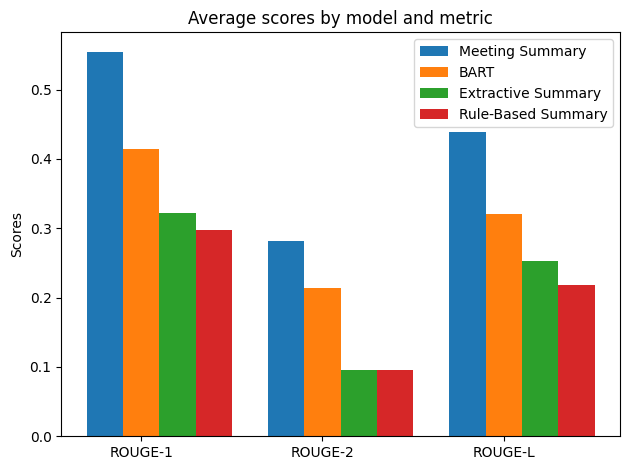

In [16]:
compute_summaries_and_rouge(random_dialogues, summarizer1, summarizer2, scorer)

### Contradictions

Your max_length is set to 62, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Dialogue 1


Your max_length is set to 142, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 62, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


Original Dialogue:
Ann: Movies at 5?
Mary: I can't, 6?
Ann: Maybe next time?
Mary: Actually nvm, 5 works.
Ann: Ok, see you.
Reference Summary:
Ann and Mary decide to go to the movies at 5.
Meeting Summary summary:
Ann and Mary are going to the movies at 5.
BART summary:
Mary and Ann are going to see a movie at 5. Mary can't make it at 6, so they'll go to the cinema at 5 as it's the earliest option.    - Ann and Mary will see each other at 5 o'clock. 
Extractive summary:
Ann: Movies at 5? Mary: I can't, 6? Mary: Actually nvm, 5 works. Ann: Ok, see you. 
Rule-Based summary:
Ann said Movies at 5 Mary said I can't, 6 Mary said Actually nvm, 5 works

Dialogue 2


Your max_length is set to 142, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)
Your max_length is set to 62, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Original Dialogue:
John: Hey, want to grab lunch?
Emily: Sure, where?
John: How about the new cafe?
Emily: Sounds good. 1 PM?
John: Perfect. See you then.
Reference Summary:
John and Emily plan to have lunch at the new cafe at 1 PM.
Meeting Summary summary:
John and Emily will have lunch together at the new cafe at 1 PM.
BART summary:
John and Emily are going to the new cafe for lunch at 1 PM. They will meet at the cafe to have lunch with John.    .      - John and Emily will see each other there.  - Emily will pick the place. 
Extractive summary:
Emily: Sure, where? John: How about the new cafe? Emily: Sounds good. 1 PM? 
Rule-Based summary:
John said Hey, want to grab lunch Emily said Sure, where John said How about the new cafe

Dialogue 3


Your max_length is set to 142, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)
Your max_length is set to 62, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


Original Dialogue:
Tom: Did you finish the report?
Jerry: Not yet, still working on it.
Tom: When do you think it'll be done?
Jerry: By tomorrow morning.
Tom: Great, thanks.
Reference Summary:
Jerry tells Tom the report will be done by tomorrow morning.
Meeting Summary summary:
Jerry will finish the report by tomorrow morning.
BART summary:
Jerry hasn't finished the report yet, but he should have it done by tomorrow morning. Tom hopes it will be good.    Tom and Jerry will meet tomorrow morning to discuss the report. Tom is very happy about it and wishes Jerry good luck. 
Extractive summary:
Tom: Did you finish the report? Jerry: Not yet, still working on it. Tom: When do you think it'll be done? Jerry: By tomorrow morning. Tom: Great, thanks. 
Rule-Based summary:
Tom said Did you finish the report Jerry said Not yet, still working on it Tom said When do you think it'll be done

Dialogue 4


Your max_length is set to 142, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 62, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Sarah: Can you pick up some milk?
Mark: Sure, anything else?
Sarah: Bread and eggs too.
Mark: Got it.
Reference Summary:
Sarah asks Mark to pick up milk, bread, and eggs.
Meeting Summary summary:
Mark will buy milk, bread and eggs on Sarah's request.
BART summary:
Mark will buy milk, bread and eggs for Sarah and some snacks for himself and Sarah. He will pick up the milk and bread on Sarah's request. He'll also get some eggs and some eggs for himself. He's already got the bread and the eggs. 
Extractive summary:
Sarah: Can you pick up some milk? Mark: Sure, anything else? Sarah: Bread and eggs too. Mark: Got it. 
Rule-Based summary:
Sarah said Can you pick up some milk Mark said Sure, anything else Sarah said Bread and eggs too

Dialogue 5


Your max_length is set to 142, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Lisa: Are you coming to the party?
Megan: I might be late.
Lisa: No worries, just come when you can.
Megan: Will do, thanks!
Reference Summary:
Megan tells Lisa she might be late to the party but will come.
Meeting Summary summary:
Megan might be late to the party.
BART summary:
Megan might be late to the party. Lisa will let her know if she can come when she can, as long as she's available.   Lisa will see Megan at the party when she's ready. Lisa and Megan will see each other later. 
Extractive summary:
Lisa: Are you coming to the party? Megan: I might be late. Lisa: No worries, just come when you can. Megan: Will do, thanks! 
Rule-Based summary:
Lisa said Are you coming to the party Megan said I might be late Lisa said No worries, just come when you can

Dialogue 6
Original Dialogue:
Jake: We need to brainstorm ideas for the new marketing campaign.
Laura: Let’s think outside the box this time.
Michael: How about a social media challenge?
Jake: Interesting. What ki

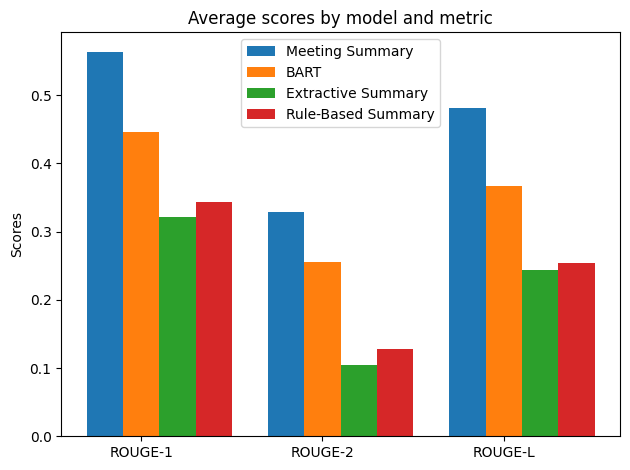

In [17]:
compute_summaries_and_rouge(contradictions_dialogues, summarizer1, summarizer2, scorer)

### Many speakers

Dialogue 1
Original Dialogue:
Dan: Guys, so are we going out on Sat?
Tim: I'm ready when you are
Chris: I'm OK too, in the centre right?
Tom: I'm out guys sorry. 
Dan: come on Tom, what's wring this time
Tom: told ya before. party at in-laws
Chris: always the same story right
Martin: right guys, so what time?
Tim: start @8? finish. 8 if we're lucky
Dan: yeah, i need to be home at 2 and ready to drive on Sunday noon
Chris: so you takin it easy this time
Martin: i guess i'd have to as well
Tim: guys you sound like 60 yos
Chris: Tim, are the last two standing or what?
Tim: i gather
Dan: you two will also grow up one day. 
Reference Summary:
Dan,Tim, Chris and Martin will meet at 8. Dan and Martin will take it easy this time. Tom can't make it as he has a party at in-laws.
Meeting Summary summary:
Dan, Tim, Chris and Martin are going out on Saturday at 8 pm. Tom can't make it due to a party at his in-laws.
BART summary:
Dan, Tim, Chris and Martin are going out on Saturday at 8. Dan needs t

Your max_length is set to 142, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


Original Dialogue:
Natalie: Well well weeeeeell, I see somethings going on here at last
Martin: (Y)
Adam: any confirmed data?
Anna: Hello everyone!!! Id love to invite everybody to my bday. I would be extremaly happy if you could come 6th of November at 1930
Martin: <3
Margot: <3
Mia: (Y)
Reference Summary:
Anna organises a birthday's party on the 6th of November at 19:30.
Meeting Summary summary:
Anna invites everyone for her birthday on 6th of November at 1930.
BART summary:
Anna invites everyone to her birthday party on 6th of November at 1930. Natalie, Martin, Margot, Mia and Adam will come.       - Natalie, Anna, Martin and Margot will come to Anna's birthday party. 
Extractive summary:
Natalie: Well well weeeeeell, I see somethings going on here at last Martin: (Y) Adam: any confirmed data? Anna: Hello everyone!!! Id love to invite everybody to my bday. I would be extremaly happy if you could come 6th of November at 1930 Martin: <3 
Rule-Based summary:
Natalie said Well well weee

Your max_length is set to 142, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


Original Dialogue:
Holt: ladies, an important question. what to get my sis for bday?
Darla: how old?
Holt: 21
Olive: can't be too personal
Treena: cosmetics maybe?
Zula: i'd get her DVDs or book series. always works
Holt: you might be right. set of DVDs and some cosmetics?
Olive: we'd all be happy i guess if you know what she likes
Reference Summary:
Holt asks his girlfriends some advice on a present for his sister on her 21st birthday. Treena recommends cosmetics, whereas Zula suggests DVDs or book series. 
Meeting Summary summary:
Holt's sister is 21. She will get a set of DVDs and cosmetics for her birthday.
BART summary:
Holt's sister is 21. He will get her a set of DVDs and cosmetics for her birthday. Darla, Olive, Treena, Zula and Zula agree that she should get her DVDs or book series.    .  
Extractive summary:
Holt: ladies, an important question. what to get my sis for bday? Darla: how old? Holt: 21 Olive: can't be too personal Treena: cosmetics maybe? Zula: i'd get her DVDs or

Your max_length is set to 142, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


Original Dialogue:
Natalie: Well well weeeeeell, I see somethings going on here at last
Martin: (Y)
Adam: any confirmed data?
Anna: Hello everyone!!! Id love to invite everybody to my bday. I would be extremaly happy if you could come 6th of November at 1930
Martin: <3
Margot: <3
Mia: (Y)
Reference Summary:
Anna organises a birthday's party on the 6th of November at 19:30.
Meeting Summary summary:
Anna invites everyone for her birthday on 6th of November at 1930.
BART summary:
Anna invites everyone to her birthday party on 6th of November at 1930. Natalie, Martin, Margot, Mia and Adam will come.       - Natalie, Anna, Martin and Margot will come to Anna's birthday party. 
Extractive summary:
Natalie: Well well weeeeeell, I see somethings going on here at last Martin: (Y) Adam: any confirmed data? Anna: Hello everyone!!! Id love to invite everybody to my bday. I would be extremaly happy if you could come 6th of November at 1930 Martin: <3 
Rule-Based summary:
Natalie said Well well weee

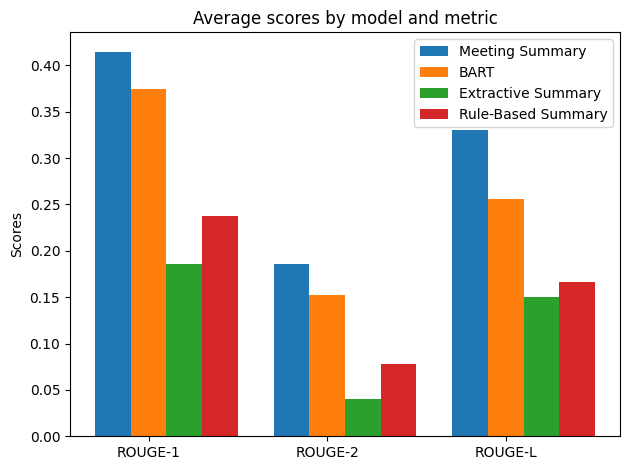

In [18]:
compute_summaries_and_rouge(multi_speaker_dialogues, summarizer1, summarizer2, scorer)

### Single speaker

Your max_length is set to 62, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Dialogue 1


Your max_length is set to 142, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Original Dialogue:
Emily: I need to pick up some groceries after work. I'll get milk, bread, and eggs. Should I get anything else? Maybe some fruits and vegetables too. And perhaps some snacks for the weekend. Yes, that should be enough.
Reference Summary:
Emily plans her grocery shopping, deciding to get milk, bread, eggs, fruits, vegetables, and snacks.
Meeting Summary summary:
Emily will buy milk, bread, eggs, fruits and vegetables and snacks for the weekend after work.
BART summary:
Emily will buy milk, bread, eggs, vegetables, fruits and vegetables, and snacks for the weekend after work. She will also get some groceries for her and her family at the weekend. She should get enough food for a whole week. She'll get groceries after work as well. 
Extractive summary:
Emily: I need to pick up some groceries after work. I'll get milk, bread, and eggs. Should I get anything else? Maybe some fruits and vegetables too. And perhaps some snacks for the weekend. Yes, that should be enough. 
R

Your max_length is set to 142, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


Original Dialogue:
John: I have a busy day today. First, I have a meeting at 9 AM. Then, I need to finish the report by noon. After lunch, I have a conference call at 2 PM. In the evening, I’ll go to the gym. Busy but productive day ahead.
Reference Summary:
John outlines his busy day with meetings, report work, a conference call, and a gym session.
Meeting Summary summary:
John has a busy day ahead. He has a meeting at 9 AM, a conference call at 2 PM and a report to finish by noon. In the evening, he will go to the gym.
BART summary:
John has a busy day today. He has a meeting at 9 AM, a report at noon and a conference call at 2 PM. In the evening, he will go to the gym. He will finish the report by noon and then work on the conference call.
Extractive summary:
John: I have a busy day today. First, I have a meeting at 9 AM. Then, I need to finish the report by noon. After lunch, I have a conference call at 2 PM. In the evening, I’ll go to the gym. Busy but productive day ahead. 
Rule-

Your max_length is set to 142, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)
Your max_length is set to 62, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Original Dialogue:
Anna: I need to clean the house this weekend. I’ll start with the living room. Then, I'll move to the kitchen. After that, the bedrooms need a good vacuuming. Lastly, I'll clean the bathrooms. It’s going to be a lot of work, but it’ll be worth it.
Reference Summary:
Anna plans her weekend house cleaning, starting with the living room, then the kitchen, bedrooms, and bathrooms.
Meeting Summary summary:
Anna needs to clean the house this weekend. She will start with the living room, then the kitchen, the bedrooms and the bathrooms.
BART summary:
Anna needs to clean the house this weekend. She will start with the living room, move to the kitchen, then the bedrooms and the bathrooms. It's going to be a lot of work, but it will be worth it, she says.   
Extractive summary:
Anna: I need to clean the house this weekend. I’ll start with the living room. Then, I'll move to the kitchen. After that, the bedrooms need a good vacuuming. Lastly, I'll clean the bathrooms. It’s goin

Your max_length is set to 142, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Original Dialogue:
Tom: I should call my parents today. I haven't talked to them in a while. I'll ask them how they're doing. Maybe I'll invite them over for dinner this weekend. It’ll be nice to catch up with them.
Reference Summary:
Tom decides to call his parents, ask about their well-being, and possibly invite them over for dinner.
Meeting Summary summary:
Tom will call his parents today to ask them how they're doing and maybe invite them for dinner this weekend.
BART summary:
Tom will call his parents today to ask them how they're doing. He might invite them over for dinner this weekend, as he hasn't talked to them in a while.    Tom wants to catch up with them and ask them about their lives. 
Extractive summary:
Tom: I should call my parents today. I haven't talked to them in a while. I'll ask them how they're doing. Maybe I'll invite them over for dinner this weekend. It’ll be nice to catch up with them. 
Rule-Based summary:
Tom said I should call my parents today I haven't talk

Your max_length is set to 142, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


Original Dialogue:
Laura: I need to finish reading this book by the end of the week. I’m halfway through, so I need to read at least 50 pages a day. It’s a really interesting book, so it shouldn’t be too hard. I’ll make sure to find some quiet time each day to read.
Reference Summary:
Laura plans to finish her book by reading at least 50 pages a day.
Meeting Summary summary:
Laura needs to read at least 50 pages a day to finish the book by the end of the week.
BART summary:
Laura needs to finish reading a book by the end of the week. She needs to read at least 50 pages a day. Laura will make sure to find some quiet time each day to read. Laura is halfway through the book. It's a really interesting book.
Extractive summary:
Laura: I need to finish reading this book by the end of the week. I’m halfway through, so I need to read at least 50 pages a day. It’s a really interesting book, so it shouldn’t be too hard. I’ll make sure to find some quiet time each day to read. 
Rule-Based summary

Your max_length is set to 142, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


Original Dialogue:
Mike: I should start running again. It’s been months since I last ran. I’ll start with a short run, maybe 2 miles. Gradually, I’ll increase the distance. Running in the morning would be best, before work. Yes, I’ll start tomorrow.
Reference Summary:
Mike plans to resume running, starting with 2 miles and gradually increasing the distance, running in the mornings.
Meeting Summary summary:
Mike will start running again tomorrow morning before work. He will start with a short 2-mile run.
BART summary:
Mike will start running again tomorrow. He will start with a short 2-mile run and gradually increase the distance. He wants to do it in the morning before work. It's been months since he last ran.       .  
Extractive summary:
Mike: I should start running again. It’s been months since I last ran. I’ll start with a short run, maybe 2 miles. Gradually, I’ll increase the distance. Running in the morning would be best, before work. Yes, I’ll start tomorrow. 
Rule-Based summary

Your max_length is set to 142, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)
Your max_length is set to 62, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


Original Dialogue:
Sophie: I need to plan my vacation. I want to go somewhere warm, maybe a beach destination. I’ll look for flights to the Caribbean. I should also book a hotel. A place with good reviews and close to the beach would be ideal. I’m so excited!
Reference Summary:
Sophie plans her vacation, looking for flights and hotels in a warm beach destination, possibly the Caribbean.
Meeting Summary summary:
Sophie wants to go to the Caribbean. Sophie will look for flights and book a hotel.
BART summary:
Sophie wants to go somewhere warm. She will look for flights to the Caribbean and book a hotel with good reviews close to the beach. She is so excited.    .   i   in the Caribbean.  In the Caribbean, Sophie would like to go to a beach destination. 
Extractive summary:
Sophie: I need to plan my vacation. I want to go somewhere warm, maybe a beach destination. I’ll look for flights to the Caribbean. I should also book a hotel. A place with good reviews and close to the beach would be 

Your max_length is set to 142, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


Original Dialogue:
Alex: I need to fix my car this weekend. The brakes have been making a weird noise. I’ll take it to the mechanic first thing Saturday morning. Hopefully, it’s nothing too serious. I should also get the oil changed while I’m there.
Reference Summary:
Alex plans to take his car to the mechanic to fix the brakes and get the oil changed.
Meeting Summary summary:
Alex's car brakes have been making a weird noise, so he will take it to the mechanic on Saturday morning.
BART summary:
Alex will take his car to the mechanic on Saturday morning. The brakes have been making a weird noise. Alex should also get the oil changed while he's there.    .   i   in the car this weekend.  In the car it's nothing too serious.
Extractive summary:
Alex: I need to fix my car this weekend. The brakes have been making a weird noise. I’ll take it to the mechanic first thing Saturday morning. Hopefully, it’s nothing too serious. I should also get the oil changed while I’m there. 
Rule-Based summa

Your max_length is set to 142, but your input_length is only 65. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


Original Dialogue:
Rachel: I should organize my closet. There are so many clothes I don’t wear anymore. I’ll start by sorting everything into keep, donate, and toss piles. It’ll be a big project, but I’ll feel so much better once it’s done.
Reference Summary:
Rachel plans to organize her closet by sorting clothes into keep, donate, and toss piles.
Meeting Summary summary:
Rachel will sort through her clothes and sort them into keep, donate, and toss piles.
BART summary:
Rachel is going to organize her closet and sort her clothes into keep, donate, and toss piles. She will feel better when she's done.       - Rachel's closet is full of clothes that she doesn't wear anymore and she needs to sort them. 
Extractive summary:
Rachel: I should organize my closet. There are so many clothes I don’t wear anymore. I’ll start by sorting everything into keep, donate, and toss piles. It’ll be a big project, but I’ll feel so much better once it’s done. 
Rule-Based summary:
There are so many clothes I

Your max_length is set to 142, but your input_length is only 65. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


Original Dialogue:
Kevin: I need to start eating healthier. I’ll begin by cutting out junk food. I’ll also add more fruits and vegetables to my diet. Maybe I should start cooking more meals at home too. It’s going to be a big change, but it’s necessary.
Reference Summary:
Kevin decides to eat healthier by cutting out junk food, adding more fruits and vegetables, and cooking more meals at home.
Meeting Summary summary:
Kevin wants to start eating healthier. He will cut out junk food and add more fruits and vegetables to his diet. Kevin will start cooking more at home.
BART summary:
Kevin will start cutting out junk food and adding more fruits and vegetables to his diet. He will also start cooking more meals at home. It's going to be a big change, but it's necessary for Kevin's health and he needs to start eating healthier.
Extractive summary:
Kevin: I need to start eating healthier. I’ll begin by cutting out junk food. I’ll also add more fruits and vegetables to my diet. Maybe I should 

Your max_length is set to 142, but your input_length is only 88. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


Original Dialogue:
Sarah: I need to catch up on my emails. There are so many unread messages. I’ll start with the most urgent ones. Then, I’ll go through the rest. I should also unsubscribe from newsletters I never read. That’ll help reduce the clutter. Maybe I can set aside some time every day to keep my inbox organized. It’s so easy to fall behind.
Reference Summary:
Sarah plans to catch up on her emails, starting with urgent ones and unsubscribing from unnecessary newsletters, and considers setting aside daily time for this.
Meeting Summary summary:
Sarah needs to catch up on her emails. She will start with the most urgent ones and unsubscribe from the rest.
BART summary:
Sarah needs to catch up on her emails. She should unsubscribe from some of the newsletters she doesn't read. She needs to set aside some time every day to keep her inbox organized, as it's so easy to fall behind. Sarah will start with the most urgent messages and go through the rest.
Extractive summary:
Sarah: I ne

Your max_length is set to 142, but your input_length is only 84. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


Original Dialogue:
Chris: I should start learning a new language. Spanish would be useful. I’ll look for an online course. Maybe I can practice with a language partner too. It’ll be a fun and rewarding challenge. I’ve always wanted to visit Spain and South America. Being able to speak the language would make the trips even more enjoyable. Yes, I’ll start today.
Reference Summary:
Chris decides to start learning Spanish, looking for an online course and considering practicing with a language partner, motivated by travel aspirations.
Meeting Summary summary:
Chris will start learning Spanish today. He wants to visit Spain and South America.
BART summary:
Chris will start learning Spanish today. He will look for an online course and practice with a language partner. Chris has always wanted to visit Spain and South America and wants to be able to speak the language. He thinks that learning Spanish would make the trips even more enjoyable.
Extractive summary:
Chris: I should start learning 

Your max_length is set to 142, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


Original Dialogue:
Megan: I need to find a new hobby. Something creative like painting or photography. I’ll look for local classes. It’ll be a nice way to relax and unwind. Plus, I’ll meet new people with similar interests. It’s been a while since I did something just for fun. Maybe I’ll start with a weekend workshop and see how it goes. Yes, that sounds perfect.
Reference Summary:
Megan decides to find a new hobby, considering painting or photography, and plans to look for local classes and workshops.
Meeting Summary summary:
Megan wants to start painting or photography as a hobby. She will look for local classes.
BART summary:
Megan is looking for a new hobby. She wants to start with a weekend workshop and see how it goes. She will look for local classes and meet new people with similar interests. Megan would like to do something creative like painting or photography. It's been a while since she did something just for fun.
Extractive summary:
Megan: I need to find a new hobby. Someth

Your max_length is set to 142, but your input_length is only 81. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)


Original Dialogue:
Daniel: I should start saving more money. I’ll create a budget to track my expenses. Maybe I can cut down on dining out. I’ll also set up a savings account. It’s important to be more financially responsible. I could start by setting small, achievable goals. Maybe save a certain amount each month and gradually increase it. Financial stability is crucial.
Reference Summary:
Daniel plans to save more money by creating a budget, cutting down on dining out, setting up a savings account, and setting small financial goals.
Meeting Summary summary:
Daniel will create a budget to track his expenses and set up a savings account.
BART summary:
Daniel wants to start saving more money. He will create a budget and set up a savings account. He wants to save a certain amount each month and gradually increase it. Financial stability is crucial for Daniel's financial well-being and he should start by setting achievable goals.
Extractive summary:
Daniel: I should start saving more mone

Your max_length is set to 142, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


Original Dialogue:
Olivia: I need to redecorate my living room. I’ll start by choosing a new color scheme. Maybe something bright and cheerful. I’ll look for some new furniture as well. A comfy couch and a stylish coffee table would be nice. I should also get some plants to add a touch of green. It’ll be a big project, but I’m excited to give the space a fresh look.
Reference Summary:
Olivia plans to redecorate her living room, choosing a new color scheme, buying new furniture, and adding plants for a fresh look.
Meeting Summary summary:
Olivia wants to redecorate her living room. She will choose a new color scheme and buy some new furniture. She should also buy some plants.
BART summary:
Olivia is going to redecorate her living room. She wants to choose a new color scheme and furniture. She will also get some plants to add a touch of green to the space. She is excited to give the space a fresh look. 
Extractive summary:
Olivia: I need to redecorate my living room. I’ll start by choosi

Your max_length is set to 142, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


Original Dialogue:
Mark: I need to plan my week ahead. On Monday, I have a project meeting in the morning. Tuesday is my deadline for the quarterly report. Wednesday, I need to visit the client’s site. Thursday, there’s a team-building activity in the afternoon. Friday, I’ll catch up on any pending tasks. It’s going to be a hectic week, but planning ahead will help me stay on top of things.
Reference Summary:
Mark plans his busy week with a project meeting, report deadline, client visit, team-building activity, and catching up on tasks.
Meeting Summary summary:
Mark has a project meeting on Monday, a deadline for the quarterly report on Tuesday, a visit to the client's site on Wednesday and a team-building activity on Thursday. On Friday he will catch up on any pending tasks.
BART summary:
Mark has a busy week ahead. He has a project meeting on Monday, a deadline for the quarterly report on Tuesday, a team-building activity on Thursday and a catch-up on Friday. He needs to plan his wee

Your max_length is set to 142, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


Original Dialogue:
Tina: I need to start a new workout routine. I’ll try to go to the gym at least three times a week. I’ll focus on cardio on Mondays, strength training on Wednesdays, and a mix of both on Fridays. I should also incorporate some yoga for flexibility. Keeping a workout log might help me stay motivated. It’s important to stay active and healthy.
Reference Summary:
Tina plans a new workout routine with gym sessions three times a week, focusing on cardio, strength training, and yoga.
Meeting Summary summary:
Tina will try to go to the gym at least three times a week. She will focus on cardio on Mondays, strength training on Wednesdays and yoga on Fridays.
BART summary:
Tina will try to go to the gym at least three times a week. She will focus on cardio on Mondays, strength training on Wednesdays and a mix of both on Fridays. She should also incorporate some yoga for flexibility. Tina will keep a workout log to stay motivated.
Extractive summary:
Tina: I need to start a new

Your max_length is set to 142, but your input_length is only 81. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)


Original Dialogue:
Nathan: I should start writing a journal. It might help me organize my thoughts better. I’ll start by writing a little every night before bed. Reflecting on my day and setting goals for tomorrow. It’s a good way to unwind and clear my mind. Maybe I can also jot down any creative ideas I have. This could be a really beneficial habit.
Reference Summary:
Nathan decides to start journaling every night to organize his thoughts, reflect on his day, and set goals.
Meeting Summary summary:
Nathan will start writing in a journal every night before bedtime.
BART summary:
Nathan will start writing in a journal every night before bedtime to organize his thoughts better. He hopes it will help him unwind and clear his mind. He also wants to jot down any creative ideas he might have.   nathan.com.
Extractive summary:
Nathan: I should start writing a journal. It might help me organize my thoughts better. I’ll start by writing a little every night before bed. Reflecting on my day and

Your max_length is set to 142, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


Original Dialogue:
Lisa: I need to revamp my wardrobe. A lot of my clothes are outdated. I’ll start by sorting through what I have and deciding what to keep, donate, or throw away. Then, I’ll make a list of basics I need to buy. Maybe I’ll also add a few trendy pieces. Shopping can be fun if it’s planned out. Time for a fresh look!
Reference Summary:
Lisa plans to revamp her wardrobe by sorting old clothes, making a list of basics to buy, and adding some trendy pieces.
Meeting Summary summary:
Lisa needs to revamp her wardrobe. She will sort through what she has and decide what to keep, donate or throw away. Then she will make a list of basics and add a few trendy pieces.
BART summary:
Lisa needs to revamp her wardrobe. She will start by sorting through what she has and deciding what to keep, donate, or throw away. Then, she will make a list of basics she needs to buy and maybe add a few trendy pieces to her collection.
Extractive summary:
Lisa: I need to revamp my wardrobe. A lot of m

Your max_length is set to 142, but your input_length is only 90. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)


Original Dialogue:
James: I need to prepare for my presentation next week. I’ll start by outlining the key points I want to cover. Then, I’ll create some slides to highlight the main ideas. Practice will be crucial, so I’ll rehearse a few times. I should also anticipate potential questions and prepare answers. Confidence is key, so I need to make sure I’m well-prepared.
Reference Summary:
James plans to prepare for his presentation by outlining key points, creating slides, practicing, and preparing for potential questions.
Meeting Summary summary:
James needs to prepare for his presentation next week. He will create some slides to highlight the main ideas and rehearse a few times.
BART summary:
James needs to prepare for his presentation next week. He will create some slides to highlight the main ideas and rehearse a few times. Confidence is key, so he needs to make sure he's well-prepared. He should also anticipate potential questions and prepare answers.
Extractive summary:
James: I 

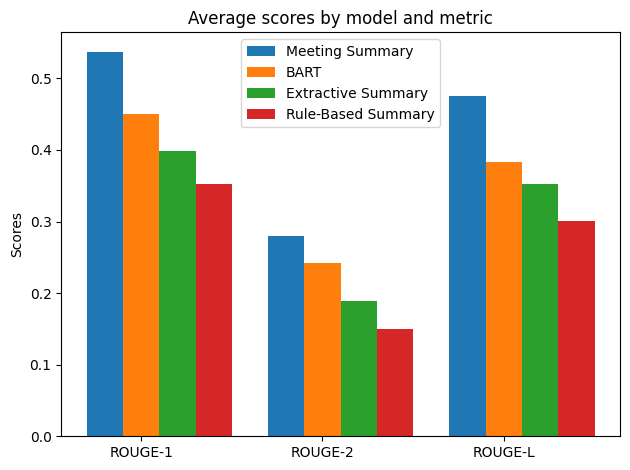

In [19]:
compute_summaries_and_rouge(single_speaker, summarizer1, summarizer2, scorer)

In [2]:
single_speaker_todo = [
    {
        "dialogue": """Emily: I need to pick up some groceries after work. I'll get milk, bread, and eggs. Should I get anything else? Maybe some fruits and vegetables too. And perhaps some snacks for the weekend. Yes, that should be enough.""",
        "to_do_list": "Emily needs to pick up groceries after work. Emily will get milk, bread, and eggs. Emily considers getting fruits and vegetables. Emily thinks about buying snacks for the weekend."
    },
    {
        "dialogue": """John: I have a busy day today. First, I have a meeting at 9 AM. Then, I need to finish the report by noon. After lunch, I have a conference call at 2 PM. In the evening, I’ll go to the gym. Busy but productive day ahead.""",
        "to_do_list": "John has a meeting at 9 AM. John needs to finish the report by noon. John has a conference call at 2 PM. John plans to go to the gym in the evening."
    },
    {
        "dialogue": """Anna: I need to clean the house this weekend. I’ll start with the living room. Then, I'll move to the kitchen. After that, the bedrooms need a good vacuuming. Lastly, I'll clean the bathrooms. It’s going to be a lot of work, but it’ll be worth it.""",
        "to_do_list": "Anna needs to clean the house this weekend. Anna will start with the living room. Anna will then move to the kitchen. Anna plans to vacuum the bedrooms. Anna will clean the bathrooms last."
    },
    {
        "dialogue": """Tom: I should call my parents today. I haven't talked to them in a while. I'll ask them how they're doing. Maybe I'll invite them over for dinner this weekend. It’ll be nice to catch up with them.""",
        "to_do_list": "Tom should call his parents today. Tom will ask them how they're doing. Tom might invite them over for dinner this weekend."
    },
    {
        "dialogue": """Laura: I need to finish reading this book by the end of the week. I’m halfway through, so I need to read at least 50 pages a day. It’s a really interesting book, so it shouldn’t be too hard. I’ll make sure to find some quiet time each day to read.""",
        "to_do_list": "Laura needs to finish reading her book by the end of the week. Laura plans to read at least 50 pages a day. Laura will find quiet time each day to read."
    },
    {
        "dialogue": """Mike: I should start running again. It’s been months since I last ran. I’ll start with a short run, maybe 2 miles. Gradually, I’ll increase the distance. Running in the morning would be best, before work. Yes, I’ll start tomorrow.""",
        "to_do_list": "Mike should start running again. Mike will start with a short run, maybe 2 miles. Mike plans to gradually increase the distance. Mike will run in the morning before work. Mike will start tomorrow."
    },
    {
        "dialogue": """Sophie: I need to plan my vacation. I want to go somewhere warm, maybe a beach destination. I’ll look for flights to the Caribbean. I should also book a hotel. A place with good reviews and close to the beach would be ideal. I’m so excited!""",
        "to_do_list": "Sophie needs to plan her vacation. Sophie wants to go to a warm beach destination. Sophie will look for flights to the Caribbean. Sophie should book a hotel with good reviews and close to the beach."
    },
    {
        "dialogue": """Alex: I need to fix my car this weekend. The brakes have been making a weird noise. I’ll take it to the mechanic first thing Saturday morning. Hopefully, it’s nothing too serious. I should also get the oil changed while I’m there.""",
        "to_do_list": "Alex needs to fix his car this weekend. Alex will take it to the mechanic on Saturday morning. Alex hopes the brake issue is not serious. Alex should also get the oil changed."
    },
    {
        "dialogue": """Rachel: I should organize my closet. There are so many clothes I don’t wear anymore. I’ll start by sorting everything into keep, donate, and toss piles. It’ll be a big project, but I’ll feel so much better once it’s done.""",
        "to_do_list": "Rachel should organize her closet. Rachel will sort clothes into keep, donate, and toss piles. Rachel will feel better once it's done."
    },
    {
        "dialogue": """Kevin: I need to start eating healthier. I’ll begin by cutting out junk food. I’ll also add more fruits and vegetables to my diet. Maybe I should start cooking more meals at home too. It’s going to be a big change, but it’s necessary.""",
        "to_do_list": "Kevin needs to start eating healthier. Kevin will cut out junk food. Kevin will add more fruits and vegetables to his diet. Kevin might start cooking more meals at home."
    },
    {
        "dialogue": """Sarah: I need to catch up on my emails. There are so many unread messages. I’ll start with the most urgent ones. Then, I’ll go through the rest. I should also unsubscribe from newsletters I never read. That’ll help reduce the clutter. Maybe I can set aside some time every day to keep my inbox organized. It’s so easy to fall behind.""",
        "to_do_list": "Sarah needs to catch up on her emails. Sarah will start with the most urgent messages. Sarah will go through the rest of the emails. Sarah should unsubscribe from unread newsletters. Sarah might set aside daily time to keep her inbox organized."
    },
    {
        "dialogue": """Chris: I should start learning a new language. Spanish would be useful. I’ll look for an online course. Maybe I can practice with a language partner too. It’ll be a fun and rewarding challenge. I’ve always wanted to visit Spain and South America. Being able to speak the language would make the trips even more enjoyable. Yes, I’ll start today.""",
        "to_do_list": "Chris should start learning Spanish. Chris will look for an online course. Chris might practice with a language partner. Chris wants to visit Spain and South America. Chris will start today."
    },
    {
        "dialogue": """Megan: I need to find a new hobby. Something creative like painting or photography. I’ll look for local classes. It’ll be a nice way to relax and unwind. Plus, I’ll meet new people with similar interests. It’s been a while since I did something just for fun. Maybe I’ll start with a weekend workshop and see how it goes. Yes, that sounds perfect.""",
        "to_do_list": "Megan needs to find a new hobby. Megan is considering painting or photography. Megan will look for local classes. Megan wants to meet new people with similar interests. Megan might start with a weekend workshop."
    },
    {
        "dialogue": """Daniel: I should start saving more money. I’ll create a budget to track my expenses. Maybe I can cut down on dining out. I’ll also set up a savings account. It’s important to be more financially responsible. I could start by setting small, achievable goals. Maybe save a certain amount each month and gradually increase it. Financial stability is crucial.""",
        "to_do_list": "Daniel should start saving more money. Daniel will create a budget to track expenses. Daniel might cut down on dining out. Daniel will set up a savings account. Daniel will set small, achievable savings goals."
    },
    {
        "dialogue": """Olivia: I need to redecorate my living room. I’ll start by choosing a new color scheme. Maybe something bright and cheerful. I’ll look for some new furniture as well. A comfy couch and a stylish coffee table would be nice. I should also get some plants to add a touch of green. It’ll be a big project, but I’m excited to give the space a fresh look.""",
        "to_do_list": "Olivia needs to redecorate her living room. Olivia will choose a new color scheme. Olivia will look for new furniture. Olivia should get a comfy couch and a stylish coffee table. Olivia plans to add some plants for a touch of green."
    },
    {
        "dialogue": """Mark: I need to plan my week ahead. On Monday, I have a project meeting in the morning. Tuesday is my deadline for the quarterly report. Wednesday, I need to visit the client’s site. Thursday, there’s a team-building activity in the afternoon. Friday, I’ll catch up on any pending tasks. It’s going to be a hectic week, but planning ahead will help me stay on top of things.""",
        "to_do_list": "Mark needs to plan his week ahead. Mark has a project meeting on Monday morning. Mark's quarterly report deadline is on Tuesday. Mark needs to visit the client’s site on Wednesday. There is a team-building activity on Thursday afternoon. Mark will catch up on pending tasks on Friday."
    },
    {
        "dialogue": """Tina: I need to start a new workout routine. I’ll try to go to the gym at least three times a week. I’ll focus on cardio on Mondays, strength training on Wednesdays, and a mix of both on Fridays. I should also incorporate some yoga for flexibility. Keeping a workout log might help me stay motivated. It’s important to stay active and healthy.""",
        "to_do_list": "Tina needs to start a new workout routine. Tina will go to the gym at least three times a week. Tina will focus on cardio on Mondays. Tina will do strength training on Wednesdays. Tina will do a mix of both on Fridays. Tina should incorporate yoga for flexibility. Tina might keep a workout log for motivation."
    },
    {
        "dialogue": """Nathan: I should start writing a journal. It might help me organize my thoughts better. I’ll start by writing a little every night before bed. Reflecting on my day and setting goals for tomorrow. It’s a good way to unwind and clear my mind. Maybe I can also jot down any creative ideas I have. This could be a really beneficial habit.""",
        "to_do_list": "Nathan should start writing a journal. Nathan will write a little every night before bed. Nathan will reflect on his day and set goals for tomorrow. Nathan might jot down any creative ideas."
    },
    {
        "dialogue": """Lisa: I need to revamp my wardrobe. A lot of my clothes are outdated. I’ll start by sorting through what I have and deciding what to keep, donate, or throw away. Then, I’ll make a list of basics I need to buy. Maybe I’ll also add a few trendy pieces. Shopping can be fun if it’s planned out. Time for a fresh look!""",
        "to_do_list": "Lisa needs to revamp her wardrobe. Lisa will sort through her clothes and decide what to keep, donate, or throw away. Lisa will make a list of basics to buy. Lisa might add a few trendy pieces."
    },
    {
        "dialogue": """James: I need to prepare for my presentation next week. I’ll start by outlining the key points I want to cover. Then, I’ll create some slides to highlight the main ideas. Practice will be crucial, so I’ll rehearse a few times. I should also anticipate potential questions and prepare answers. Confidence is key, so I need to make sure I’m well-prepared.""",
        "to_do_list": "James needs to prepare for his presentation next week. James will outline the key points to cover. James will create slides to highlight the main ideas. James will rehearse a few times. James should anticipate potential questions and prepare answers."
    }
]


In [3]:

contradictions_dialogues_todo = [
    {
        "dialogue": """Ann: Movies at 5?
Mary: I can't, 6?
Ann: Maybe next time?
Mary: Actually nvm, 5 works.
Ann: Ok, see you.""",
        "to_do_list": "Ann and Mary will go to the movies at 5."
    },
    {
        "dialogue": """John: Hey, want to grab lunch?
Emily: Sure, where?
John: How about the new cafe?
Emily: Sounds good. 1 PM?
John: Perfect. See you then.""",
        "to_do_list": "John and Emily will have lunch at the new cafe at 1 PM."
    },
    {
        "dialogue": """Tom: Did you finish the report?
Jerry: Not yet, still working on it.
Tom: When do you think it'll be done?
Jerry: By tomorrow morning.
Tom: Great, thanks.""",
        "to_do_list": "Jerry will finish the report by tomorrow morning."
    },
    {
        "dialogue": """Sarah: Can you pick up some milk?
Mark: Sure, anything else?
Sarah: Bread and eggs too.
Mark: Got it.""",
        "to_do_list": "Mark will pick up milk, bread, and eggs."
    },
    {
        "dialogue": """Lisa: Are you coming to the party?
Megan: I might be late.
Lisa: No worries, just come when you can.
Megan: Will do, thanks!""",
        "to_do_list": "Megan will come to the party and might be late."
    },
    {
        "dialogue": """Jake: We need to brainstorm ideas for the new marketing campaign.
Laura: Let’s think outside the box this time.
Michael: How about a social media challenge?
Jake: Interesting. What kind of challenge?
Laura: Maybe something related to our product.
Michael: Like a photo contest with our product?
Jake: That could work. Any other ideas?
Laura: We could collaborate with influencers.
Michael: That’s a great idea. They have a wide reach.
Jake: Let’s list potential influencers we could contact.
Laura: I’ll handle that.
Michael: I’ll start drafting the challenge rules.
Jake: Perfect, we’re off to a good start.""",
        "to_do_list": "Laura will list potential influencers. Michael will draft the challenge rules."
    },
    {
        "dialogue": """Ann: We need to decide on the venue for the event.
John: I was thinking about the downtown hall.
Mary: Isn't that place a bit too small for our crowd?
Ann: True, but it’s quite central.
John: How about the new convention center?
Mary: That could work. It’s spacious and modern.
Ann: But isn’t it too expensive?
John: I heard they offer discounts for non-profits.
Mary: Really? That’s great news!
Ann: Then we should definitely consider it.
John: I’ll call them to get a quote.
Mary: Perfect, let us know what they say.
Ann: Sounds like a plan.""",
        "to_do_list": "John will call the new convention center to get a quote."
    },
    {
        "dialogue": """Emily: We need to pick a destination for our next trip.
Liam: How about Italy?
Sophia: Italy sounds amazing! But what about the budget?
Emily: We could look for budget-friendly options.
Liam: We can stay in hostels or Airbnb.
Sophia: And maybe we can find cheap flights if we book early.
Emily: Good point. When should we go?
Liam: How about September?
Sophia: Perfect, the weather will still be nice.
Emily: Let’s start planning the itinerary.
Liam: I’ll check flights and accommodation.
Sophia: And I’ll research places to visit.
Emily: Great teamwork! This is going to be an awesome trip.""",
        "to_do_list": "Liam will check flights and accommodation. Sophia will research places to visit."
    },
    {
        "dialogue": """Linda: What should we do for Kate's birthday?
Tom: We could throw a surprise party.
Sophie: I love that idea! Where should we have it?
Linda: How about her favorite restaurant?
Tom: It might be too crowded and obvious.
Sophie: Maybe we can book a private room there.
Linda: That’s a great compromise.
Tom: I’ll call the restaurant to check availability.
Sophie: I can help with the decorations.
Linda: And I’ll handle the guest list.
Tom: This is going to be great!
Sophie: Kate will be so surprised and happy.
Linda: Definitely, she deserves it.""",
        "to_do_list": "Tom will call the restaurant to check availability. Sophie will help with the decorations. Linda will handle the guest list."
    },
    {
        "dialogue": """Mike: We should plan a team-building activity.
Sarah: That’s a good idea. Any suggestions?
Jake: What about a hiking trip?
Mike: Not everyone is into hiking.
Sarah: How about an escape room?
Jake: That sounds fun and inclusive.
Mike: I agree. It’s also good for teamwork.
Sarah: I’ll look for the best-rated escape rooms in the area.
Jake: I can help with that too.
Mike: Great, let’s decide on a date.
Sarah: How about next Friday?
Jake: Works for me.
Mike: Perfect, let’s finalize it then.""",
        "to_do_list": "Sarah will look for the best-rated escape rooms. They will finalize the date for next Friday."
    },
    {
        "dialogue": """Emily: I think we should re-evaluate our marketing strategy.
James: Why do you say that?
Emily: Our current approach isn’t yielding the results we want.
James: What do you suggest we change?
Emily: We should focus more on social media campaigns.
James: That makes sense. What platforms do you think are best?
Emily: Instagram and TikTok have a lot of potential.
James: I agree. Should we hire a social media manager?
Emily: Yes, and we can also collaborate with influencers.
James: That’s a good idea. Any influencers in mind?
Emily: I have a few in mind. I can make a list.
James: Great, let’s get started on this right away.
Emily: I’ll draft a new strategy and share it with you.""",
        "to_do_list": "Emily will draft a new marketing strategy and share it with James. Emily will make a list of influencers."
    },
    {
        "dialogue": """John: Did you see the latest sales report?
Alice: Yes, our numbers are down this quarter.
John: We need to figure out why.
Alice: I think it’s because of the new competitor.
John: That’s possible. How should we respond?
Alice: We need to improve our product and marketing.
John: Agreed. Do you have any specific ideas?
Alice: We could launch a new feature.
John: That’s a good start. What else?
Alice: A targeted ad campaign might help.
John: Let’s work on a proposal for these changes.
Alice: I’ll start drafting it now.
John: Thanks, Alice. We’ll turn this around.""",
        "to_do_list": "Alice will start drafting a proposal for product and marketing improvements."
    },
    {
        "dialogue": """Karen: Are we still on for the meeting later?
Tom: Yes, I’m ready when you are.
Karen: Do you have the presentation materials?
Tom: I do. What about the handouts?
Karen: I printed them this morning.
Tom: Great, we’re all set then.
Karen: Did you confirm the time with the client?
Tom: Yes, they’ll be here at 3 PM.
Karen: Perfect. Let’s review the main points once more.
Tom: Sure, I’ll pull up the slides.
Karen: Thanks, Tom. This is going to go well.
Tom: I have a good feeling about it too.""",
        "to_do_list": "Karen and Tom will review the main points of the presentation. Tom will pull up the slides. They will meet the client at 3 PM."
    },
    {
        "dialogue": """Dave: Are we all set for the presentation tomorrow?
Megan: I’ve finished the slides.
Dave: What about the data analysis part?
Megan: I can cover that.
Dave: And the conclusion?
Megan: I’ve included it at the end.
Dave: Great, should we do a run-through?
Megan: Yes, after lunch?
Dave: Works for me.
Megan: I’ll reserve the conference room.
Dave: Good idea, thanks.
Megan: No problem, we’ll be ready.
Dave: I’m confident we’ll do well.""",
        "to_do_list": "Megan will cover the data analysis part. Megan will reserve the conference room for a run-through after lunch."
    },
    {
        "dialogue": """Nina: We need to finalize the guest list for the conference.
Eric: Do we have a preliminary list?
Nina: Yes, but we need to add more industry experts.
Eric: Any suggestions?
Nina: How about Dr. Smith from MIT?
Eric: Great idea. And maybe Professor Lee from Stanford?
Nina: Perfect. What about keynote speakers?
Eric: We should invite the CEO of TechCorp.
Nina: Excellent. Let’s send out the invitations soon.
Eric: I’ll draft the invitations today.
Nina: Thanks, Eric. We’re making good progress.
Eric: Yes, we are. This conference will be a success.""",
        "to_do_list": "Eric will draft the invitations for the conference."
    },
   

 {
        "dialogue": """Ann: We need to decide on the venue for the event.
John: I was thinking about the downtown hall.
Mary: Isn't that place a bit too small for our crowd?
Ann: True, but it’s quite central.
John: How about the new convention center?
Mary: That could work. It’s spacious and modern.
Ann: But isn’t it too expensive?
John: I heard they offer discounts for non-profits.
Mary: Really? That’s great news!
Ann: Then we should definitely consider it.
John: I’ll call them to get a quote.
Mary: Perfect, let us know what they say.
Ann: Sounds like a plan.""",
        "to_do_list": "John will call the new convention center to get a quote."
    },
    {
        "dialogue": """Mike: We should plan a team-building activity.
Sarah: That’s a good idea. Any suggestions?
Jake: What about a hiking trip?
Mike: Not everyone is into hiking.
Sarah: How about an escape room?
Jake: That sounds fun and inclusive.
Mike: I agree. It’s also good for teamwork.
Sarah: I’ll look for the best-rated escape rooms in the area.
Jake: I can help with that too.
Mike: Great, let’s decide on a date.
Sarah: How about next Friday?
Jake: Works for me.
Mike: Perfect, let’s finalize it then.""",
        "to_do_list": "Sarah will look for the best-rated escape rooms. They will finalize the date for next Friday."
    },
    {
        "dialogue": """Linda: What should we do for Kate's birthday?
Tom: We could throw a surprise party.
Sophie: I love that idea! Where should we have it?
Linda: How about her favorite restaurant?
Tom: It might be too crowded and obvious.
Sophie: Maybe we can book a private room there.
Linda: That’s a great compromise.
Tom: I’ll call the restaurant to check availability.
Sophie: I can help with the decorations.
Linda: And I’ll handle the guest list.
Tom: This is going to be great!
Sophie: Kate will be so surprised and happy.
Linda: Definitely, she deserves it.""",
        "to_do_list": "Tom will call the restaurant to check availability. Sophie will help with the decorations. Linda will handle the guest list."
    },
    {
        "dialogue": """Emily: We need to pick a destination for our next trip.
Liam: How about Italy?
Sophia: Italy sounds amazing! But what about the budget?
Emily: We could look for budget-friendly options.
Liam: We can stay in hostels or Airbnb.
Sophia: And maybe we can find cheap flights if we book early.
Emily: Good point. When should we go?
Liam: How about September?
Sophia: Perfect, the weather will still be nice.
Emily: Let’s start planning the itinerary.
Liam: I’ll check flights and accommodation.
Sophia: And I’ll research places to visit.
Emily: Great teamwork! This is going to be an awesome trip.""",
        "to_do_list": "Liam will check flights and accommodation. Sophia will research places to visit."
    },
    {
        "dialogue": """Jake: We need to brainstorm ideas for the new marketing campaign.
Laura: Let’s think outside the box this time.
Michael: How about a social media challenge?
Jake: Interesting. What kind of challenge?
Laura: Maybe something related to our product.
Michael: Like a photo contest with our product?
Jake: That could work. Any other ideas?
Laura: We could collaborate with influencers.
Michael: That’s a great idea. They have a wide reach.
Jake: Let’s list potential influencers we could contact.
Laura: I’ll handle that.
Michael: I’ll start drafting the challenge rules.
Jake: Perfect, we’re off to a good start.""",
        "to_do_list": "Laura will list potential influencers. Michael will draft the challenge rules."
    }
]


In [4]:
shortest_dialogues_todo = [
    {
        "dialogue": """Sean: I overslept :/
Sam: Again??
Sean: I know.""",
        "to_do_list": "Sean will try not to oversleep again."
    },
    {
        "dialogue": """Blake: where r u men?
George: comin'!
Blake: good""",
        "to_do_list": "George will come to meet Blake."
    },
    {
        "dialogue": """Mike: Let's go for a beer
Tom: Now?
Mike: Yes
Ben: Ok""",
        "to_do_list": "Mike, Tom, and Ben will go for a beer."
    },
    {
        "dialogue": """Jair: Still busy?
Callum: Yes a little sorry
Jair: ok""",
        "to_do_list": "Callum will finish his work."
    },
    {
        "dialogue": """William: are you still angry?
Emilia: YES 
William: :(""",
        "to_do_list": "William will try to make amends with Emilia."
    },
    {
        "dialogue": """Marika: Are you coming today?
Lara: Yes!
Marika: Great!""",
        "to_do_list": "Lara will come today."
    },
    {
        "dialogue": """Gina: did u lock the door
Warren: yes
Gina: good, thanks""",
        "to_do_list": "Warren locked the door."
    },
    {
        "dialogue": """Tony: <photo_file>
Amy: Sweet little cat <3
Lucas: Adorable!!""",
        "to_do_list": "No tasks needed."
    },
    {
        "dialogue": """Mae: Is the dress ready?
Cael: Not yet
Mae: Hope to have it soon""",
        "to_do_list": "Cael will finish the dress soon."
    },
    {
        "dialogue": """Louis: Gotta go, my mom's calling me
Fabian: Ok, see ya
Louis: See ya""",
        "to_do_list": "Louis will talk to his mom."
    },
    {
        "dialogue": """Ben: pizza tonight?
Steven: sure thing!
Ben: at Marco's?
Steven: (y)""",
        "to_do_list": "Ben and Steven will have pizza at Marco's tonight."
    },
    {
        "dialogue": """Ty: do you speak French?
Veronica: no 
Ty: pity, I need a translator""",
        "to_do_list": "Ty will find a French translator."
    },
    {
        "dialogue": """Karine: <file_video>
Jessie: That was us at kindergarten!
Karine: yes!!""",
        "to_do_list": "No tasks needed."
    },
    {
        "dialogue": """Tiffany: buy me a burger on your way home
Railey: ok
Tiffany: thx, sis :)""",
        "to_do_list": "Railey will buy a burger for Tiffany on her way home."
    },
    {
        "dialogue": """Sue: Call me when you get this.
Sue: it's important
Steve: OK, I'm calling""",
        "to_do_list": "Steve will call Sue."
    },
    {
        "dialogue": """Ola: Hey running late
Ola: I should be free by 8
Kurt: Sure no prob, call me""",
        "to_do_list": "Ola will call Kurt after she is free by 8."
    },
    {
        "dialogue": """Daisy: going home?
Lisa: not yet
Daisy: please be back before 11 pm
Lisa: ok""",
        "to_do_list": "Lisa will be back home before 11 pm."
    },
    {
        "dialogue": """Zoe: <file_video>
Frank: Love you!
Zoe: :-*
Frank: Have a good day, babe :-*""",
        "to_do_list": "No tasks needed."
    },
    {
        "dialogue": """Dan: buy me a sandwich on your way to work.
Kevin: ok, no problem!
Dan: thanks!""",
        "to_do_list": "Kevin will buy a sandwich for Dan on his way to work."
    },
    {
        "dialogue": """Dolph: hey
Dolph: remember to bring your passport tomorrow
Ziggler: Cool, i will""",
        "to_do_list": "Ziggler will bring his passport tomorrow."
    }
]


In [5]:

longest_dialogues_todo = [
    {
        "dialogue": """Noah: Hi there! The quince we talked about the other day... Are you still interested?
Sophie: Hello Noah, but of course I am. Thank you.
Noah: Actually William went to collect the rest of them for you immediately. They're in a basket on our terrace, so you can collect them any time.
Sophie: That's very very kind of him! He's really a darling.
Sophie: We won't be going your direction any time soon I'm afraid. How long will they keep? Is it windfall?
Noah: Both really but they all look very healthy. No bruises afa one can see. Or only odd small ones. They'd be alright for a couple of days I guess. The weather's cool.
Sophie: It would be a shame if they rotted. I'll talk to Frank and maybe to the twins too and go back to you asap.
Noah: OK.
Sophie: Hey Noah, the twins will be on their way from Notts tomorrow afternoon and passing Windfield. Is it alright if they pop in and collect the quince?
Noah: Absolutely! In fact, anyone can come any time and just take them from our terrace. Of course, it would be great to see your twins again. Haven't seen them for ages!
Sophie: Well, we don't see that much of them either :( They'll be coming home this weekend only because of Alexa's ceremony.
Noah: Notts is 3 hours' drive away so small wonder they don't fancy it so much.
Sophie: I don't blame them! We're both happy they've been doing fine at college. Everything's absolutely fine. You don't have William at home all that often either, do you?
Noah: He gets 5 days at Xmas by way of "family care" and 2 weeks off spread over the whole year but never longer than 5 days. They have a strict regime at the academy. But after all these years we've learned to cope with it. What worries me is that he seems to have no time to even think about getting married and starting a family of his own.
Sophie: The fate of most military I guess. Hugely unfair I'd say. Like being married to your regiment!
Noah: That's what it sounds like when he talks about himself! I never hear a girl's name! And when I ask, he gets brusque.
Sophie: Oh dear! What could it mean?
Noah: No, not what you think! We know from Capt. Broomsberg about their common escapades. Plenty of women but only that sort of women. No strings.
Sophie: I never even imagined he might be gay! Surely not. But there must be sth else.
Noah: We think he's just so obsessively career-minded. Nothing else counts for him.
Sophie: He's always been very strong-willed. And he knows what he wants. Well if I were you I wouldn't worry at all.
Noah: You're probably right. But you know I'd love it so much to have plenty of grandchildren around me.
Sophie: They'll come, don't you worry! Look the twins will contact you about the quince. Alright?
Noah: Sure. Thank you, Sophie, for a nice chat!
Sophie: Thank you for the quince!""",
        "to_do_list": "Noah will wait for Sophie's twins to collect the quince."
    },
    {
        "dialogue": """Charles: How can you tell that someone has gluten intolerance?
Karen: You can have coeliac disease which makes it impossible for you to digest gluten or be allergic to gluten. From what I've heard, being allergic is far worse because you have an allergic reaction that can be lethal, while being intolerant can make you feel some unpleasant symptoms, but I don't think it may lead to your death.
Jack: Why are you asking? Is there something wrong?
Charles: Hm, I don't know, I feel that I may be allergic or something.
Monica: Do you have any symptoms? Check those articles:
Monica: <file_other>, <file_other>
Karen: I think that you may have a very very light allergy at best, otherwise, you would have known - trust me.
Karen: When it comes to intolerance... I know it's very hip to be gluten intolerant, but I don't believe that suddenly half of the population is gluten intolerant. Unless you have coeliac disease, I think you're fine.
Jack: My friend was told that she may be intolerant or allergic and she did a blood test - she's absolutely fine.
Charles: I may do it as well. I feel weird recently, bloated and I gain weight even though I don't eat much.
Karen: But do you feel differently after eating gluten? Jack's right, you should do a blood test first, but you can test it yourself. Stop eating gluten for a month and see if you feel better.
Monica: I did the same thing with lactose, I wasn't feeling great after drinking coffee with milk, etc. I stopped eating it and I'm much better now.
Jack: But did it happen suddenly or were you always like this?
Monica: It just happened, I was all right until I wasn't. I don't know how it works, but it happens.
Charles: I think it's the same with me. I was fine, but recently it's a real nightmare.
Karen: You should quit eating gluten and see, otherwise you should look for a different explanation. Maybe it has nothing to do with food?
Charles: I had a basic blood test and everything's fine. My GP said all my problems are linked to my diet.
Karen: It may be, but I'm not so sure. Although, changing your diet and eating healthier can't do you any harm.
Monica: You should read the articles I sent you, check the symptoms, and what you shouldn't eat.
Charles: Thanks! I'm really worried because it's getting worse and I have no idea what's happening with me.""",
        "to_do_list": "Charles will quit eating gluten and see if he feels better."
    },
    {
        "dialogue": """Mell: Hi there! How are you doing?
Gloria: Hi Mell! We are fine, just the daily grind ;) And yourselves?
Mell: Not much happening either. An odd phone call with the kids. Or Tad's sister:(( Not much otherwise.
Gloria: Yeah... Life has become so quiet since the kids are out of the house. We had more to get used to it. But it must be hard for you. Especially you I mean.
Mell: I don't know. Sometimes I even forget that I should be missing them. In a way, I do like this peace and quiet now.
Gloria: Small wonder. You had a hell of a time with them just before they went to college. I'd say you need to recover now.
Mell: I guess you're right. But maybe I should feel guilty or something?
Gloria: Don't be silly! You are a fantastic mom.
Mell: Thanks Gloria.
Gloria: Anyway I'm happy to hear from you again. We should really have a nice do again.
Mell: YES! Splendid!
Gloria: The weather is just brilliant, perfect for a BBQ. What do you think?
Mell: I'm all for it. At my place? I'd love it.
Gloria: Can't be better. I love your garden.
Mell: We're thinking about extending the terrace. I must show you my drawings, just a few ideas. It would be great to hear your opinion.
Gloria: I'd love to. But you know how little I know about garden design, or however you call it.
Mell: We'll have a look at them. Now the BBQ. At the weekend I suppose?
Gloria: Let me check the calendar. Here's our family planner. A horrible name, isn't it? So this weekend suits us fine. At the next one, on Saturday, Mark has penciled something in but I can't read it. So what about this Saturday?
Mell: Perfect. At least we know the weather holds. Shall I do the food and you the drinks?
Gloria: And I'll get us some dessert as well. 
Mell: Very good indeed. It's always so easy-going with you.
Gloria: Ta! You were thinking about Tad's sister?
Mell: I'm afraid so. I'm so happy she moved up to Scotland and I don't have to put up with her trying to run my household. Tad feels relieved too.
Gloria: Good riddance! I could really never warm up to her.
Mell: Nobody can! Anyway, she's gone and we're going to have a fantastic barbecue. Without her.
Gloria: Yes, we are. Oh, I'm so happy you've phoned!
Mell: Looking forward to our BBQ on Saturday!
Gloria: So long!""",
        "to_do_list": "Mell will prepare food for the BBQ. Gloria will get drinks and dessert. Mell will show her terrace extension drawings to Gloria."
    },
    {
        "dialogue": """Andy: Hello. I have had a good look and have done some tests on the mold in your spare bedroom upstairs and in the dining room.
Betty: Hello Andy. Thank you for that, what are your thoughts? 
Andy: I think it is caused by condensation, as most of the moist settles on and around the windows.
Betty: Why is that?
Andy: Those are the coldest areas and therefore where the moist in the warm air turns into water. On the windows, it's just water, on the walls, the moist will allow mold to grow.
Betty: So why is it all over the spare room walls, and all around the dining room? but not in other rooms?
Andy: Probably because they have external walls which are cooler than internal walls.
Betty: So why

 only that bedroom and not the other ones?
Andy: I guess those rooms are most affected as the spare room is next to the bathroom and the dining room next to the kitchen.
Betty: But why isn't there mold on the kitchen and bathroom itself then?
Andy: I think that is because the kitchen doesn't have external walls and the bathroom has only one external wall and a fan in it. The difference when I measured it between internal wall and external wall is about 4 degrees.  
Betty: Does that mean we need new double glazed windows or new wall insulation?
Andy: Not necessarily. That would make a little difference but would still leave you with moist air in the house, so it would just settle somewhere else.  
Betty: So what would you recommend?
Andy: I would install a fan system, or PIV system, which would circulate air to dilute and take some moisture out of the air. It would be installed in your loft and be on continuously during day and night. 
Betty: That sounds good. Would that be sufficient? 
Andy: If you buy a decent size it will be, but you would also need to treat your walls to get rid of the current mold. That will not go away by itself.
Betty: OK, is this something your company can help with?
Andy: It is indeed, we can repaint as well if you want. 
Betty: Good point. Could you please send me a detailed quote for the work via email?
Andy: Of course, I will have that done by Friday. 
Betty: That would be great. And again, thanks for today!
Andy: No problem, speak soon.""",
        "to_do_list": "Andy will install a fan system and treat the walls to remove mold. Andy will send a detailed quote to Betty by Friday."
    },
    {
        "dialogue": """Catherine: Hi Jake, last week I applied for an accounting position @ Pandora.
Jake: Hey Cathy! Really? That's great!
Catherine: Are you still working there?
Jake: I sure am. It's already been 5 yrs.
Catherine: Time flies. So I take it you're satisfied?
Jake: I am, I rarely think about changing companies. 
Catherine: Does the company offer possibilities of personal development & promotion?
Catherine: I mean is there a clear career path?
Jake: Yup, that's the main pro of this place & the benefits.
Jake: I was promoted twice during these 5 yrs & the salary increase with each promotion is quite significant.
Catherine: That's good to hear. Most companies today are implementing cost-saving policies & the employees are the ones who suffer.
Catherine: I mean at my current workplace you can only count on inflation salary increases. So you barely see the difference on your paycheck.
Jake: That's what I hear from most of my friends. It's a tough time for employees on the market nowadays.
Jake: For now, our company is still dynamically expanding. 
Catherine: And how about the benefits you mentioned?
Jake: The company partially finances language & accounting courses.
Jake: There's also a yearly bonus that depends on your achievements and private healthcare.
Catherine: That sounds like a dream :D Your HR dept. gave me a call yesterday and invited me to an interview on Monday.
Jake: That's great! I'll keep my fingers crossed :)
Catherine: Thanks Jake :) Is there anything I should prepare/review before the interview?
Jake: Well I think it would be beneficial to know some facts about the company.
Jake: You can find them on the official website, in the "about us" section:  <file_other> 
Catherine: OK, I'll definitely take a look.
Jake: And they may ask you some questions about accounting principles, the basics. But I mean that won't be a problem for you.
Jake: I remember you graduated with honors from uni.
Catherine: That's true. :) I'm a bit nervous though.
Jake: There's no need to be. Give me a call after the interview. Good luck!
Catherine: Thanks. Talk to you soon!""",
        "to_do_list": "Catherine will prepare for her interview at Pandora. Jake will keep his fingers crossed for Catherine."
    },
    {
        "dialogue": """Kate: I just had a fight with Chris :/
Mary: Oh no, not again.
Kate: It's not me who started it. I don't know why he says certain stuff, it seems like he's doing it on purpose.
Mary: What was it this time?
Kate: Same thing, as always. Really, he knows what I think and I know what he thinks so I don't bring up certain things. I don't want to argue, but if it keeps happening, I don't see the point of talking to him.
Kate: I'm angry every single time I talk with him.
Mary: Eh, I don't get why he keeps doing it. What did he say?
Kate: I don't want to get worked up over it again, but really usual stuff. He watched a programme about the refugees and went on a rant about it.
Mary: Oh god.
Kate: Right?! I don't know why I'm still talking with him. I tried to talk some sense into him, apparently with no luck.
Mary: What did you tell him?
Kate: What I usually tell him. He was an immigrant once, he was working abroad, I sent him all the data and research, statistics, everything.
Mary: I'm afraid Chris may be too pig-headed for that.
Kate: Pfff I bet he didn't even read anything. He's just watching the nationalists, Trump and all those idiots, listens to everything they're saying on the telly instead of just thinking for once.
Mary: I know, to be honest I kind of avoid these subjects when I'm talking with him.
Kate: Well, I try to as well, but as you can see he can't stop himself.
Kate: I know he's our friend and we go out often, but I'm not sure I can do it anymore, I don't want to be friends with someone who thinks that Mexican children are worse and that they should be kept away from the US.
Mary: Oh my god, he said that?
Kate: Yes :/
Mary: Jesus, I knew he has strong views, but to say something like that? That's a bit too much.
Kate: You're telling me this. I think we should reconsider this let's say friendship, because if every conversation will lead to something like this, I'm not interested in staying in touch with him.
Mary: No wonder.""",
        "to_do_list": "Kate will reconsider her friendship with Chris."
    },
    {
        "dialogue": """Nancy: Yeah, but you can also read the news online ;)
Phil: I know, but imagine - you're keen on technology and you get all the news in one place. Then you can choose what to read and what not.
Nancy: Sounds sensible. Does it have something for fashion?
Phil: Probably so. Not sure, though.
Nancy: How about you, Vic?
Vic: I still prefer Facebook. Had Twitter once, but the interaction with others is nothing compared with Facebook.
Phil: Well, it's intended in a completely different way. 
Vic: What do you mean?
Phil: In my opinion, Twitter is not for interacting like on Facebook, but for getting news fast and from reliable, more or less, sources. You can follow anyone and anyone can follow you.
Vic: Still, on Facebook I can share stuff with my friends, join groups and talk about things that interest me. And I don't have to limit myself to 140 characters.
Phil: 280. Still, a downside. On the other hand, if people were able to write as much as they wanted, Twitter would get as cluttered as Facebook.
Nancy: So no one uses for example Instagram?
Vic: I do. 
Phil: Not for me. I don't post that many pictures online. 
Nancy: But you can follow people and see what they're doing or offering. There are also companies on Instagram.
Phil: I know, but I'm more interested in news and gossip than seeing someone post a picture of their breakfast. 
Vic: That's not all people post on Instagram!
Phil: So, what else?
Vic: Depends on your interest. I, for one, like to observe all the fitness accounts :)
Phil: And does this motivate you to train?
Vic: No, but it gives me hints on what to do and what not. 
Nancy: What do you think about Tumblr?
Phil: What?
Vic: Heard about it, but never had an account.
Nancy: It's a microblogging website. You can post blog entries, pictures and basically everything you want there. And people can observe you!
Phil: Don't have that much time to write a blog.
Vic: Me neither. 
Phil: Nancy, why do you ask these questions? ;)
Nancy: I have my reasons ;)""",
        "to_do_list": "Nancy will read news online. Vic will use Facebook. Phil will focus on news and gossip."
    },
    {
        "dialogue": """Sybille: Hello, I'm trying to make my online registration for the flight AF3581 from Minneapolis to Paris on the 29th, but I only get an error message. Here is my file number NRTTU and my flying blue number XXXX. Thanks for your help.
Air France: Hello Sybille, we acknowledge receipt of your message and will return to you as soon as possible.
Air France: After checking, your flight is operated by Delta Airlines for departure from the United States. Online registration works from the Delta site.
Sybille: Hello again, I still have trouble with my son's online registration. I'm really angry as it cost me more than 40 euros for 20 minutes on your short number 3654, and still, I don't have any answer. He couldn't get his flight yesterday, so I asked for it to be postponed. I twice gave my credit

 number but still the ticket is not delivered.
Air France: Of course, I give the file to an agent.
Air France: Please be aware it could take 24 hours.
Sybille: I can't wait so long. My son is only 16 years old and he has to sleep in the airport, with no means to leave his luggage as he has no ticket.
Air France: Hello Sybille, we're very sorry. We could offer you a departure on flight DL140 from Minneapolis to Paris. We'll return to you.
Sybille: My phone number is XXXX, please call me back as soon as possible.
Sybille: Hello, I was again online with people from the short number. They told me that they've done everything possible but my payment can't be accepted because the flight is operated by Delta. Please consider a young person stuck in the US with no possibilities for coming back just because Delta and Air France sharing code can't share payment. Shame on you.
Air France: We'll get in touch with Delta US and return to you quickly.
Sybille: Thanks a lot.
Air France: We just sent you by email the new ticket for your son. We remain at your disposal.
Sybille: Thanks a lot, you're more efficient than the hotline.""",
        "to_do_list": "Air France will get in touch with Delta US. Air France will send the new ticket to Sybille by email."
    },
    {
        "dialogue": """Brett: So what do you do there? Drive a tank all the time?
John: Yes and no. You've got players from around the world and they have their tank squadrons and you battle them. Can be a lot of fun!
Andrew: So what happens if someone is on a higher level than you? They basically destroy you!
John: That's not a problem. The game doesn't allow higher-ranked players to interact with players out of their range.
Brett: What do you mean?
John: If you're on level 5, a player on level 30 can't attack you. 
Andrew: Sensible. Unlike WoW.
John: So what's WoW like?
Andrew: Imagine having a character you really like and you give it a lot of your attention and get experience points, level up and so on. Someone who's played the game for like a year comes and kills you instantly.
Brett: Not cool. 
John: Yeah. Why would they allow such a thing?
Andrew: Well, open world, you can team up with anyone, do quests together, arrange fighting tactics and so on.
Brett: Actually, my cousin met his wife there :)
John: Really?
Brett: Yeah. They were playing together for some time, talking and at some point he invited her to a date. Turned out they lived very close to each other ;)
Andrew: That's great! And how are they getting along now?
Brett: Most fights are about who gets to play at a given moment ;) 
John: Lol
Andrew: Well, my favorite genre is RPGs :)
John: Can you name a title, except WoW?
Andrew: I can name a dozen, but one of my personal faves is the Final Fantasy series :)
Brett: What's this one about?
Andrew: Don't tell me you haven't heard about the greatest RPG series of all time?
John: Well, I haven't.
Andrew: I think I'll have to look for new friends... So embarrassing.
Brett: Come on! Tell us!
Andrew: Fine... Usually, you play a group of friends that have to resolve some kind of crisis. In the last part, you play a prince whose kingdom has been destroyed and you try to well get revenge.
Brett: Sounds boring. 
Andrew: Believe me, it's not!""",
        "to_do_list": "John will continue playing the tank game. Andrew will look for new friends."
    },
    {
        "dialogue": """Sam: Hi, I need help.
Sarah fashion: Hello, how can I help?
Sam: Actually, I was looking for a nice black dress for my wife, I mean I don't want the in-store product.
Sarah fashion: Yes sir, we make dresses on order as per customer requirements.
Sam: Yeah, I saw that option on the web page, actually it's a surprise gift for her, but I have no idea what should be the requirements of the dress.
Sarah fashion: Oh, in that case, why don't you choose something ready-made sir?
Sam: Actually, I want something different for her, something she has not seen before.
Sarah fashion: That’s nice, do you have any sketch in your mind it would be easier to help?
Sam: Yes, it should be a dress, black in color, decent and elegant, and.... that's it :(
Sarah fashion: :) Don’t worry Sir we will try to help you as much as we can but you have to choose between the choices we give you.
Sam: Sure.
Sarah fashion: Would you mind coming to the store? Or you want to place order here only?
Sam: I was wondering if I could get help and decide, I would place an order right here...
Sarah fashion: Sure sir, I am sending you a few pictures you can mix and match the designs and that way we would be able to create a new design.
Sam: That sounds like a good idea.
Sarah fashion: <file_photo><file_photo><file_photo><file_photo><file_photo><file_photo><file_photo><file_photo>
Sam: Wow! They are all so good but they are available for everyone right?
Sarah fashion: Yes sir!
Sam: Ok, so I want the cut that is in <file_photo> sleeves like this <file_photo> length and buttons <file_photo>.
Sarah fashion: Nice choice sir, your product number is 898998 now you can order on the website with this product number and the same procedure would be applied to your order.
Sam: Thank you so much, I didn't know it was so easy.
Sarah fashion: You’re welcome sir, we are glad you liked the service and we hope you like the dress too.
Sam: :)""",
        "to_do_list": "Sam will place an order for a custom black dress using product number 898998. Sarah fashion will create the dress based on Sam's specifications."
    },
    {
        "dialogue": """Clara: Hi, what are you up to?
Neela: Not much, chilling out.
Clara: Just rewatching Dear White People on Netflix, love it! 😍
Neela: Oh yeah, heard of it, but not seen it yet? Any good?
Clara: Well, yes! I just said it was, LOL. It's about a fictional Ivy League University and the students in one House of Residence.
Neela: Why is it called Dear White People?
Clara: That's the name of the radio show the main character, Sam, presents on college radio.
Neela: Yeah, but why is it so good?
Clara: Well, it's mainly stories from the perspective of black students there, which I find very interesting. The characters are strong and likable too.
Neela: I suppose it's rather different from the UK, then?
Clara: It seems so, as there is a lot more racial awareness and discrimination there than here. It all kicks off when there is a Blackface party held by an elite group of white students, which gets out of hand.
Neela: How's that?
Clara: Well, obviously, the black students try to break it up and there's also an incident where one guy, Reggie, gets a loaded gun pointed at him by a campus policeman after he gets into an argument with a white student. It may be at another party, though, I'm not sure of that.
Neela: Oh, that sounds pretty strong stuff. What else happens?
Clara: Well, there is a young black guy called Lionel who is coming to terms with being gay and is finding his voice as a journalist. He unearths corruption at the uni and he and Sam also uncover some conspiracy theory stuff about secret societies.
Neela: Well, I must say, it does sound good, I'll check it out soon!
Clara: Definitely, there is supposed to be a Series 3 coming up next year, really looking forward to it!
Neela: Well, thanks Clara, I'm just watching the rest of a movie and I'll try Dear White People.
Clara: Don't blame me if you get hooked and stay up till 4!
Neela: See ya, love!
Clara: Bye!""",
        "to_do_list": "Clara will continue watching Dear White People. Neela will check out Dear White People."
    },
    {
        "dialogue": """Deirdre: Hi Beth, how are you love?
Beth: Hi Auntie Deirdre, I've been meaning to message you, had a favor to ask.
Deirdre: Wondered if you had any thought about your Mum's 40th, we've got to do something special!
Beth: How about a girls weekend, just mum, me, you and the girls, Kira will have to come back from Uni, of course.
Deirdre: Sounds fab! Get your thinking cap on, it's only in 6 weeks! Bet she's dreading it, I remember doing that!
Beth: Oh yeah, we had a surprise party for you, you nearly had a heart attack!
Deirdre: Well, it was a lovely surprise! Gosh, that's nearly 4 years ago now, time flies! What was the favor, darling?
Beth: Oh, it was just that I fancied trying a bit of work experience in the salon, auntie.
Deirdre: Well, I am looking for Saturday girls, are you sure about it? You could do well in the exams and go on to college or 6th form.
Beth: I know, but it's not for me, auntie, I am doing all foundation papers and I'm struggling with those.
Deirdre: What about a tutor? Kira could help you in the hols.
Beth: Maybe, but I'd like to try working. I'm 16 soon, I'm old enough.
Deirdre: I know. Look, pop in tomorrow after school and we'll have a cuppa and a chat.
Beth: Yes, thanks auntie. I'd really like to try the beauty therapy side.
Deirdre: It's not for the squeamish, mind. Massage, pedicures, not to mention waxing!
Beth: Oh yes, I was chatting to a friend about it yesterday!
Deirdre: Maxine manages the beauty side, you can meet her tomorrow and we'll see how it goes.
Beth: Yes, I'd really like that.
Deirdre: We can try a few hours on a Saturday for a couple of weeks as work experience. I'll give you a tenner or so per session to start off for your lunch, coffee and bus fare etc. If you like, we'll take it from there.
Beth: OK, I like the sound of it! See you tomorrow Auntie! Love you!
Deirdre: Bye, lovely girl! Xx""",
        "to_do_list": "Beth will pop in tomorrow after school for a chat. Deirdre will introduce Beth to Maxine and arrange a few hours of work experience on Saturdays."
    },
    {
        "dialogue": """Julia: I mean I like my Instagram. And my Snapchat. Oh and Twitter. And sometimes Facebook.
Gail: So do I. But this doesn't mean I'm addicted.
Julia: Neither am I. I like looking at photos of my friends and sharing stuff with them. And I think they like it when I post stuff.
Gail: I certainly do. And I like to spy on people :)
Julia: Really?
Gail: Yeah! It's a lot of fun! Like I was spying on Em and turns out she's into some guy from work ;)
Julia: Really? Intriguing.
Gail: I know! :) and Jessica is thinking about going on a diet.
Julia: Wasn't she on one already?
Gail: Nah. Whenever she posts a lot of fitness-related stuff, she's just thinking about, but doing nothing really.
Julia: I always thought she was training day and night!
Gail: Nah. That's just how she is. The more she posts, the less she does. Like she had a phase for animal shelters. Remember?
Julia: Yeah. She just wouldn't shut up about it. She posted every single thing she could find on the subject!
Gail: Right. And turned out that was everything she did. Never visited one. Never donated a dime. Never did anything.
Julia: And all the time I thought she was so active and pro-active and charitable. She had me fooled ;)
Gail: You see? Spying on people is fun :)
Julia: Speaking of which, did you spy on me?
Gail: No, why would I?
Julia: It's fun?
Gail: Oh no! Don't get me wrong! We talk all the time, so no need to spy on you ;)
Julia: Great.
Gail: Besides, you're pretty straightforward.
Julia: What do you mean?
Gail: When you're eating, you post food. When you're training, you post fitness materials or photos. When you're relaxing, you post a bunch of stuff.
Julia: I know :) that's why people like what I do, 'cause I'm genuine :)
Gail: Yeah...
Julia: What's that supposed to mean?
Gail: Hillary thinks you overdo it and have no life in real life.
Julia: That bitch!
Gail: I know!""",
        "to_do_list": "Julia will continue posting on social media. Gail will continue spying on people."
    },
    {
        "dialogue": """Brenda: Hello, is this Sandra Donovan?
Sandra: Yes, well that was my maiden name, it's Sandra Taylor now.
Brenda: It's Brenda Riley, we used to work together in the clothes factory!
Sandra: Oh my God! Bren! How are you, it must be 25 years!
Brenda: I'm fine, I live in Stoke now, moved away from Brum in the late 90s.
Sandra: I still live in Kings Norton, same house, same husband! I've got 4 grandchildren now, ages 2, 4, 9, and 15! How about you?
Brenda: Unfortunately, my husband Bill died 5 years ago, I have only one grandchild, she's 7, my little angel, she doesn't remember her Gramps.
Sandra: So sorry, love, I remember your Bill, he had long black hair and massive sideburns, didn't he?
Brenda: Well, yes, about 45 years ago, he was bald when he passed away. He loved to dance, he did Northern Soul, we both did actually. Went up to Wigan on weekends, happy times!
Sandra: Oh yes, I remember that craze, bit energetic for me! We liked disco instead! We had some great dinner dances with the factory, do you remember them?
Brenda: Yes! Us all dressed up with our long dresses and the men with their frilly evening shirts, lovely memories!
Sandra: Do you still see any of the girls from Lister's?
Brenda: No, but I heard that Marigold Carter died, very sad.
Sandra: Hey Bren, I've had a brainwave! How about we organize a reunion for the Lister's girls, look on social media for them?
Brenda: Actually, I was thinking along those lines! Do you fancy meeting up, just you and me? I can come down to Birmingham anytime.
Sandra: That would be lovely! Can you manage it next Saturday? We could meet about 11ish and go for lunch and a good old trip down memory lane!
Brenda: Oh yes! I'd love that! I'll get back to you about train times soon!
Sandra: Ok! Bye love!""",
        "to_do_list": "Brenda will arrange a meeting with Sandra for next Saturday and get back to her about train times."
    },
    {
        "dialogue": """Michael: Hey, how are you?
Kai: Hey! I am fine, just working too much. What about you? You travel so much!
Michael: Haha yes. At the airport on my way back. Long trip.
Kai: Where have you been now?
Michael: Argentina, Brazil, and Chile.
Kai: Wow! How long?
Michael: 2 weeks, lots of flights to make it work. I'm in Boston next weekend!
Kai: Really?? How come?
Michael: Just because I found a cheap ticket 😋
Kai: Nice :) but it's cold.
Michael: Hmm well... I can deal with the cold now.
Kai: Are you not tired of all this traveling?
Michael: Hmm, a little bit but not really. I’m more scared to stay in London and do nothing because I’m so bored of it.
Kai: I see, a man full of energy :)
Michael: Well, sort of, for fun stuff, but tired of work.
Kai: Yes, I remember quite well 😋
Michael: Hahah. Thinking of resigning earlier than I was planning.
Kai: And then?
Michael: I don’t have an answer to that one yet, and it’s not really a solution because I’d need to work 2 months' notice period anyway, but I’ve just lost motivation after 3 years.
Kai: Would you like to leave London?
Michael: Yes, ASAP.
Kai: For the Netherlands?
Michael: Maybe to recharge and look for jobs abroad, but I don't want to stay there. I know it’s not smart to quit without an alternative.
Kai: Depends on the field. I don't know yours and your experience. But it can be a bit stressful also.
Michael: True, in my field it wouldn’t be good. Anyway, I need to speak to my manager and discuss because I’m not happy in my job now. How’s everything on your side? Too much work?
Kai: Yes, I basically never rest these days.
Michael: That’s not good, you need rest to avoid a burnout, which I had just before I went on holiday.
Kai: Probably, I have a conference 8th of Dec, then I'll rest a bit, I hope.""",
        "to_do_list": "Michael will speak to his manager about his job dissatisfaction. Kai will rest after the conference on the 8th of December."
    },
    {
        "dialogue": """Amber: Hi Erin, guess what, John and Annie are coming back to London!
Erin: Hi Amber, wow that's news.
Erin: What caused the change of plans?
Amber: John lost his job in Germany!
Erin: What :O Seriously?
Amber: Yeah, his whole team got liquidated.
Erin: No way!?
Amber: Yeah, and he was the only one who received an offer from the company to be relocated back to London.
Erin: OK, well at least he's not unemployed.
Amber: But he didn't accept it.
Erin: Why not?!
Amber: Because they only offered him the job after a month and during that time he started searching for a new one.
Amber: He got a better offer from a different IT company in London.
Erin: Well good for him!
Erin: Since they weren't able to appreciate his work and they didn't offer him something right away.
Amber: Exactly, but you know what this means for me?
Erin: You're going to have to search for a new flat...
Amber: Yup, we had an agreement that I would be renting their place until they returned from Germany.
Amber: But you know, they planned to be there for at least 5 years.
Erin: I can imagine that Annie isn't happy with this turn of events.
Amber: She's pretty pissed off.
Amber: I mean the plan was to save up for a house and only then come back to London.
Amber: She had already enrolled in German classes and they were starting to feel at home there.
Erin: That's too bad. Sometimes life turns out to be unpredictable.
Erin: If you need somewhere to stay for a while, you can always stay at my place.
Amber: Thanks Erin! Annie already told me not to worry, that I can stay with them until I don't find something new.
Amber: But I've already started searching.
Erin: Good luck and let me know if you need any help!
Amber: Thanks, ttyl.
Erin: Bye!""",
        "to_do_list": "Amber will search for a new flat."
    },
    {
        "dialogue": """Casper: Is any of you noble fellows going for tomorrow's classes with Mr. Linda?
Alexander: Hmm...
Alexander: To be or not to be, that is the question!
Alexander: But remembering the last lecture with Linda, my answer is like moving towards NO.
Igor: Amen to that, Alex!
Igor: Last time I came so self-motivated and full of energy that I thought I could even dominate the lecture.
Igor: I sat in the second row, concentrated, even took some notes and asked two questions.
Igor: After a few minutes, Lewis poked me and told me to stop snoring...
Casper: Ahahahaha
Casper: True, I saw that!
Alexander: I think it's not that the subjects themselves are boring, it must be his voice.
Alexander: I mean it's so monotonous and hypnotic. Kind of... lulling you to sleep.
Igor: Yeah, that guy is like David Copperfield among lecturers.
Alexander: Haha David Copperfield :D
Alexander: Let's call him like that from now on! He even looks like the magician a little :D
Casper: That's a fancy nickname, I like it.
Casper: But if I wanted to see a magician, I'd rather go to the circus.
Igor: So... Judging from the overall tone of our discussion I feel that the decision's been already made.
Igor: Am I right, gentlemen?
Casper: Actually your opinions, my noble fellows, have confirmed my conviction that going there and wasting time doesn't make sense.
Alexander: Not a bit!
Alexander: And learning from Igor's last experience I think we should go somewhere else instead.
Alexander: I don't want to end up snoring and getting embarrassed :D
Casper: Great, so we've reached a unanimous decision.
Igor: So where are we going instead?
Casper: Let's meet near the university and we'll work something out.
Igor: Agreed.
Alexander: All right!""",
        "to_do_list": "Casper, Alexander, and Igor will meet near the university instead of attending Mr. Linda's class."
    },
    {
        "dialogue": """Nestor: I'm thinking of buying a new laptop.
Nestor: And it seems that now is a perfect time for it as Black Friday is coming.
Olaf: Hahaha.
Nestor: I haven't said anything funny, what's wrong with you?
Olaf: Everything's fine with me, you're just being silly.
Nestor: Why, because I want to save some money buying what I need when it's cheaper?
Nestor: Do you actually know what Black Friday is about?
Olaf: Of course I know.
Olaf: It's a cunningly contrived sales pitch.
Olaf: Prices are thought to be reduced but in fact they're the same or even higher...
Nestor: You're just repeating a stupid theory some people made up and try to convince others that it's based on facts.
Olaf: You're really naive...
Olaf: <file_other>
Olaf: Click on this link and see for yourself.
Olaf: This is one of the sites where people upload photos of the same product and its price 2 weeks before Black Friday and during the promotion.
Nestor: And how do I know whether it's a reliable source or not?
Olaf: Carry out your own investigation.
Olaf: Go and check prices of the chosen products when the promotion is still on and check them again when the promotion is over.
Olaf: Simple.
Nestor: What if the laptop I want has been really cheaper and I'll miss a perfect deal?
Olaf: Then I'll help you.
Olaf: I know a dude who sells almost new computers at very reasonable prices.
Nestor: So ask him to send the offer of what he has in stock to me first.
Nestor: If he can offer me a good deal, I'm going to the mall and starting investigation tomorrow.
Nestor: Deal?
Olaf: Deal!
Olaf: I'll call or text him and ask to contact you.
Olaf: I'm sure he'll help you and you'll appreciate my advice :-)
Nestor: We'll see about that.""",
        "to_do_list": "Nestor will check prices of laptops during Black Friday and after the promotion. Olaf will contact his friend to get offers for almost new computers and send them to Nestor."
    },
    {
        "dialogue": """Bobby: You know what annoys me the most?
Mickey: Not being able to watch TV or listen to music without pesky interruptions?
Bobby: That too, but the thing that annoys me the most is pharmaceuticals, medicine and drugs.
Mickey: Why? Aren't they good for your health?
Bobby: They may well be, but not for my wallet!
Mickey: What do you mean?
Bobby: I was watching a film last night and suddenly there's a bunch of commercials for different medical products and so on.
Mickey: And what of it?
Bobby: Imagine that pharmaceutical companies invent illnesses!
Mickey: What? Are you sure?
Bobby: No, I'm not, but in the commercial they mentioned a name of an illness I have never heard of.
Mickey: So what? There are many illnesses and diseases I've never heard of.
Bobby: So I did some research. Turns out such a thing does not exist. No medical journal writes about it, no medical forum suggests caution.
Mickey: That doesn't mean it doesn't exist.
Bobby: I even found a YouTube video of a doctor explaining why it's not an illness.
Mickey: All right, this is quite serious.
Bobby: So I put my mind to it and do you know what I came up with?
Mickey: What?
Bobby: That in this particular case they're selling mints as medical products!
Mickey: Seriously?!
Bobby: Absolutely!
Mickey: How long do you think they've been lying to us?
Bobby: Can't be sure, but probably forever. Imagine every illness, disease and so on. Where do these come from? Why do they spread so fast?
Mickey: That is kind of puzzling.
Bobby: Right?
Mickey: So why is no one doing anything about it?
Bobby: Do you know how much the pharmaceutical industry is worth today?
Mickey: No.
Bobby: At least $1.2 billion!
Mickey: Explains a lot.""",
        "to_do_list": "Bobby will continue researching pharmaceutical companies and their products. Mickey will discuss the findings with Bobby."
    },
    {
        "dialogue": """Simon: <file_photo>
Simon: It's funny and scary at the same time.
Simon: BTW it's so annoying that people can't see that such immigration policy reduces safety levels for citizens of the EU significantly.
Charlie: This photo is great. It totally shows what do we all mean when we criticize EU policy.
Charlie: Berlin has put concrete blocks around the Christmas fair, Belgium has soldiers running armed around cities and Paris has mass demonstrations and car arsons happening all over the city.
Charlie: Poland though...
Charlie: One of the last countries unspoiled by uncontrolled migration and terrorism.
Charlie: The question is - for how long...
Simon: I always say that there is an advantage of the Polish situation.
Simon: I mean being economically delayed for a few decades.
Simon: Poland has a chance to develop at a fast pace and at the same time has a position to avoid all the mistakes other western powers made.
Simon: The worst thing is that the country is being ostracized by defending its values and interests.
Charlie: Yup. And as long as there are people in Poland ready to defend those values, the country will be marginalized by every other nation.
Simon: I admire Poles.
Simon: I admire them for their will to fight.
Simon: They never give up.
Charlie: Different countries tried to eliminate them from the map.
Simon: I tell you, there will be a time when only Poland will have the power to fight with internal problems of Europe.
Charlie: Maybe. But there is a risk that internal conflict will rip the country apart.
Simon: Let's hope not.
Charlie: Yup. To conclude: Christmas in Poland will be the best Christmas in Europe :D
Simon: I agree :)""",
        "to_do_list": "Simon and Charlie will continue discussing and sharing their views on EU immigration policies and Poland's situation."
    }
]

In [6]:
random_dialogues_todo = [
    {
        "dialogue": """Louis: Gotta go, my mom's calling me
Fabian: Ok, see ya
Louis: See ya""",
        "to_do_list": "Louis will go see his mom."
    },
    {
        "dialogue": """Max: I know I will never be a famous music producer. But check this out. My latest project. <file_other>
Jim: I'll listen to it when I get home. Knowing you I'm sure it's good.
Max: Thanks. Let me know what you think later.
Jim: I will.""",
        "to_do_list": "Jim will listen to Max's project and give feedback."
    },
    {
        "dialogue": """Leticia: Would any of you have $10 and could lend it? I'm really in need, I will give it back as soon as possible.
Lora: Sure. Is everything ok?
Leticia: Actually no... I've lost my wallet, or someone stole it... I'm not sure but I always take care of my stuff so that's even more weird.
Miranda: Shit... that's bad. If you need any help I'm also here.
Leticia: Thank you girls, really.
Lora: You better call the bank and block your account.
Leticia: I've already done it.
Miranda: Did you have like a lot of money in this wallet?
Leticia: Fortunately not... you know I hate dealing with cash.
Lora: At least that...
Leticia: Yeah... but I'm afraid I'll have to get new documents and I have no time for that :///////////
Miranda: Don't worry, maybe there will be some good person who posts it on lost/found.
Leticia: I hope so.""",
        "to_do_list": "Leticia will get new documents. Leticia will check lost and found for her wallet. Lora will lend Leticia $10."
    },
    {
        "dialogue": """Jenny: Where does Mary live now?
Maria: In Southampton.
Louis: Yes, she moved there in December.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Chandler: Phoebe!! Do you have money??
Phoebe: Yes I have.. But why do you need it..
Chandler: Open your door.. And pay the delivery guy standing outside my door..
Phoebe: Oh Chandler!! you idiot... On my way..""",
        "to_do_list": "Phoebe will pay the delivery guy."
    },
    {
        "dialogue": """Ewan: Uncle I graduated!
Uncle Jayson: My nephew graduated! How time flies, congrats!
Ewan: Haha thanks! Graduated! 😂
Uncle Jayson: 😂""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Mike: How did Chicago do last night?
Pat: Chicago what?
Mike: Fire man!
Pat: Dunno.
Mike: How come?
Pat: It's soccer right?
Mike: You not a soccer fan?
Pat: Nah. Baseball and hockey is what I love.
Mike: It's Bears and White Sox right?
Pat: Bears is football. White Sox is baseball.
Mike: And hockey?
Pat: Blackhawks. But not doing well right now.
Mike: And Bulls used to be better too I guess.
Pat: True enough. Jordan times long gone.
Mike: You fancy hoops at all?
Pat: Not really, not now.
Mike: You play though?
Pat: Yeah, I still hit 3 points well enough.
Mike: I like to play sometime.
Pat: Good idea. We need to do meet up one day.
Mike: Yeah, always good to hit the ball.""",
        "to_do_list": "Mike and Pat will plan to meet up and play basketball."
    },
    {
        "dialogue": """Rachel: <file_other> Top 50 Best Films of 2018. :)
Janice: Omg, I've watched almost all 50... xDD
Spencer: Hahah, Deadpool 2 also??
Janice: Yep.
Spencer: Really??
Janice: My bf forced me to watch it xD
Rachel: Hahah.
Janice: It wasn't that bad. I thought it'd be worse.
Rachel: And Avengers? :D
Janice: 2 times.
Rachel: Omg.
Janice: xP
Rachel: You are the best gf in the world. Your bf should appreciate that ;-)
Janice: He does. x)""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Marika: Are you coming today?
Lara: Yes!
Marika: Great!""",
        "to_do_list": "Lara will go to Marika's place."
    },
    {
        "dialogue": """Gary: Hey, don't forget about Tom's bday party!
Lara: I won't! What time should I show up?
Gary: Around 5 pm. He's supposed to be back home at 5:30, so we'll have just enough time to prep things up.
Lara: You're such a great boyfriend. He will be so happy!
Gary: Yep, I am :)
Lara: So I'll just pick up the cake and get the balloons...
Gary: Thanks, you're so helpful. I've already paid for the cake.
Lara: No problem, see you at 5 pm!
Gary: See you!""",
        "to_do_list": "Lara will pick up the cake and get the balloons for Tom's birthday party."
    },
    {
        "dialogue": """Perry: Have you thought about holiday yet?
Marlow: Asia?
Perry: You mean in July or August?
Marlow: W/Janet we thought about September it's cheaper I guess.
Janet: Yeah but we need to check the weather and everything.
Forster: Cloete wanted to go to the mountains so I guess that's my plan.
Perry: Frankly we have no idea. Went to seaside last year.
Marlow: Asia could be the place to go. Janet would be cool yeah?
Janet: Sure thing. Would be great to go together.
Perry: Dunno if we can afford. Need to talk to Nina.
Janet: Why not meet tonight over beer and talk?
Perry: Super but not today no. Cinema :)
Janet: Oh I forgot you won the tickets right?
Perry: Yeah but we could meet tomorrow evening if you're free.
Janet: Do we have plans Marlow?
Marlow: No I don't think so.
Forster: Could we come over too?
Perry: Yeah fantastic. BYOB though.
Forster: Sure thing 8 pm is fine?
Perry: Perfect for me.
Janet: Great for us. We can visit PA first.
Marlow: Fine by me. Let's do it guys!""",
        "to_do_list": "Perry will talk to Nina about the holiday. Everyone will meet tomorrow evening at 8 pm."
    },
    {
        "dialogue": """Janet: I am ashamed. Who voted for this pussy? It's your fault.
Alison: Remember the Wizard of Oz? He might have melted.
Nicole: He’s a sissy boy.
Cheryl: RAIN omfg that's so shameful and disrespectful.
Buff: Pussy in Chief.
Linda: Trump is selfish and inconsiderate.
Janet: What an embarrassment to our nation and the world!!!
Roz: Where is Elsie? I miss you vomit.
Cheryl: WTF EVER Trumpola didn't want to mess up his pity full comb over.....
Janet: Trump = snowflake.
Linda: Baby. He's a spoiled brat baby. Nothing about Donald Trump to be proud of or want to defend.
Arlene: His hair and makeup would have been ruined!
Roz: Exactly.
Leslie: Which adviser, who he doesn't listen to anyway, thought missing this ceremony was a good idea? Shameful!
Eric: What a pussy. We should grab him and kick him to the curb.
Sue: All the other leaders managed to make it, so there is no excuse, for me.
Roz: It's all about the hair.
Sue: Afraid the colour of his orange hair would run?
Linda: Never heard of an umbrella.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Quinn: How's it hanging boy?
Kyle: Not bad, going out tonight?
Quinn: Yeah, need to get out after fucking school is actually over for a bit.
Kyle: Christ, yeah! It's a shitting hell hole, can't wait to leave next year, I'm leaving at Easter.
Quinn: Lucky you, I've got GCSES. Your a jammy bastard if your parents aren't insisting that you stay on.
Kyle: No point! I'm working for my Uncle Kev at the building site, my cousin was taken on with an apprenticeship in bricklaying last year, maybe do that myself.
Quinn: God, I'm so jealous! I absolutely fucking hate school and I suck at exams too! Need to have them under my belt, they always say.
Kyle: Why don't you talk to them about it?
Quinn: They wouldn't bloody listen! I buggered up my mocks too and I have to retake the subjects I failed in, it never bloody ends!
Kyle: Why don't I ask Kev about the site, they always need labourers and they like us young ones cos we're a lot cheaper by the hour lol.
Quinn: Dunno, fucking about in the freezing cold, freezing my arse off, or roasting to death in the bloody summer! Sounds grim!
Kyle: OK, suit yourself! Got any voddy for later?
Quinn: Nah, couldn't get to the offy.
Kyle: They wouldn't serve you anyway, you twat! I'll ask my bro to get us some vodka and cigs, he's cool.
Quinn: Great! Kirsty there tonight, do you know?
Kyle: Dunno, but I heard she was with Nathan Baker these days.
Quinn: That bell end! Huh. Well, see you outside the club at 6ish.
Kyle: See you man.""",
        "to_do_list": "Kyle will ask his brother to get vodka and cigarettes. Quinn and Kyle will meet outside the club at 6ish."
    },
    {
        "dialogue": """Louis: Hey, how's your day?
Cheryl: Okay… I guess.
Louis: Aha, someone's feeling a bit down, am I right?
Cheryl: Yea, sort of…
Louis: Go on, tell me what happened.
Cheryl: I… just had an argument with my mom.
Louis: Jesus, what again?
Cheryl: I forgot to close the window when I was leaving home!
Louis: And that's it?
Cheryl: No, not only… Ya know, wouldn't be that bad, but I got angry, started screaming and everything.
Louis: Not a good idea, babe.
Cheryl: I knoooow.
Louis: Was it really bad?
Cheryl: I suppose yea, she kicked me out.
Louis: WHAT?
Cheryl: I mean I don't have to move right now, but she gave me time till the end of the year.
Louis: I'm sorry…
Cheryl: Naah, don't be, I believe it's for good. I couldn't stand her anyway.""",
        "to_do_list": "Cheryl will move out by the end of the year."
    },
    {
        "dialogue": """Anna: Mum, I have an awful stomachache.
Joanna: Oh, dear, when did you get it?
Anna: At night, and it won’t stop.
Joanna: Is it something you ate?
Anna: Maybe. I'm not sure.
Joanna: What did you have for breakfast?
Anna: The usual, cereal with milk and a banana.
Joanna: Maybe the milk was bad.
Anna: It didn't smell bad.
Joanna: Maybe the banana was bad.
Anna: No, the banana was delicious.
Joanna: Maybe you just need to go to the bathroom.
Anna: No, that's not the problem.
Joanna: Maybe it will go away in a little while.
Anna: I wish it would. Hopefully. If not, maybe we should go and see a doctor.
Joanna: Yeah, I think so...
Anna: I'll get you a hot tea with some fresh mint leaves. Hope it will help.
Joanna: Please do, I’m in my room...
Anna: Will be in ten minutes.""",
        "to_do_list": "Anna will get Joanna a hot tea with fresh mint leaves. Anna and Joanna will see a doctor if the stomachache doesn't go away."
    },
    {
        "dialogue": """Joseph: It's fuzzy but I think you can recognize what's that.
Joseph: <file_photo>
Ella: Ooooo. Baby cows?
Joseph: Uncle Janek has twin cows.
Ella: Twins, darling. Good for him!! So cool.
Ella: Wanna touch them!""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Sue: Can you pick the car up after work tomorrow please?
James: Yes and pay?
Sue: Yes, I will transfer the money in.
James: Ok x""",
        "to_do_list": "James will pick up the car after work tomorrow. Sue will transfer the money."
    },
    {
        "dialogue": """Chris: Oh, and we pushed some girls into the pool :)
June: That's not nice!
Chris: Depends how you look at it ;)
June: How come?
Chris: Well, we got them to undress, 'cause they were soaking wet :)
June: You're awful!""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Rudi: Hetta, did you see the last Trump video?
Henrietta: Nope. What did he do now?
Rudi: <file_video>
Henrietta: OMG. What a jerk.
Rudi: It gets worse.
Rudi: <file_other>
Rudi: The whole interview is here.
Henrietta: Can't believe he said that about a congresswoman.
Rudi: Yeah.
Henrietta: Do you wonder where the limit is?
Rudi: What do you mean?
Henrietta: If he will say something that will actually get him kicked out of the White House.
Rudi: Not really.
Henrietta: Fuck.
Rudi: Yeah.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Ally: How many did you do so far?
Jill: Like 20 or 30. I can't do more than 3-4 per day.
Ally: How many hours?
Jill: 40? maybe 35...
Ally: Ok, same here.""",
        "to_do_list": "None."
    }
]

In [7]:

multi_speaker_dialogues_todo = [
    {
        "dialogue": """Dan: Guys, so are we going out on Sat?
Tim: I'm ready when you are.
Chris: I'm OK too, in the centre right?
Tom: I'm out guys sorry.
Dan: Come on Tom, what's wrong this time?
Tom: Told ya before. Party at in-laws.
Chris: Always the same story right.
Martin: Right guys, so what time?
Tim: Start @8? Finish 8 if we're lucky.
Dan: Yeah, I need to be home at 2 and ready to drive on Sunday noon.
Chris: So you takin it easy this time.
Martin: I guess I'd have to as well.
Tim: Guys you sound like 60 yos.
Chris: Tim, are the last two standing or what?
Tim: I gather.
Dan: You two will also grow up one day.""",
        "to_do_list": "Dan, Tim, Chris, and Martin will go out on Saturday starting at 8 PM. Dan needs to be home by 2 AM and ready to drive on Sunday noon."
    },
    {
        "dialogue": """Steffen: Any room in any of the cars going to the infinity pool? I'm more handicapped than usual since I twisted my ankle yesterday.
Irene: We can give you a lift. Don’t think the car can make it all the way up, so will park at the bottom and hike up.
Steffen: Then I think I have to skip - can't really walk on my leg atm. But thanks anyway.
Irene: :(
Dan: I’m pretty sure Mr. Budd could make it, it’s 4-wheel drive, if Mr. Budd is going, although I haven’t seen the hill.
Luke: Have you been up there? How bad is the road actually?
Luke: lol, that explains it.
Luke: Sandy, is it Vistas de Olas?
Ben: Yes! Vistas de Olas.""",
        "to_do_list": "Irene will give Steffen a lift to the infinity pool. Dan will check if Mr. Budd's 4-wheel drive can make it up the hill."
    },
    {
        "dialogue": """Maria: Who's gonna be at IMF lecture tomorrow? We can discuss all remaining questions after and do the calculations?
Alexander: I don't attend that class, but it is fine by me to meet.
Sarah: I will not be there, sorry. I am working.
Martha: So when? We are due on Monday.
Martha: That doesn't leave many options.
Alexander: On Saturday I already have to meet for another presentation, so my option is Friday afternoon or tomorrow.
Sarah: Tomorrow and on Friday I am available from 5 PM, during the weekend for the whole day.
Lawrence: I am meet after class anytime or make time over the weekend if needed.
Sarah: So can we meet tomorrow evening? 17:15?
Alexander: It is fine by me.
Lawrence: I will be late, but you can start without me.""",
        "to_do_list": "Maria, Alexander, Sarah, and Lawrence will meet tomorrow at 5:15 PM to discuss questions and do calculations. Lawrence will join the meeting late."
    },
    {
        "dialogue": """Iris: Anyone know how to fix this? Trying to remove myself from an expense: > This expense involves a person who has left the group, and thus it can no longer be edited. If you wish to change this expense, you must first add that person back to your group.
Ken: You got the email address of the person?
Iris: Doesn't say. But probably Juls?
Luke: Probably have to delete that expense and re-add it.
Iris: I’m gonna try.
Luke: It's the car right?
Ken: Yip.
Iris: Gracias.
Ken: Fixed it - absorbed Juls' extra cost so we can remove her from the group again.
Gerardo: We will need to add her towards the car rental price.
Ken: True that - let me know when you are doing that and I'll add her back in.
Julia: Oops, that’d be me.
Ken: No worries, we got this.
Julia: Let me know how much I owe you so I can wire.
Ken: I guess by the end of the month – something unpredicted always pops up in the meantime so we have to recalculate again.
Gerardo: Speaking of which, I’m gonna ask the peeps leaving early to stay in the Splitwise group until the end of the month.
Ken: Sara, George.
George: We will, my man.
Gerardo: It’s gonna be the $ for gas too.""",
        "to_do_list": "Iris will try to delete and re-add the expense. Ken will fix the expense issue. Julia will wire the owed amount. Gerardo will ask the people leaving early to stay in the Splitwise group until the end of the month."
    },
    {
        "dialogue": """Lynn: Sorry it's not worth it to have sex with some old wrinkled guy to pay your bills who rubs his old saggy balls all over you ewww fuck that.
Diana: I totally agree.
Diana: And she’s not even that pretty my Lord. But to each its own if materialistic as what she craves and I guess she is fulfilling her fantasies. But I don’t want no old balls on my forehead LOL no thanks.
Steviee: Lots of sugar babies don't actually sleep with them. Sometimes it's purely friendship and companionship.
Wilbur: OMG!!! Lynn...you've got me laughing so hard! I'm crying! Haha!! I seriously just spit my soda out!!! Lmao.
Kellene: Lynn what’s going to happen when you’re in your 60’s and every man close to your age has saggy balls? Will you only date younger men then? Perhaps, this girl's sugar daddy’s do exactly that.
Lynn: Can't even imagine.
Wilbur: You know what they say, from old eggs, comes salmonella lmao.
Lynn: Yes true.
Steviee: Hahahaha.
Wilbur: Not all of them expect intimacy some of them just want your company lol.
Justin: Steviee, that's what lots of sugar babies say and want the public to believe, doesn't mean it's true. I don't believe what you said for a second.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Natalie: Well well weeeeeell, I see something's going on here at last.
Martin: (Y)
Adam: Any confirmed data?
Anna: Hello everyone!!! I'd love to invite everybody to my bday. I would be extremely happy if you could come 6th of November at 19:30.
Martin: <3
Margot: <3
Mia: (Y)""",
        "to_do_list": "Everyone is invited to Anna's birthday on November 6th at 19:30."
    },
    {
        "dialogue": """Breonna: Melissa so are you ok with men acting like pigs and grabbing you whenever they feel like it?
Melissa: Of course not!
Breonna: So why you’re saying this?
Melissa: No one is saying men should behave like animals. It's that kind of thinking that makes men afraid to just be masculine in general though. Not all men are pigs.
Hailey: Thank you! I had a friend get yelled at by a girl for 5 minutes because he held the door for her and said “Ladies first”.
Melissa: Poor him.
Christine: Men aren't allowed to be men? How?
Hailey: Yeah, I felt sorry for him.
Holly: Melissa yes this!
Michelle: Not one of those fruit loop "feminists" speak for me!!! In fact MOST women can't stand them. GTFOH with your pussy hats, your metoo crap, you "screaming" at Potus through your vaginas etc. Don't try to shove your thinking on everyone. How about HIMTOO!!! I LOVE OUR strong REAL MEN!!!! TOO BAD IF ANY OF THOSE CRAZY CAT LADIES DON'T LIKE IT.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Ed: Sinners!! Sex is for married people.
Valerie: Double sin if it’s anything but missionary style!
Chris: Then you go get married & leave us all alone.
Lor: You better hope all non-sin living is worth it or your consciousness after death is going to be butt hurt for eternity.
Atnee: Ed, take it easy.
Jessica: And the only purpose for sex is to make babies! !! That's it, hahaha.
Atnee: Lol.
Ed: Valerie, triple sin if you enjoy it!
Jessica: And only for procreation. :-))) And not to be enjoyed. :-)))
Matt: Ed, Ok. See you in hell!!
Ed: Matt, No you won’t. I don’t even look in the direction of another man.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Holt: Ladies, an important question. What to get my sis for bday?
Darla: How old?
Holt: 21.
Olive: Can't be too personal.
Treena: Cosmetics maybe?
Zula: I'd get her DVDs or book series. Always works.
Holt: You might be right. Set of DVDs and some cosmetics?
Olive: We'd all be happy I guess if you know what she likes.""",
        "to_do_list": "Holt will get his sister a set of DVDs and some cosmetics for her 21st birthday."
    },
    {
        "dialogue": """Sally: Hi guys have you heard about Natalie?
Tom: No. What about her?
Jane: You're such a gossip girl, Sally!
Sally: Come on! I'm sure you're all curious.
Tom: I am.
Sally: Relax Jane, what's your problem?!
Jane: She told us in confidence, I don't think we should share it with others.
Greg: Now I'm also curious.
Henriette: Tell us!
Henriette: Is she pregnant?
Sally: 💣💣💣
Sally: Guess who's the father!!!
Henriette: I knew it!
Henriette: Is it Mike?
Sally: Dave!!!
Henriette: WHAT????
Greg: That's insane!""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Dan: Since I am not sure who all ate from the BBQ, I will Splitwise everyone equally. If you did not have any of the food from the BBQ, please feel free to remove yourself.
Ashley: Although I did not have any food, it looked delicious! Job well done, Dan.
Dan: Thanks!
Sara: Ahhh so sorry I wasn’t there :(
Ken: More food for us ;)
Sara: You’re such a meanie Ken!
Ken: Just kidding, sweetie :) but regrettably there are no leftovers for you.
Sara: K I’ll just remove myself since I didn’t eat.
Vicky: It was soo good! As usual, Dan = grill master :)
Eric: Gery and I cooked our own chicken and asparagus I believe.
Gerardo: Well, Dan the man cooked it. We only provided it.
Dan: Indeed.
Gerardo: Thanks Dan.
Eric: Cheers!
Gerardo: I removed us from the transaction Eric.""",
        "to_do_list": "Dan will Splitwise everyone equally for the BBQ. Sara and Eric will remove themselves from the transaction."
    },
    {
        "dialogue": """Maria: Who's gonna be at IMF lecture tomorrow? We can discuss all remaining questions after and do the calculations?
Alexander: I don't attend that class, but it is fine by me to meet.
Sarah: I will not be there, sorry. I am working.
Martha: So when? We are due on Monday.
Martha: That doesn't leave many options.
Alexander: On Saturday I already have to meet for another presentation, so my option is Friday afternoon or tomorrow.
Sarah: Tomorrow and on Friday I am available from 5 PM, during the weekend for the whole day.
Lawrence: I am meet after class anytime or make time over the weekend if needed.
Sarah: So can we meet tomorrow evening? 17:15?
Alexander: It is fine by me.
Lawrence: I will be late, but you can start without me.""",
        "to_do_list": "Maria, Alexander, Sarah, and Lawrence will meet tomorrow at 5:15 PM to discuss questions and do calculations. Lawrence will join the meeting late."
    },
    {
        "dialogue": """Natalie: Well well weeeeeell, I see something's going on here at last.
Martin: (Y)
Adam: Any confirmed data?
Anna: Hello everyone!!! I'd love to invite everybody to my bday. I would be extremely happy if you could come 6th of November at 19:30.
Martin: <3
Margot: <3
Mia: (Y)""",
        "to_do_list": "Everyone is invited to Anna's birthday on November 6th at 19:30."
    },
    {
        "dialogue": """Breonna: Melissa so are you ok with men acting like pigs and grabbing you whenever they feel like it?
Melissa: Of course not!
Breonna: So why you’re saying this?
Melissa: No one is saying men should behave like animals. It's that kind of thinking that makes men afraid to just be masculine in general though. Not all men are pigs.
Hailey: Thank you! I had a friend get yelled at by a girl for 5 minutes because he held the door for her and said “Ladies first”.
Melissa: Poor him.
Christine: Men aren't allowed to be men? How?
Hailey: Yeah, I felt sorry for him.
Holly: Melissa yes this!
Michelle: Not one of those fruit loop "feminists" speak for me!!! In fact MOST women can't stand them. GTFOH with your pussy hats, your metoo crap, you "screaming" at Potus through your vaginas etc. Don't try to shove your thinking on everyone. How about HIMTOO!!! I LOVE OUR strong REAL MEN!!!! TOO BAD IF ANY OF THOSE CRAZY CAT LADIES DON'T LIKE IT.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Lynn: Sorry it's not worth it to have sex with some old wrinkled guy to pay your bills who rubs his old saggy balls all over you ewww fuck that.
Diana: I totally agree.
Diana: And she’s not even that pretty my Lord. But to each its own if materialistic as what she craves and I guess she is fulfilling her fantasies. But I don’t want no old balls on my forehead LOL no thanks.
Steviee: Lots of sugar babies don't actually sleep with them. Sometimes it's purely friendship and companionship.
Wilbur: OMG!!! Lynn...you've got me laughing so hard! I'm crying! Haha!! I seriously just spit my soda out!!! Lmao.
Kellene: Lynn what’s going to happen when you’re in your 60’s and every man close to your age has saggy balls? Will you only date younger men then? Perhaps, this girl's sugar daddy’s do exactly that.
Lynn: Can't even imagine.
Wilbur: You know what they say, from old eggs, comes salmonella lmao.
Lynn: Yes true.
Steviee: Hahahaha.
Wilbur: Not all of them expect intimacy some of them just want your company lol.
Justin: Steviee, that's what lots of sugar babies say and want the public to believe, doesn't mean it's true. I don't believe what you said for a second.""",
        "to_do_list": "None."
    },
    {
        "dialogue": """Steffen: Any room in any of the cars going to the infinity pool? I'm more handicapped than usual since I twisted my ankle yesterday.
Irene: We can give you a lift. Don’t think the car can make it all the way up, so will park at the bottom and hike up.
Steffen: Then I think I have to skip - can't really walk on my leg atm. But thanks anyway.
Irene: :(
Dan: I’m pretty sure Mr. Budd could make it, it’s 4-wheel drive, if Mr. Budd is going, although I haven’t seen the hill.
Luke: Have you been up there? How bad is the road actually?
Luke: lol, that explains it.
Luke: Sandy, is it Vistas de Olas?
Ben: Yes! Vistas de Olas.""",
        "to_do_list": "Irene will give Steffen a lift to the infinity pool. Dan will check if Mr. Budd's 4-wheel drive can make it up the hill."
    },
    {
        "dialogue": """Steffen: Any room in any of the cars going to the infinity pool? I'm more handicapped than usual since I twisted my ankle yesterday.
Irene: We can give you a lift. Don’t think the car can make it all the way up, so will park at the bottom and hike up.
Steffen: Then I think I have to skip - can't really walk on my leg atm. But thanks anyway.
Irene: :(
Dan: I’m pretty sure Mr. Budd could make it, it’s 4-wheel drive, if Mr. Budd is going, although I haven’t seen the hill.
Luke: Have you been up there? How bad is the road actually?
Luke: lol, that explains it.
Luke: Sandy, is it Vistas de Olas?
Ben: Yes! Vistas de Olas.""",
        "to_do_list": "Irene will give Steffen a lift to the infinity pool. Dan will check if Mr. Budd's 4-wheel drive can make it up the hill."
    },
    {
        "dialogue": """Ed: Sinners!! Sex is for married people.
Valerie: Double sin if it’s anything but missionary style!
Chris: Then you go get married & leave us all alone.
Lor: You better hope all non-sin living is worth it or your consciousness after death is going to be butt hurt for eternity.
Atnee: Ed, take it easy.
Jessica: And the only purpose for sex is to make babies! !! That's it, hahaha.
Atnee: Lol.
Ed: Valerie, triple sin if you enjoy it!
Jessica: And only for procreation. :-))) And not to be enjoyed. :-)))
Matt: Ed, Ok. See you in hell!!
Ed: Matt, No you won’t. I don’t even look in the direction of another man.""",
        "to_do_list": "None."
    }
]


In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv

def contains_verbs(sentence, nlp):
    doc = nlp(sentence)
    for token in doc:
        if token.pos_ == "VERB":
            return True
    return False

def process_todo_list(nlp, text):
    stop_words = set(stopwords.words('english'))
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    filtered_sentences = []
    additional_words = set(['think', 'will', 'might', 'need'])

    for sentence in sentences:
        sentence = sentence.lower()
        sentence = re.sub("\'s", " ", sentence)
        sentence = re.sub("\'ve", " have ", sentence)
        sentence = re.sub("\'t", " not", sentence)
        sentence = re.sub("\'re", " are", sentence)
        sentence = re.sub("\'d", " would", sentence)
        sentence = re.sub("\'ll", " will", sentence)
        sentence = sentence.strip()
        words = word_tokenize(sentence)

        if any(word == 'not' for word in words):
            continue

        filtered_words = [word for word in words if word.lower() not in stop_words.union(additional_words)]
        filtered_sentence = ' '.join(filtered_words)

        if contains_verbs(filtered_sentence, nlp) and len(filtered_sentence.split()) > 2:
            filtered_sentences.append(filtered_sentence)

    to_do_list = " ".join(filtered_sentences)
    output_file = "todo.csv"
    write_to_csv(to_do_list, output_file)
    return to_do_list


def write_to_csv(content, file_name):
    with open(file_name, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow([content])




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raidb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raidb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Dialogue 1


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Louis: Gotta go, my mom's calling me
Fabian: Ok, see ya
Louis: See ya
Reference To-Do List:
Louis will go see his mom.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
louis : got ta go , mom calling fabian : ok , see ya louis : see ya

Dialogue 2


Your max_length is set to 142, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


Original Dialogue:
Max: I know I will never be a famous music producer. But check this out. My latest project. <file_other>
Jim: I'll listen to it when I get home. Knowing you I'm sure it's good.
Max: Thanks. Let me know what you think later.
Jim: I will.
Reference To-Do List:
Jim will listen to Max's project and give feedback.
MeetingSummary-Based To-Do List:
Jim will listen to it when he gets home and let him know.
BART-Based To-Do List:
Max: I know I will never be a famous music producer.
SpaCy-Based To-Do List:
max : know never famous music producer . < file_other > jim : listen get home . knowing 'm sure good . max : thanks . let know later .

Dialogue 3


Your max_length is set to 62, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Leticia: Would any of you have $10 and could lend it? I'm really in need, I will give it back as soon as possible.
Lora: Sure. Is everything ok?
Leticia: Actually no... I've lost my wallet, or someone stole it... I'm not sure but I always take care of my stuff so that's even more weird.
Miranda: Shit... that's bad. If you need any help I'm also here.
Leticia: Thank you girls, really.
Lora: You better call the bank and block your account.
Leticia: I've already done it.
Miranda: Did you have like a lot of money in this wallet?
Leticia: Fortunately not... you know I hate dealing with cash.
Lora: At least that...
Leticia: Yeah... but I'm afraid I'll have to get new documents and I have no time for that :///////////
Miranda: Don't worry, maybe there will be some good person who posts it on lost/found.
Leticia: I hope so.
Reference To-Do List:
Leticia will get new documents. Leticia will check lost and found for her wallet. Lora will lend Leticia $10.
MeetingSummary-Based 

Your max_length is set to 142, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Jenny: Where does Mary live now?
Maria: In Southampton.
Louis: Yes, she moved there in December.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
jenny : mary live ? louis : yes , moved december .

Dialogue 5


Your max_length is set to 142, but your input_length is only 63. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)
Your max_length is set to 62, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Original Dialogue:
Chandler: Phoebe!! Do you have money??
Phoebe: Yes I have.. But why do you need it..
Chandler: Open your door.. And pay the delivery guy standing outside my door..
Phoebe: Oh Chandler!! you idiot... On my way..
Reference To-Do List:
Phoebe will pay the delivery guy.
MeetingSummary-Based To-Do List:
Phoebe will open Chandler's door and pay the delivery guy.
BART-Based To-Do List:
But why do you need it..
SpaCy-Based To-Do List:
pay delivery guy standing outside door ..

Dialogue 6


Your max_length is set to 142, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Original Dialogue:
Ewan: Uncle I graduated!
Uncle Jayson: My nephew graduated! How time flies, congrats!
Ewan: Haha thanks! Graduated! 😂
Uncle Jayson: 😂
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
ewan : uncle graduated ! uncle jayson : nephew graduated ! time flies , congrats ! ewan : haha thanks ! graduated ! 😂 uncle jayson : 😂

Dialogue 7
Original Dialogue:
Mike: How did Chicago do last night?
Pat: Chicago what?
Mike: Fire man!
Pat: Dunno.
Mike: How come?
Pat: It's soccer right?
Mike: You not a soccer fan?
Pat: Nah. Baseball and hockey is what I love.
Mike: It's Bears and White Sox right?
Pat: Bears is football. White Sox is baseball.
Mike: And hockey?
Pat: Blackhawks. But not doing well right now.
Mike: And Bulls used to be better too I guess.
Pat: True enough. Jordan times long gone.
Mike: You fancy hoops at all?
Pat: Not really, not now.
Mike: You play though?
Pat: Yeah, I still hit 3 points well enough.
Mike: I li

Your max_length is set to 62, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Rachel: <file_other> Top 50 Best Films of 2018. :)
Janice: Omg, I've watched almost all 50... xDD
Spencer: Hahah, Deadpool 2 also??
Janice: Yep.
Spencer: Really??
Janice: My bf forced me to watch it xD
Rachel: Hahah.
Janice: It wasn't that bad. I thought it'd be worse.
Rachel: And Avengers? :D
Janice: 2 times.
Rachel: Omg.
Janice: xP
Rachel: You are the best gf in the world. Your bf should appreciate that ;-)
Janice: He does. x)
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
: ) janice : omg , watched almost 50 ... janice : bf forced watch xd rachel : hahah . thought would worse . bf appreciate ; - ) janice : .

Dialogue 9


Your max_length is set to 142, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Marika: Are you coming today?
Lara: Yes!
Marika: Great!
Reference To-Do List:
Lara will go to Marika's place.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
marika : coming today ?

Dialogue 10


Your max_length is set to 142, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


Original Dialogue:
Gary: Hey, don't forget about Tom's bday party!
Lara: I won't! What time should I show up?
Gary: Around 5 pm. He's supposed to be back home at 5:30, so we'll have just enough time to prep things up.
Lara: You're such a great boyfriend. He will be so happy!
Gary: Yep, I am :)
Lara: So I'll just pick up the cake and get the balloons...
Gary: Thanks, you're so helpful. I've already paid for the cake.
Lara: No problem, see you at 5 pm!
Gary: See you!
Reference To-Do List:
Lara will pick up the cake and get the balloons for Tom's birthday party.
MeetingSummary-Based To-Do List:
Lara will come to Tom's birthday party at 5 pm. She will pick up the cake and get the balloons. Gary will pay for the cake.
BART-Based To-Do List:
She will pick up the cake and get the balloons. Gary will be back home at 5:30 pm. He will be so happy! Lara says.
SpaCy-Based To-Do List:
supposed back home 5:30 , enough time prep things . happy ! gary : yep , : ) lara : pick cake get balloons ... alre

Your max_length is set to 142, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)
Your max_length is set to 62, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Joseph: It's fuzzy but I think you can recognize what's that.
Joseph: <file_photo>
Ella: Ooooo. Baby cows?
Joseph: Uncle Janek has twin cows.
Ella: Twins, darling. Good for him!! So cool.
Ella: Wanna touch them!
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Joseph: It's fuzzy but I think you can recognize what's that.
SpaCy-Based To-Do List:
ella : wan na touch !

Dialogue 17


Your max_length is set to 142, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Sue: Can you pick the car up after work tomorrow please?
James: Yes and pay?
Sue: Yes, I will transfer the money in.
James: Ok x
Reference To-Do List:
James will pick up the car after work tomorrow. Sue will transfer the money.
MeetingSummary-Based To-Do List:
James will pick up Sue's car after work tomorrow and pay for it.
BART-Based To-Do List:
Sue: Can you pick the car up after work tomorrow please? Sue: Yes, I will transfer the money in. Sue: Can I pick up the car tomorrow? Can I pay for it? Can you pay for the car? Can we pick it up tomorrow after work please?James: Yes.
SpaCy-Based To-Do List:
sue : pick car work tomorrow please ? james : yes pay ? sue : yes , transfer money .

Dialogue 18


Your max_length is set to 142, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


Original Dialogue:
Chris: Oh, and we pushed some girls into the pool :)
June: That's not nice!
Chris: Depends how you look at it ;)
June: How come?
Chris: Well, we got them to undress, 'cause they were soaking wet :)
June: You're awful!
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
chris : well , got undress , 'cause soaking wet : ) june : awful !

Dialogue 19


Your max_length is set to 62, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


Original Dialogue:
Rudi: Hetta, did you see the last Trump video?
Henrietta: Nope. What did he do now?
Rudi: <file_video>
Henrietta: OMG. What a jerk.
Rudi: It gets worse.
Rudi: <file_other>
Rudi: The whole interview is here.
Henrietta: Can't believe he said that about a congresswoman.
Rudi: Yeah.
Henrietta: Do you wonder where the limit is?
Rudi: What do you mean?
Henrietta: If he will say something that will actually get him kicked out of the White House.
Rudi: Not really.
Henrietta: Fuck.
Rudi: Yeah.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Rudi asks Hetta if he will say something that will get him kicked out of the White House.
SpaCy-Based To-Do List:
rudi : hetta , see last trump video ? rudi : gets worse . rudi : mean ? henrietta : say something actually get kicked white house .

Dialogue 20


Your max_length is set to 142, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


Original Dialogue:
Ally: How many did you do so far?
Jill: Like 20 or 30. I can't do more than 3-4 per day.
Ally: How many hours?
Jill: 40? maybe 35...
Ally: Ok, same here.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:


Average ROUGE-1 F1 score for MeetingSummary-Based Method: 0.26563967681022144
Average ROUGE-2 F1 score for MeetingSummary-Based Method: 0.18066267066267067
Average ROUGE-L F1 score for MeetingSummary-Based Method: 0.21987893348850243
Average ROUGE-1 F1 score for BART-Based Method: 0.11970861646219089
Average ROUGE-2 F1 score for BART-Based Method: 0.054159874352783244
Average ROUGE-L F1 score for BART-Based Method: 0.10266641746877239
Average ROUGE-1 F1 score for SpaCy-Based Method: 0.16907795526444902
Average ROUGE-2 F1 score for SpaCy-Based Method: 0.023468438538205984
Average ROUGE-L F1 score for SpaCy-Based Method: 0.1435021885226206


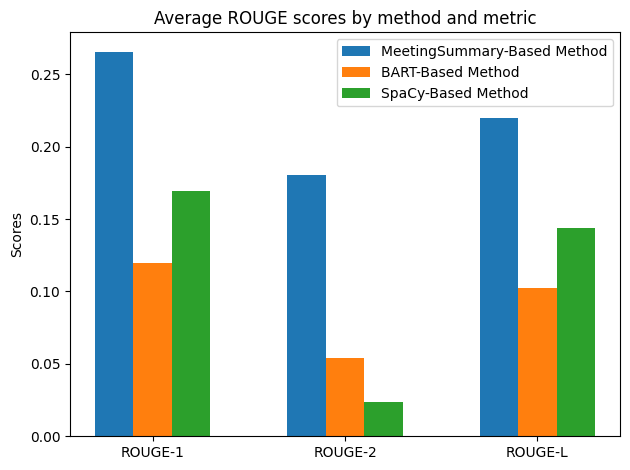

In [9]:
import re
from transformers import pipeline
from rouge_score import rouge_scorer
import numpy as np
import matplotlib.pyplot as plt
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download

# Ensure required nltk resources are available
download('stopwords')
download('punkt')

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Load the BART summarization model
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Load the MeetingSummary summarization model
meeting_summarizer = pipeline("summarization", model="knkarthick/MEETING_SUMMARY")

# List of modal verbs and desire words
modal_verbs = ["will", "shall", "may", "might", "can", "could", "would", "should", "must"]
desire_words = ["want", "need", "wish", "desire", "hope"]

def extract_tasks_from_summary(summary):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', summary)
    tasks = []

    for sentence in sentences:
        words = sentence.split()
        add_to_task = False

        for word in words:
            if word.lower() in modal_verbs or word.lower() in desire_words:
                add_to_task = True
                break

        if add_to_task:
            tasks.append(sentence.strip())

    to_do_list = " ".join(tasks)
    return to_do_list

def extract_tasks_bart(dialogue):
    summary = bart_summarizer(dialogue)[0]['summary_text']
    tasks = extract_tasks_from_summary(summary)
    return tasks

def extract_tasks_meeting_summary(dialogue):
    summary = meeting_summarizer(dialogue)[0]['summary_text']
    tasks = extract_tasks_from_summary(summary)
    return tasks

# Function to compute ROUGE scores for the task extraction methods
def compute_todo_and_rouge(dialogues, scorer):
    rouge1_scores_meeting_summary = []
    rouge2_scores_meeting_summary = []
    rougeL_scores_meeting_summary = []

    rouge1_scores_bart = []
    rouge2_scores_bart = []
    rougeL_scores_bart = []

    rouge1_scores_spacy = []
    rouge2_scores_spacy = []
    rougeL_scores_spacy = []

    c = 1
    for sample in dialogues:
        print(f"Dialogue {c}")
        # Extract tasks using the MeetingSummary-Based method
        res1 = extract_tasks_meeting_summary(sample["dialogue"])
        res1_text = res1  # The tasks are already in string format

        # Extract tasks using the BART-based method
        res2 = extract_tasks_bart(sample["dialogue"])
        res2_text = res2  # The tasks are already in string format

        # Extract tasks using the SpaCy-based method
        res3 = process_todo_list(nlp, sample["dialogue"])
        res3_text = res3  # The tasks are already in string format
    
        print("Original Dialogue:")
        print(sample["dialogue"])
        print("Reference To-Do List:")
        print(sample["to_do_list"])
        print("MeetingSummary-Based To-Do List:")
        print(res1_text)
        print("BART-Based To-Do List:")
        print(res2_text)
        print("SpaCy-Based To-Do List:")
        print(res3_text)
        print()

        # Compute the ROUGE scores for the MeetingSummary-based method
        scores_meeting_summary = scorer.score(sample['to_do_list'], res1_text)
        # Compute the ROUGE scores for the BART-based method
        scores_bart = scorer.score(sample['to_do_list'], res2_text)
        # Compute the ROUGE scores for the SpaCy-based method
        scores_spacy = scorer.score(sample['to_do_list'], res3_text)

        # Store the ROUGE-1 F1 scores
        rouge1_scores_meeting_summary.append(scores_meeting_summary['rouge1'].fmeasure)
        rouge1_scores_bart.append(scores_bart['rouge1'].fmeasure)
        rouge1_scores_spacy.append(scores_spacy['rouge1'].fmeasure)

        # Store the ROUGE-2 F1 scores
        rouge2_scores_meeting_summary.append(scores_meeting_summary['rouge2'].fmeasure)
        rouge2_scores_bart.append(scores_bart['rouge2'].fmeasure)
        rouge2_scores_spacy.append(scores_spacy['rouge2'].fmeasure)

        # Store the ROUGE-L F1 scores
        rougeL_scores_meeting_summary.append(scores_meeting_summary['rougeL'].fmeasure)
        rougeL_scores_bart.append(scores_bart['rougeL'].fmeasure)
        rougeL_scores_spacy.append(scores_spacy['rougeL'].fmeasure)

        c += 1

    # Compute the average ROUGE scores for the MeetingSummary-based method
    avg_rouge1_score_meeting_summary = np.mean(rouge1_scores_meeting_summary)
    avg_rouge2_score_meeting_summary = np.mean(rouge2_scores_meeting_summary)
    avg_rougeL_score_meeting_summary = np.mean(rougeL_scores_meeting_summary)

    print("Average ROUGE-1 F1 score for MeetingSummary-Based Method:", avg_rouge1_score_meeting_summary)
    print("Average ROUGE-2 F1 score for MeetingSummary-Based Method:", avg_rouge2_score_meeting_summary)
    print("Average ROUGE-L F1 score for MeetingSummary-Based Method:", avg_rougeL_score_meeting_summary)

    # Compute the average ROUGE scores for the BART-based method
    avg_rouge1_score_bart = np.mean(rouge1_scores_bart)
    avg_rouge2_score_bart = np.mean(rouge2_scores_bart)
    avg_rougeL_score_bart = np.mean(rougeL_scores_bart)

    print("Average ROUGE-1 F1 score for BART-Based Method:", avg_rouge1_score_bart)
    print("Average ROUGE-2 F1 score for BART-Based Method:", avg_rouge2_score_bart)
    print("Average ROUGE-L F1 score for BART-Based Method:", avg_rougeL_score_bart)

    # Compute the average ROUGE scores for the SpaCy-based method
    avg_rouge1_score_spacy = np.mean(rouge1_scores_spacy)
    avg_rouge2_score_spacy = np.mean(rouge2_scores_spacy)
    avg_rougeL_score_spacy = np.mean(rougeL_scores_spacy)

    print("Average ROUGE-1 F1 score for SpaCy-Based Method:", avg_rouge1_score_spacy)
    print("Average ROUGE-2 F1 score for SpaCy-Based Method:", avg_rouge2_score_spacy)
    print("Average ROUGE-L F1 score for SpaCy-Based Method:", avg_rougeL_score_spacy)

    # Create a list with the average scores for each method
    avg_scores_meeting_summary = [avg_rouge1_score_meeting_summary, avg_rouge2_score_meeting_summary, avg_rougeL_score_meeting_summary]
    avg_scores_bart = [avg_rouge1_score_bart, avg_rouge2_score_bart, avg_rougeL_score_bart]
    avg_scores_spacy = [avg_rouge1_score_spacy, avg_rouge2_score_spacy, avg_rougeL_score_spacy]

    # Create a list with the ROUGE metrics
    metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

    # Create a bar plot with the average scores
    x = np.arange(len(metrics))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, avg_scores_meeting_summary, width, label='MeetingSummary-Based Method')
    rects2 = ax.bar(x, avg_scores_bart, width, label='BART-Based Method')
    rects3 = ax.bar(x + width, avg_scores_spacy, width, label='SpaCy-Based Method')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Average ROUGE scores by method and metric')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    fig.tight_layout()
    plt.show()



# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Run the test
compute_todo_and_rouge(random_dialogues_todo, scorer)


Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Dialogue 1


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Louis: Gotta go, my mom's calling me
Fabian: Ok, see ya
Louis: See ya
Reference To-Do List:
Louis will go see his mom.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
louis : got ta go , mom calling fabian : ok , see ya louis : see ya



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.12 seconds, 8.33 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.28it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.13it/s]

done in 0.11 seconds, 9.37 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.63it/s]

done in 0.17 seconds, 5.75 sentences/sec


Dialogue 2


Your max_length is set to 142, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


Original Dialogue:
Max: I know I will never be a famous music producer. But check this out. My latest project. <file_other>
Jim: I'll listen to it when I get home. Knowing you I'm sure it's good.
Max: Thanks. Let me know what you think later.
Jim: I will.
Reference To-Do List:
Jim will listen to Max's project and give feedback.
MeetingSummary-Based To-Do List:
Jim will listen to it when he gets home and let him know.
BART-Based To-Do List:
Max: I know I will never be a famous music producer.
SpaCy-Based To-Do List:
max : know never famous music producer . < file_other > jim : listen get home . knowing 'm sure good . max : thanks . let know later .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.42it/s]

done in 0.14 seconds, 6.97 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]

done in 0.13 seconds, 7.42 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.27 seconds, 3.71 sentences/sec
Dialogue 3
Original Dialogue:
Leticia: Would any of you have $10 and could lend it? I'm really in need, I will give it back as soon as possible.
Lora: Sure. Is everything ok?
Leticia: Actually no... I've lost my wallet, or someone stole it... I'm not sure but I always take care of my stuff so that's even more weird.
Miranda: Shit... that's bad. If you need any help I'm also here.
Leticia: Thank you girls, really.
Lora: You better call the bank and block your account.
Leticia: I've already done it.
Miranda: Did you have like a lot of money in this wallet?
Leticia: Fortunately not... you know I hate dealing with cash.
Lora: At least that...
Leticia: Yeah... but I'm afraid I'll have to get new documents and I have no time for that :///////////
Miranda: Don't worry, maybe there will be some good person who posts it on lost/found.
Leticia: I hope so.
Reference To-Do List:
Leticia will get new documents. Leticia will check lost and found for her walle

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]


done in 0.23 seconds, 4.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.62it/s]


done in 0.23 seconds, 4.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 19.66it/s]
Your max_length is set to 62, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


done in 0.42 seconds, 2.37 sentences/sec
Dialogue 4


Your max_length is set to 142, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Jenny: Where does Mary live now?
Maria: In Southampton.
Louis: Yes, she moved there in December.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
jenny : mary live ? louis : yes , moved december .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.00it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.09 seconds, 10.90 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.12 seconds, 8.64 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]

done in 0.16 seconds, 6.10 sentences/sec
Dialogue 5



Your max_length is set to 142, but your input_length is only 63. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


Original Dialogue:
Chandler: Phoebe!! Do you have money??
Phoebe: Yes I have.. But why do you need it..
Chandler: Open your door.. And pay the delivery guy standing outside my door..
Phoebe: Oh Chandler!! you idiot... On my way..
Reference To-Do List:
Phoebe will pay the delivery guy.
MeetingSummary-Based To-Do List:
Phoebe will open Chandler's door and pay the delivery guy.
BART-Based To-Do List:
But why do you need it..
SpaCy-Based To-Do List:
pay delivery guy standing outside door ..



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.63it/s]

done in 0.15 seconds, 6.50 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.13 seconds, 7.66 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]
Your max_length is set to 62, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


done in 0.13 seconds, 7.59 sentences/sec
Dialogue 6


Your max_length is set to 142, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Original Dialogue:
Ewan: Uncle I graduated!
Uncle Jayson: My nephew graduated! How time flies, congrats!
Ewan: Haha thanks! Graduated! 😂
Uncle Jayson: 😂
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
ewan : uncle graduated ! uncle jayson : nephew graduated ! time flies , congrats ! ewan : haha thanks ! graduated ! 😂 uncle jayson : 😂



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.33it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.10 seconds, 10.24 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.08it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.11it/s]

done in 0.10 seconds, 10.05 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 45.57it/s]


done in 0.30 seconds, 3.34 sentences/sec
Dialogue 7
Original Dialogue:
Mike: How did Chicago do last night?
Pat: Chicago what?
Mike: Fire man!
Pat: Dunno.
Mike: How come?
Pat: It's soccer right?
Mike: You not a soccer fan?
Pat: Nah. Baseball and hockey is what I love.
Mike: It's Bears and White Sox right?
Pat: Bears is football. White Sox is baseball.
Mike: And hockey?
Pat: Blackhawks. But not doing well right now.
Mike: And Bulls used to be better too I guess.
Pat: True enough. Jordan times long gone.
Mike: You fancy hoops at all?
Pat: Not really, not now.
Mike: You play though?
Pat: Yeah, I still hit 3 points well enough.
Mike: I like to play sometime.
Pat: Good idea. We need to do meet up one day.
Mike: Yeah, always good to hit the ball.
Reference To-Do List:
Mike and Pat will plan to meet up and play basketball.
MeetingSummary-Based To-Do List:
Pat and Mike would like to meet up one day to play basketball.
BART-Based To-Do List:
Pat: We need to do meet up one day.
SpaCy-Based To-Do

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.15 seconds, 6.72 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.81it/s]

done in 0.14 seconds, 7.03 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.63it/s]


done in 0.54 seconds, 1.87 sentences/sec
Dialogue 8
Original Dialogue:
Rachel: <file_other> Top 50 Best Films of 2018. :)
Janice: Omg, I've watched almost all 50... xDD
Spencer: Hahah, Deadpool 2 also??
Janice: Yep.
Spencer: Really??
Janice: My bf forced me to watch it xD
Rachel: Hahah.
Janice: It wasn't that bad. I thought it'd be worse.
Rachel: And Avengers? :D
Janice: 2 times.
Rachel: Omg.
Janice: xP
Rachel: You are the best gf in the world. Your bf should appreciate that ;-)
Janice: He does. x)
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
: ) janice : omg , watched almost 50 ... janice : bf forced watch xd rachel : hahah . thought would worse . bf appreciate ; - ) janice : .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.86it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.71it/s]

done in 0.09 seconds, 10.60 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.18it/s]

done in 0.10 seconds, 10.43 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 43.60it/s]
Your max_length is set to 62, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


done in 0.34 seconds, 2.91 sentences/sec
Dialogue 9


Your max_length is set to 142, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Marika: Are you coming today?
Lara: Yes!
Marika: Great!
Reference To-Do List:
Lara will go to Marika's place.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
marika : coming today ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

done in 0.13 seconds, 7.50 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.13 seconds, 7.91 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.13 seconds, 7.74 sentences/sec
Dialogue 10



Your max_length is set to 142, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


Original Dialogue:
Gary: Hey, don't forget about Tom's bday party!
Lara: I won't! What time should I show up?
Gary: Around 5 pm. He's supposed to be back home at 5:30, so we'll have just enough time to prep things up.
Lara: You're such a great boyfriend. He will be so happy!
Gary: Yep, I am :)
Lara: So I'll just pick up the cake and get the balloons...
Gary: Thanks, you're so helpful. I've already paid for the cake.
Lara: No problem, see you at 5 pm!
Gary: See you!
Reference To-Do List:
Lara will pick up the cake and get the balloons for Tom's birthday party.
MeetingSummary-Based To-Do List:
Lara will come to Tom's birthday party at 5 pm. She will pick up the cake and get the balloons. Gary will pay for the cake.
BART-Based To-Do List:
She will pick up the cake and get the balloons. Gary will be back home at 5:30 pm. He will be so happy! Lara says.
SpaCy-Based To-Do List:
supposed back home 5:30 , enough time prep things . happy ! gary : yep , : ) lara : pick cake get balloons ... alre

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 57.25it/s]


done in 0.26 seconds, 3.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.27 seconds, 3.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 20.66it/s]


done in 0.44 seconds, 2.25 sentences/sec
Dialogue 11
Original Dialogue:
Perry: Have you thought about holiday yet?
Marlow: Asia?
Perry: You mean in July or August?
Marlow: W/Janet we thought about September it's cheaper I guess.
Janet: Yeah but we need to check the weather and everything.
Forster: Cloete wanted to go to the mountains so I guess that's my plan.
Perry: Frankly we have no idea. Went to seaside last year.
Marlow: Asia could be the place to go. Janet would be cool yeah?
Janet: Sure thing. Would be great to go together.
Perry: Dunno if we can afford. Need to talk to Nina.
Janet: Why not meet tonight over beer and talk?
Perry: Super but not today no. Cinema :)
Janet: Oh I forgot you won the tickets right?
Perry: Yeah but we could meet tomorrow evening if you're free.
Janet: Do we have plans Marlow?
Marlow: No I don't think so.
Forster: Could we come over too?
Perry: Yeah fantastic. BYOB though.
Forster: Sure thing 8 pm is fine?
Perry: Perfect for me.
Janet: Great for us. We c

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 43.59it/s]


done in 0.27 seconds, 3.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]

done in 0.17 seconds, 6.06 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]


done in 0.92 seconds, 1.09 sentences/sec
Dialogue 12
Original Dialogue:
Janet: I am ashamed. Who voted for this pussy? It's your fault.
Alison: Remember the Wizard of Oz? He might have melted.
Nicole: He’s a sissy boy.
Cheryl: RAIN omfg that's so shameful and disrespectful.
Buff: Pussy in Chief.
Linda: Trump is selfish and inconsiderate.
Janet: What an embarrassment to our nation and the world!!!
Roz: Where is Elsie? I miss you vomit.
Cheryl: WTF EVER Trumpola didn't want to mess up his pity full comb over.....
Janet: Trump = snowflake.
Linda: Baby. He's a spoiled brat baby. Nothing about Donald Trump to be proud of or want to defend.
Arlene: His hair and makeup would have been ruined!
Roz: Exactly.
Leslie: Which adviser, who he doesn't listen to anyway, thought missing this ceremony was a good idea? Shameful!
Eric: What a pussy. We should grab him and kick him to the curb.
Sue: All the other leaders managed to make it, so there is no excuse, for me.
Roz: It's all about the hair.
Sue: 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.10 seconds, 10.13 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.37it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

done in 0.15 seconds, 6.81 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.61 seconds, 1.65 sentences/sec
Dialogue 13
Original Dialogue:
Quinn: How's it hanging boy?
Kyle: Not bad, going out tonight?
Quinn: Yeah, need to get out after fucking school is actually over for a bit.
Kyle: Christ, yeah! It's a shitting hell hole, can't wait to leave next year, I'm leaving at Easter.
Quinn: Lucky you, I've got GCSES. Your a jammy bastard if your parents aren't insisting that you stay on.
Kyle: No point! I'm working for my Uncle Kev at the building site, my cousin was taken on with an apprenticeship in bricklaying last year, maybe do that myself.
Quinn: God, I'm so jealous! I absolutely fucking hate school and I suck at exams too! Need to have them under my belt, they always say.
Kyle: Why don't you talk to them about it?
Quinn: They wouldn't bloody listen! I buggered up my mocks too and I have to retake the subjects I failed in, it never bloody ends!
Kyle: Why don't I ask Kev about the site, they always need labourers and they like us young ones cos we're a

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]


done in 0.22 seconds, 4.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 48.88it/s]


done in 0.25 seconds, 4.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 21.33it/s]


done in 1.16 seconds, 0.86 sentences/sec
Dialogue 14
Original Dialogue:
Louis: Hey, how's your day?
Cheryl: Okay… I guess.
Louis: Aha, someone's feeling a bit down, am I right?
Cheryl: Yea, sort of…
Louis: Go on, tell me what happened.
Cheryl: I… just had an argument with my mom.
Louis: Jesus, what again?
Cheryl: I forgot to close the window when I was leaving home!
Louis: And that's it?
Cheryl: No, not only… Ya know, wouldn't be that bad, but I got angry, started screaming and everything.
Louis: Not a good idea, babe.
Cheryl: I knoooow.
Louis: Was it really bad?
Cheryl: I suppose yea, she kicked me out.
Louis: WHAT?
Cheryl: I mean I don't have to move right now, but she gave me time till the end of the year.
Louis: I'm sorry…
Cheryl: Naah, don't be, I believe it's for good. I couldn't stand her anyway.
Reference To-Do List:
Cheryl will move out by the end of the year.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
cheryl : okay… guess . louis : aha ,

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.89it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

done in 0.14 seconds, 7.25 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.81it/s]

done in 0.14 seconds, 7.23 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]


done in 0.52 seconds, 1.94 sentences/sec
Dialogue 15
Original Dialogue:
Anna: Mum, I have an awful stomachache.
Joanna: Oh, dear, when did you get it?
Anna: At night, and it won’t stop.
Joanna: Is it something you ate?
Anna: Maybe. I'm not sure.
Joanna: What did you have for breakfast?
Anna: The usual, cereal with milk and a banana.
Joanna: Maybe the milk was bad.
Anna: It didn't smell bad.
Joanna: Maybe the banana was bad.
Anna: No, the banana was delicious.
Joanna: Maybe you just need to go to the bathroom.
Anna: No, that's not the problem.
Joanna: Maybe it will go away in a little while.
Anna: I wish it would. Hopefully. If not, maybe we should go and see a doctor.
Joanna: Yeah, I think so...
Anna: I'll get you a hot tea with some fresh mint leaves. Hope it will help.
Joanna: Please do, I’m in my room...
Anna: Will be in ten minutes.
Reference To-Do List:
Anna will get Joanna a hot tea with fresh mint leaves. Anna and Joanna will see a doctor if the stomachache doesn't go away.
Meet

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 43.59it/s]


done in 0.28 seconds, 3.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.98it/s]


done in 0.26 seconds, 3.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.44it/s]


done in 0.47 seconds, 2.12 sentences/sec
Dialogue 16


Your max_length is set to 142, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


Original Dialogue:
Joseph: It's fuzzy but I think you can recognize what's that.
Joseph: <file_photo>
Ella: Ooooo. Baby cows?
Joseph: Uncle Janek has twin cows.
Ella: Twins, darling. Good for him!! So cool.
Ella: Wanna touch them!
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Joseph: It's fuzzy but I think you can recognize what's that.
SpaCy-Based To-Do List:
ella : wan na touch !



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.33it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.10it/s]

done in 0.10 seconds, 10.31 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 251.02it/s]

done in 0.15 seconds, 6.59 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.91it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
Your max_length is set to 62, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


done in 0.12 seconds, 8.20 sentences/sec
Dialogue 17


Your max_length is set to 142, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Sue: Can you pick the car up after work tomorrow please?
James: Yes and pay?
Sue: Yes, I will transfer the money in.
James: Ok x
Reference To-Do List:
James will pick up the car after work tomorrow. Sue will transfer the money.
MeetingSummary-Based To-Do List:
James will pick up Sue's car after work tomorrow and pay for it.
BART-Based To-Do List:
Sue: Can you pick the car up after work tomorrow please? Sue: Yes, I will transfer the money in. Sue: Can I pick up the car tomorrow? Can I pay for it? Can you pay for the car? Can we pick it up tomorrow after work please?James: Yes.
SpaCy-Based To-Do List:
sue : pick car work tomorrow please ? james : yes pay ? sue : yes , transfer money .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.66it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]

done in 0.16 seconds, 6.23 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]


done in 0.48 seconds, 2.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.19 seconds, 5.13 sentences/sec
Dialogue 18


Your max_length is set to 142, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


Original Dialogue:
Chris: Oh, and we pushed some girls into the pool :)
June: That's not nice!
Chris: Depends how you look at it ;)
June: How come?
Chris: Well, we got them to undress, 'cause they were soaking wet :)
June: You're awful!
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
chris : well , got undress , 'cause soaking wet : ) june : awful !



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]

done in 0.10 seconds, 10.32 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.67it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

done in 0.09 seconds, 10.58 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.34it/s]


done in 0.21 seconds, 4.87 sentences/sec
Dialogue 19
Original Dialogue:
Rudi: Hetta, did you see the last Trump video?
Henrietta: Nope. What did he do now?
Rudi: <file_video>
Henrietta: OMG. What a jerk.
Rudi: It gets worse.
Rudi: <file_other>
Rudi: The whole interview is here.
Henrietta: Can't believe he said that about a congresswoman.
Rudi: Yeah.
Henrietta: Do you wonder where the limit is?
Rudi: What do you mean?
Henrietta: If he will say something that will actually get him kicked out of the White House.
Rudi: Not really.
Henrietta: Fuck.
Rudi: Yeah.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Rudi asks Hetta if he will say something that will get him kicked out of the White House.
SpaCy-Based To-Do List:
rudi : hetta , see last trump video ? rudi : gets worse . rudi : mean ? henrietta : say something actually get kicked white house .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

done in 0.10 seconds, 10.19 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]

done in 0.18 seconds, 5.42 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 45.58it/s]
Your max_length is set to 62, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


done in 0.29 seconds, 3.42 sentences/sec
Dialogue 20


Your max_length is set to 142, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


Original Dialogue:
Ally: How many did you do so far?
Jill: Like 20 or 30. I can't do more than 3-4 per day.
Ally: How many hours?
Jill: 40? maybe 35...
Ally: Ok, same here.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.31it/s]

done in 0.10 seconds, 10.40 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.10 seconds, 9.71 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]

done in 0.10 seconds, 10.46 sentences/sec
Average BERT F1 score for MeetingSummary-Based Method: 0.41880291104316714
Average BERT F1 score for BART-Based Method: 0.48407030701637266
Average BERT F1 score for SpaCy-Based Method: 0.7874886095523834


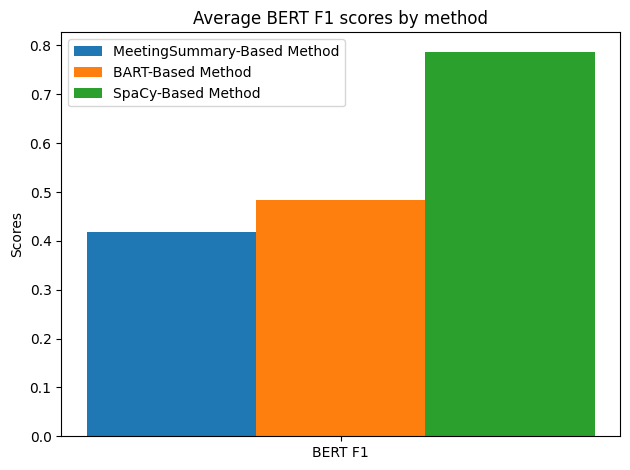

In [10]:
from bert_score import score

def compute_todo_and_bert_score(dialogues):
    bert_scores_meeting_summary = []
    bert_scores_bart = []
    bert_scores_spacy = []

    c = 1
    for sample in dialogues:
        print(f"Dialogue {c}")
        # Extract tasks using the MeetingSummary-Based method
        res1 = extract_tasks_meeting_summary(sample["dialogue"])
        res1_text = res1  # The tasks are already in string format

        # Extract tasks using the BART-based method
        res2 = extract_tasks_bart(sample["dialogue"])
        res2_text = res2  # The tasks are already in string format

        # Extract tasks using the SpaCy-based method
        res3 = process_todo_list(nlp, sample["dialogue"])
        res3_text = res3  # The tasks are already in string format
    
        print("Original Dialogue:")
        print(sample["dialogue"])
        print("Reference To-Do List:")
        print(sample["to_do_list"])
        print("MeetingSummary-Based To-Do List:")
        print(res1_text)
        print("BART-Based To-Do List:")
        print(res2_text)
        print("SpaCy-Based To-Do List:")
        print(res3_text)
        print()

        # Compute the BERT scores for the MeetingSummary-based method
        P1, R1, F1 = score([res1_text], [sample['to_do_list']], lang="en", verbose=True)
        bert_scores_meeting_summary.append(F1.mean().item())

        # Compute the BERT scores for the BART-based method
        P2, R2, F2 = score([res2_text], [sample['to_do_list']], lang="en", verbose=True)
        bert_scores_bart.append(F2.mean().item())

        # Compute the BERT scores for the SpaCy-based method
        P3, R3, F3 = score([res3_text], [sample['to_do_list']], lang="en", verbose=True)
        bert_scores_spacy.append(F3.mean().item())

        c += 1

    # Compute the average BERT scores for the MeetingSummary-based method
    avg_bert_score_meeting_summary = np.mean(bert_scores_meeting_summary)
    print("Average BERT F1 score for MeetingSummary-Based Method:", avg_bert_score_meeting_summary)

    # Compute the average BERT scores for the BART-based method
    avg_bert_score_bart = np.mean(bert_scores_bart)
    print("Average BERT F1 score for BART-Based Method:", avg_bert_score_bart)

    # Compute the average BERT scores for the SpaCy-based method
    avg_bert_score_spacy = np.mean(bert_scores_spacy)
    print("Average BERT F1 score for SpaCy-Based Method:", avg_bert_score_spacy)

    # Create a list with the average scores for each method
    avg_scores_meeting_summary = [avg_bert_score_meeting_summary]
    avg_scores_bart = [avg_bert_score_bart]
    avg_scores_spacy = [avg_bert_score_spacy]

    # Create a list with the BERT metrics
    metrics = ['BERT F1']

    # Create a bar plot with the average scores
    x = np.arange(len(metrics))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, avg_scores_meeting_summary, width, label='MeetingSummary-Based Method')
    rects2 = ax.bar(x, avg_scores_bart, width, label='BART-Based Method')
    rects3 = ax.bar(x + width, avg_scores_spacy, width, label='SpaCy-Based Method')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Average BERT F1 scores by method')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    fig.tight_layout()
    plt.show()

# Run the test
compute_todo_and_bert_score(random_dialogues_todo)


Your max_length is set to 62, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Dialogue 1


Your max_length is set to 142, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Dialogue:
Sean: I overslept :/
Sam: Again??
Sean: I know.
Reference To-Do List:
Sean will try not to oversleep again.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
sean : know .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

done in 0.12 seconds, 8.48 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]

done in 0.12 seconds, 8.40 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 285.00it/s]
Your max_length is set to 62, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


done in 0.13 seconds, 7.97 sentences/sec
Dialogue 2


Your max_length is set to 142, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Dialogue:
Blake: where r u men?
George: comin'!
Blake: good
Reference To-Do List:
George will come to meet Blake.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.59it/s]

done in 0.16 seconds, 6.17 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.11 seconds, 9.26 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.17it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.02it/s]
Your max_length is set to 62, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


done in 0.11 seconds, 9.21 sentences/sec
Dialogue 3


Your max_length is set to 142, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Mike: Let's go for a beer
Tom: Now?
Mike: Yes
Ben: Ok
Reference To-Do List:
Mike, Tom, and Ben will go for a beer.
MeetingSummary-Based To-Do List:
Mike, Tom and Ben will go for a beer.
BART-Based To-Do List:

SpaCy-Based To-Do List:
mike : let go beer tom : ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.13 seconds, 7.70 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]

done in 0.13 seconds, 7.66 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
Your max_length is set to 62, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


done in 0.13 seconds, 7.68 sentences/sec
Dialogue 4


Your max_length is set to 142, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Dialogue:
Jair: Still busy?
Callum: Yes a little sorry
Jair: ok
Reference To-Do List:
Callum will finish his work.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
callum : yes little sorry jair : ok



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.05it/s]

done in 0.11 seconds, 9.47 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

done in 0.16 seconds, 6.06 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
Your max_length is set to 62, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


done in 0.12 seconds, 8.35 sentences/sec
Dialogue 5


Your max_length is set to 142, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Dialogue:
William: are you still angry?
Emilia: YES 
William: :(
Reference To-Do List:
William will try to make amends with Emilia.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
emilia : yes william : : (



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]

done in 0.13 seconds, 7.52 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.41it/s]

done in 0.13 seconds, 7.73 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]
Your max_length is set to 62, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


done in 0.13 seconds, 7.70 sentences/sec
Dialogue 6


Your max_length is set to 142, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Dialogue:
Marika: Are you coming today?
Lara: Yes!
Marika: Great!
Reference To-Do List:
Lara will come today.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
marika : coming today ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.11 seconds, 9.38 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.62it/s]

done in 0.10 seconds, 9.70 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
Your max_length is set to 62, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


done in 0.10 seconds, 9.57 sentences/sec
Dialogue 7


Your max_length is set to 142, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Dialogue:
Gina: did u lock the door
Warren: yes
Gina: good, thanks
Reference To-Do List:
Warren locked the door.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
gina : u lock door warren : yes gina : good , thanks



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.75it/s]

done in 0.10 seconds, 9.96 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.72it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.94it/s]

done in 0.10 seconds, 9.61 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.40it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.59it/s]
Your max_length is set to 62, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


done in 0.14 seconds, 6.91 sentences/sec
Dialogue 8


Your max_length is set to 142, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
Tony: <photo_file>
Amy: Sweet little cat <3
Lucas: Adorable!!
Reference To-Do List:
No tasks needed.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.34it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

done in 0.15 seconds, 6.86 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]

done in 0.10 seconds, 10.34 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]
Your max_length is set to 62, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


done in 0.10 seconds, 10.15 sentences/sec
Dialogue 9


Your max_length is set to 142, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
Mae: Is the dress ready?
Cael: Not yet
Mae: Hope to have it soon
Reference To-Do List:
Cael will finish the dress soon.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Mae: Hope to have it soon.
SpaCy-Based To-Do List:




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.13 seconds, 7.65 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.42it/s]

done in 0.13 seconds, 7.82 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.61it/s]
Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


done in 0.12 seconds, 8.02 sentences/sec
Dialogue 10


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Louis: Gotta go, my mom's calling me
Fabian: Ok, see ya
Louis: See ya
Reference To-Do List:
Louis will talk to his mom.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
louis : got ta go , mom calling fabian : ok , see ya louis : see ya



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.12 seconds, 8.41 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.42it/s]

done in 0.12 seconds, 8.67 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 251.04it/s]

done in 0.18 seconds, 5.46 sentences/sec



Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Dialogue 11


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Ben: pizza tonight?
Steven: sure thing!
Ben: at Marco's?
Steven: (y)
Reference To-Do List:
Ben and Steven will have pizza at Marco's tonight.
MeetingSummary-Based To-Do List:
Ben and Steven will have pizza tonight at Marco's.
BART-Based To-Do List:

SpaCy-Based To-Do List:
steven : sure thing ! ben : marco ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.13it/s]

done in 0.13 seconds, 7.45 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.34it/s]

done in 0.15 seconds, 6.49 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.81it/s]
Your max_length is set to 62, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


done in 0.14 seconds, 7.33 sentences/sec
Dialogue 12


Your max_length is set to 142, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
Ty: do you speak French?
Veronica: no 
Ty: pity, I need a translator
Reference To-Do List:
Ty will find a French translator.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Ty: do you speak French?Veronica: no                 Ty: pity, I need a translator. Ty: I need to speak to you in French.
SpaCy-Based To-Do List:
ty : speak french ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.33it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.68it/s]

done in 0.12 seconds, 8.48 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 60.73it/s]


done in 0.30 seconds, 3.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


done in 0.13 seconds, 7.71 sentences/sec
Dialogue 13


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Karine: <file_video>
Jessie: That was us at kindergarten!
Karine: yes!!
Reference To-Do List:
No tasks needed.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.96it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.34it/s]

done in 0.10 seconds, 9.93 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.37it/s]

done in 0.11 seconds, 9.49 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.95it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
Your max_length is set to 62, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


done in 0.10 seconds, 9.93 sentences/sec
Dialogue 14


Your max_length is set to 142, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Dialogue:
Tiffany: buy me a burger on your way home
Railey: ok
Tiffany: thx, sis :)
Reference To-Do List:
Railey will buy a burger for Tiffany on her way home.
MeetingSummary-Based To-Do List:
Railey will buy Tiffany a burger on her way home.
BART-Based To-Do List:

SpaCy-Based To-Do List:
tiffany : buy burger way home railey : ok tiffany : thx , sis : )



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.14 seconds, 7.03 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.99it/s]

done in 0.15 seconds, 6.89 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


done in 0.22 seconds, 4.65 sentences/sec
Dialogue 15


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Sue: Call me when you get this.
Sue: it's important
Steve: OK, I'm calling
Reference To-Do List:
Steve will call Sue.
MeetingSummary-Based To-Do List:
Steve will call Sue when he gets an important message.
BART-Based To-Do List:

SpaCy-Based To-Do List:
sue : call get . sue : important steve : ok , 'm calling



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.40it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.14 seconds, 6.91 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]

done in 0.11 seconds, 8.73 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.37it/s]
Your max_length is set to 62, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


done in 0.16 seconds, 6.19 sentences/sec
Dialogue 16


Your max_length is set to 142, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Dialogue:
Ola: Hey running late
Ola: I should be free by 8
Kurt: Sure no prob, call me
Reference To-Do List:
Ola will call Kurt after she is free by 8.
MeetingSummary-Based To-Do List:
Ola will be free by 8. Kurt will call him if he's running late.
BART-Based To-Do List:
Ola: I should be free by 8.
SpaCy-Based To-Do List:
ola : hey running late ola : free 8 kurt : sure prob , call



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

done in 0.16 seconds, 6.21 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]

done in 0.14 seconds, 7.39 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.75it/s]
Your max_length is set to 62, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


done in 0.16 seconds, 6.20 sentences/sec
Dialogue 17


Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Daisy: going home?
Lisa: not yet
Daisy: please be back before 11 pm
Lisa: ok
Reference To-Do List:
Lisa will be back home before 11 pm.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
daisy : going home ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.59it/s]

done in 0.13 seconds, 7.66 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 398.55it/s]

done in 0.13 seconds, 7.62 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.35it/s]
Your max_length is set to 62, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


done in 0.13 seconds, 7.93 sentences/sec
Dialogue 18


Your max_length is set to 142, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


Original Dialogue:
Zoe: <file_video>
Frank: Love you!
Zoe: :-*
Frank: Have a good day, babe :-*
Reference To-Do List:
No tasks needed.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]

done in 0.11 seconds, 9.35 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.21it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.35it/s]

done in 0.13 seconds, 7.63 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]
Your max_length is set to 62, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


done in 0.13 seconds, 7.61 sentences/sec
Dialogue 19


Your max_length is set to 142, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Dialogue:
Dan: buy me a sandwich on your way to work.
Kevin: ok, no problem!
Dan: thanks!
Reference To-Do List:
Kevin will buy a sandwich for Dan on his way to work.
MeetingSummary-Based To-Do List:
Kevin will buy Dan a sandwich on his way to work.
BART-Based To-Do List:
Dan: OK, thanks!Kevin: I will buy you a sandwich.
SpaCy-Based To-Do List:
dan : buy sandwich way work .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.14 seconds, 7.20 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.34it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.75it/s]

done in 0.15 seconds, 6.81 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.60it/s]
Your max_length is set to 62, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


done in 0.15 seconds, 6.71 sentences/sec
Dialogue 20


Your max_length is set to 142, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Dialogue:
Dolph: hey
Dolph: remember to bring your passport tomorrow
Ziggler: Cool, i will
Reference To-Do List:
Ziggler will bring his passport tomorrow.
MeetingSummary-Based To-Do List:
Ziggler will bring his passport tomorrow.
BART-Based To-Do List:

SpaCy-Based To-Do List:
dolph : hey dolph : remember bring passport tomorrow ziggler : cool ,



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]

done in 0.11 seconds, 8.73 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.13 seconds, 7.67 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]

done in 0.17 seconds, 5.80 sentences/sec


Average BERT F1 score for MeetingSummary-Based Method: 0.3415960043668747
Average BERT F1 score for BART-Based Method: 0.17722625136375428
Average BERT F1 score for SpaCy-Based Method: 0.6329884707927704


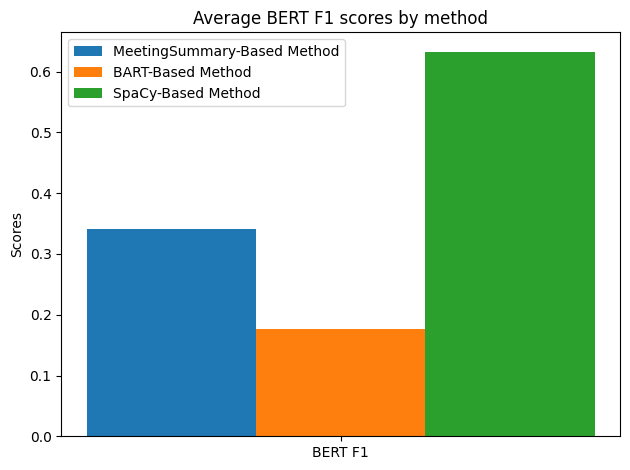

In [11]:
compute_todo_and_bert_score(shortest_dialogues_todo)

Dialogue 1
Original Dialogue:
Noah: Hi there! The quince we talked about the other day... Are you still interested?
Sophie: Hello Noah, but of course I am. Thank you.
Noah: Actually William went to collect the rest of them for you immediately. They're in a basket on our terrace, so you can collect them any time.
Sophie: That's very very kind of him! He's really a darling.
Sophie: We won't be going your direction any time soon I'm afraid. How long will they keep? Is it windfall?
Noah: Both really but they all look very healthy. No bruises afa one can see. Or only odd small ones. They'd be alright for a couple of days I guess. The weather's cool.
Sophie: It would be a shame if they rotted. I'll talk to Frank and maybe to the twins too and go back to you asap.
Noah: OK.
Sophie: Hey Noah, the twins will be on their way from Notts tomorrow afternoon and passing Windfield. Is it alright if they pop in and collect the quince?
Noah: Absolutely! In fact, anyone can come any time and just take t

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 51.39it/s]


done in 0.31 seconds, 3.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 21.80it/s]


done in 0.37 seconds, 2.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]


done in 1.86 seconds, 0.54 sentences/sec
Dialogue 2
Original Dialogue:
Charles: How can you tell that someone has gluten intolerance?
Karen: You can have coeliac disease which makes it impossible for you to digest gluten or be allergic to gluten. From what I've heard, being allergic is far worse because you have an allergic reaction that can be lethal, while being intolerant can make you feel some unpleasant symptoms, but I don't think it may lead to your death.
Jack: Why are you asking? Is there something wrong?
Charles: Hm, I don't know, I feel that I may be allergic or something.
Monica: Do you have any symptoms? Check those articles:
Monica: <file_other>, <file_other>
Karen: I think that you may have a very very light allergy at best, otherwise, you would have known - trust me.
Karen: When it comes to intolerance... I know it's very hip to be gluten intolerant, but I don't believe that suddenly half of the population is gluten intolerant. Unless you have coeliac disease, I think yo

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.77it/s]

done in 0.14 seconds, 7.25 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 20.89it/s]


done in 0.46 seconds, 2.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 1.05 seconds, 0.95 sentences/sec
Dialogue 3
Original Dialogue:
Mell: Hi there! How are you doing?
Gloria: Hi Mell! We are fine, just the daily grind ;) And yourselves?
Mell: Not much happening either. An odd phone call with the kids. Or Tad's sister:(( Not much otherwise.
Gloria: Yeah... Life has become so quiet since the kids are out of the house. We had more to get used to it. But it must be hard for you. Especially you I mean.
Mell: I don't know. Sometimes I even forget that I should be missing them. In a way, I do like this peace and quiet now.
Gloria: Small wonder. You had a hell of a time with them just before they went to college. I'd say you need to recover now.
Mell: I guess you're right. But maybe I should feel guilty or something?
Gloria: Don't be silly! You are a fantastic mom.
Mell: Thanks Gloria.
Gloria: Anyway I'm happy to hear from you again. We should really have a nice do again.
Mell: YES! Splendid!
Gloria: The weather is just brilliant, perfect for a BBQ. Wha

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]


done in 0.23 seconds, 4.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.71it/s]


done in 0.24 seconds, 4.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.34it/s]


done in 1.43 seconds, 0.70 sentences/sec
Dialogue 4
Original Dialogue:
Andy: Hello. I have had a good look and have done some tests on the mold in your spare bedroom upstairs and in the dining room.
Betty: Hello Andy. Thank you for that, what are your thoughts? 
Andy: I think it is caused by condensation, as most of the moist settles on and around the windows.
Betty: Why is that?
Andy: Those are the coldest areas and therefore where the moist in the warm air turns into water. On the windows, it's just water, on the walls, the moist will allow mold to grow.
Betty: So why is it all over the spare room walls, and all around the dining room? but not in other rooms?
Andy: Probably because they have external walls which are cooler than internal walls.
Betty: So why

 only that bedroom and not the other ones?
Andy: I guess those rooms are most affected as the spare room is next to the bathroom and the dining room next to the kitchen.
Betty: But why isn't there mold on the kitchen and bathroom

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.12it/s]


done in 0.29 seconds, 3.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 52.77it/s]

done in 0.33 seconds, 3.01 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 1.76 seconds, 0.57 sentences/sec
Dialogue 5
Original Dialogue:
Catherine: Hi Jake, last week I applied for an accounting position @ Pandora.
Jake: Hey Cathy! Really? That's great!
Catherine: Are you still working there?
Jake: I sure am. It's already been 5 yrs.
Catherine: Time flies. So I take it you're satisfied?
Jake: I am, I rarely think about changing companies. 
Catherine: Does the company offer possibilities of personal development & promotion?
Catherine: I mean is there a clear career path?
Jake: Yup, that's the main pro of this place & the benefits.
Jake: I was promoted twice during these 5 yrs & the salary increase with each promotion is quite significant.
Catherine: That's good to hear. Most companies today are implementing cost-saving policies & the employees are the ones who suffer.
Catherine: I mean at my current workplace you can only count on inflation salary increases. So you barely see the difference on your paycheck.
Jake: That's what I hear from most of my fr

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 283.76it/s]


done in 0.20 seconds, 4.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 281.86it/s]

done in 0.18 seconds, 5.61 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 222.18it/s]


done in 2.35 seconds, 0.43 sentences/sec
Dialogue 6
Original Dialogue:
Kate: I just had a fight with Chris :/
Mary: Oh no, not again.
Kate: It's not me who started it. I don't know why he says certain stuff, it seems like he's doing it on purpose.
Mary: What was it this time?
Kate: Same thing, as always. Really, he knows what I think and I know what he thinks so I don't bring up certain things. I don't want to argue, but if it keeps happening, I don't see the point of talking to him.
Kate: I'm angry every single time I talk with him.
Mary: Eh, I don't get why he keeps doing it. What did he say?
Kate: I don't want to get worked up over it again, but really usual stuff. He watched a programme about the refugees and went on a rant about it.
Mary: Oh god.
Kate: Right?! I don't know why I'm still talking with him. I tried to talk some sense into him, apparently with no luck.
Mary: What did you tell him?
Kate: What I usually tell him. He was an immigrant once, he was working abroad, I sent h

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.12it/s]

done in 0.18 seconds, 5.70 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 41.77it/s]


done in 0.29 seconds, 3.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]


done in 0.99 seconds, 1.01 sentences/sec
Dialogue 7
Original Dialogue:
Nancy: Yeah, but you can also read the news online ;)
Phil: I know, but imagine - you're keen on technology and you get all the news in one place. Then you can choose what to read and what not.
Nancy: Sounds sensible. Does it have something for fashion?
Phil: Probably so. Not sure, though.
Nancy: How about you, Vic?
Vic: I still prefer Facebook. Had Twitter once, but the interaction with others is nothing compared with Facebook.
Phil: Well, it's intended in a completely different way. 
Vic: What do you mean?
Phil: In my opinion, Twitter is not for interacting like on Facebook, but for getting news fast and from reliable, more or less, sources. You can follow anyone and anyone can follow you.
Vic: Still, on Facebook I can share stuff with my friends, join groups and talk about things that interest me. And I don't have to limit myself to 140 characters.
Phil: 280. Still, a downside. On the other hand, if people were a

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.39it/s]

done in 0.18 seconds, 5.68 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.75it/s]


done in 0.32 seconds, 3.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.75it/s]


done in 1.52 seconds, 0.66 sentences/sec
Dialogue 8
Original Dialogue:
Sybille: Hello, I'm trying to make my online registration for the flight AF3581 from Minneapolis to Paris on the 29th, but I only get an error message. Here is my file number NRTTU and my flying blue number XXXX. Thanks for your help.
Air France: Hello Sybille, we acknowledge receipt of your message and will return to you as soon as possible.
Air France: After checking, your flight is operated by Delta Airlines for departure from the United States. Online registration works from the Delta site.
Sybille: Hello again, I still have trouble with my son's online registration. I'm really angry as it cost me more than 40 euros for 20 minutes on your short number 3654, and still, I don't have any answer. He couldn't get his flight yesterday, so I asked for it to be postponed. I twice gave my credit

 number but still the ticket is not delivered.
Air France: Of course, I give the file to an agent.
Air France: Please be aware

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]


done in 0.23 seconds, 4.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 48.89it/s]


done in 0.25 seconds, 3.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.62it/s]


done in 1.19 seconds, 0.84 sentences/sec
Dialogue 9
Original Dialogue:
Brett: So what do you do there? Drive a tank all the time?
John: Yes and no. You've got players from around the world and they have their tank squadrons and you battle them. Can be a lot of fun!
Andrew: So what happens if someone is on a higher level than you? They basically destroy you!
John: That's not a problem. The game doesn't allow higher-ranked players to interact with players out of their range.
Brett: What do you mean?
John: If you're on level 5, a player on level 30 can't attack you. 
Andrew: Sensible. Unlike WoW.
John: So what's WoW like?
Andrew: Imagine having a character you really like and you give it a lot of your attention and get experience points, level up and so on. Someone who's played the game for like a year comes and kills you instantly.
Brett: Not cool. 
John: Yeah. Why would they allow such a thing?
Andrew: Well, open world, you can team up with anyone, do quests together, arrange fighting t

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.15 seconds, 6.55 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.19 seconds, 5.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.62it/s]


done in 1.76 seconds, 0.57 sentences/sec
Dialogue 10
Original Dialogue:
Sam: Hi, I need help.
Sarah fashion: Hello, how can I help?
Sam: Actually, I was looking for a nice black dress for my wife, I mean I don't want the in-store product.
Sarah fashion: Yes sir, we make dresses on order as per customer requirements.
Sam: Yeah, I saw that option on the web page, actually it's a surprise gift for her, but I have no idea what should be the requirements of the dress.
Sarah fashion: Oh, in that case, why don't you choose something ready-made sir?
Sam: Actually, I want something different for her, something she has not seen before.
Sarah fashion: That’s nice, do you have any sketch in your mind it would be easier to help?
Sam: Yes, it should be a dress, black in color, decent and elegant, and.... that's it :(
Sarah fashion: :) Don’t worry Sir we will try to help you as much as we can but you have to choose between the choices we give you.
Sam: Sure.
Sarah fashion: Would you mind coming to th

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 43.59it/s]


done in 0.28 seconds, 3.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.70it/s]


done in 0.30 seconds, 3.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.44it/s]


done in 1.56 seconds, 0.64 sentences/sec
Dialogue 11
Original Dialogue:
Clara: Hi, what are you up to?
Neela: Not much, chilling out.
Clara: Just rewatching Dear White People on Netflix, love it! 😍
Neela: Oh yeah, heard of it, but not seen it yet? Any good?
Clara: Well, yes! I just said it was, LOL. It's about a fictional Ivy League University and the students in one House of Residence.
Neela: Why is it called Dear White People?
Clara: That's the name of the radio show the main character, Sam, presents on college radio.
Neela: Yeah, but why is it so good?
Clara: Well, it's mainly stories from the perspective of black students there, which I find very interesting. The characters are strong and likable too.
Neela: I suppose it's rather different from the UK, then?
Clara: It seems so, as there is a lot more racial awareness and discrimination there than here. It all kicks off when there is a Blackface party held by an elite group of white students, which gets out of hand.
Neela: How's tha

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]

done in 0.16 seconds, 6.16 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]

done in 0.16 seconds, 6.12 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]


done in 1.70 seconds, 0.59 sentences/sec
Dialogue 12
Original Dialogue:
Deirdre: Hi Beth, how are you love?
Beth: Hi Auntie Deirdre, I've been meaning to message you, had a favor to ask.
Deirdre: Wondered if you had any thought about your Mum's 40th, we've got to do something special!
Beth: How about a girls weekend, just mum, me, you and the girls, Kira will have to come back from Uni, of course.
Deirdre: Sounds fab! Get your thinking cap on, it's only in 6 weeks! Bet she's dreading it, I remember doing that!
Beth: Oh yeah, we had a surprise party for you, you nearly had a heart attack!
Deirdre: Well, it was a lovely surprise! Gosh, that's nearly 4 years ago now, time flies! What was the favor, darling?
Beth: Oh, it was just that I fancied trying a bit of work experience in the salon, auntie.
Deirdre: Well, I am looking for Saturday girls, are you sure about it? You could do well in the exams and go on to college or 6th form.
Beth: I know, but it's not for me, auntie, I am doing all f

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 43.60it/s]


done in 0.28 seconds, 3.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.42it/s]


done in 0.27 seconds, 3.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.63it/s]


done in 2.27 seconds, 0.44 sentences/sec
Dialogue 13
Original Dialogue:
Julia: I mean I like my Instagram. And my Snapchat. Oh and Twitter. And sometimes Facebook.
Gail: So do I. But this doesn't mean I'm addicted.
Julia: Neither am I. I like looking at photos of my friends and sharing stuff with them. And I think they like it when I post stuff.
Gail: I certainly do. And I like to spy on people :)
Julia: Really?
Gail: Yeah! It's a lot of fun! Like I was spying on Em and turns out she's into some guy from work ;)
Julia: Really? Intriguing.
Gail: I know! :) and Jessica is thinking about going on a diet.
Julia: Wasn't she on one already?
Gail: Nah. Whenever she posts a lot of fitness-related stuff, she's just thinking about, but doing nothing really.
Julia: I always thought she was training day and night!
Gail: Nah. That's just how she is. The more she posts, the less she does. Like she had a phase for animal shelters. Remember?
Julia: Yeah. She just wouldn't shut up about it. She posted 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.10it/s]

done in 0.17 seconds, 5.76 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.34it/s]

done in 0.17 seconds, 5.96 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 1.93 seconds, 0.52 sentences/sec
Dialogue 14
Original Dialogue:
Brenda: Hello, is this Sandra Donovan?
Sandra: Yes, well that was my maiden name, it's Sandra Taylor now.
Brenda: It's Brenda Riley, we used to work together in the clothes factory!
Sandra: Oh my God! Bren! How are you, it must be 25 years!
Brenda: I'm fine, I live in Stoke now, moved away from Brum in the late 90s.
Sandra: I still live in Kings Norton, same house, same husband! I've got 4 grandchildren now, ages 2, 4, 9, and 15! How about you?
Brenda: Unfortunately, my husband Bill died 5 years ago, I have only one grandchild, she's 7, my little angel, she doesn't remember her Gramps.
Sandra: So sorry, love, I remember your Bill, he had long black hair and massive sideburns, didn't he?
Brenda: Well, yes, about 45 years ago, he was bald when he passed away. He loved to dance, he did Northern Soul, we both did actually. Went up to Wigan on weekends, happy times!
Sandra: Oh yes, I remember that craze, bit energetic f

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.11it/s]


done in 0.20 seconds, 5.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.84it/s]

done in 0.18 seconds, 5.71 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.63it/s]


done in 2.23 seconds, 0.45 sentences/sec
Dialogue 15
Original Dialogue:
Michael: Hey, how are you?
Kai: Hey! I am fine, just working too much. What about you? You travel so much!
Michael: Haha yes. At the airport on my way back. Long trip.
Kai: Where have you been now?
Michael: Argentina, Brazil, and Chile.
Kai: Wow! How long?
Michael: 2 weeks, lots of flights to make it work. I'm in Boston next weekend!
Kai: Really?? How come?
Michael: Just because I found a cheap ticket 😋
Kai: Nice :) but it's cold.
Michael: Hmm well... I can deal with the cold now.
Kai: Are you not tired of all this traveling?
Michael: Hmm, a little bit but not really. I’m more scared to stay in London and do nothing because I’m so bored of it.
Kai: I see, a man full of energy :)
Michael: Well, sort of, for fun stuff, but tired of work.
Kai: Yes, I remember quite well 😋
Michael: Hahah. Thinking of resigning earlier than I was planning.
Kai: And then?
Michael: I don’t have an answer to that one yet, and it’s not real

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.37it/s]


done in 0.23 seconds, 4.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.97it/s]


done in 0.25 seconds, 4.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.63it/s]


done in 0.99 seconds, 1.01 sentences/sec
Dialogue 16
Original Dialogue:
Amber: Hi Erin, guess what, John and Annie are coming back to London!
Erin: Hi Amber, wow that's news.
Erin: What caused the change of plans?
Amber: John lost his job in Germany!
Erin: What :O Seriously?
Amber: Yeah, his whole team got liquidated.
Erin: No way!?
Amber: Yeah, and he was the only one who received an offer from the company to be relocated back to London.
Erin: OK, well at least he's not unemployed.
Amber: But he didn't accept it.
Erin: Why not?!
Amber: Because they only offered him the job after a month and during that time he started searching for a new one.
Amber: He got a better offer from a different IT company in London.
Erin: Well good for him!
Erin: Since they weren't able to appreciate his work and they didn't offer him something right away.
Amber: Exactly, but you know what this means for me?
Erin: You're going to have to search for a new flat...
Amber: Yup, we had an agreement that I would b

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.23 seconds, 4.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.59it/s]

done in 0.12 seconds, 8.17 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 200.60it/s]


done in 1.37 seconds, 0.73 sentences/sec
Dialogue 17
Original Dialogue:
Casper: Is any of you noble fellows going for tomorrow's classes with Mr. Linda?
Alexander: Hmm...
Alexander: To be or not to be, that is the question!
Alexander: But remembering the last lecture with Linda, my answer is like moving towards NO.
Igor: Amen to that, Alex!
Igor: Last time I came so self-motivated and full of energy that I thought I could even dominate the lecture.
Igor: I sat in the second row, concentrated, even took some notes and asked two questions.
Igor: After a few minutes, Lewis poked me and told me to stop snoring...
Casper: Ahahahaha
Casper: True, I saw that!
Alexander: I think it's not that the subjects themselves are boring, it must be his voice.
Alexander: I mean it's so monotonous and hypnotic. Kind of... lulling you to sleep.
Igor: Yeah, that guy is like David Copperfield among lecturers.
Alexander: Haha David Copperfield :D
Alexander: Let's call him like that from now on! He even looks 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 40.90it/s]


done in 0.31 seconds, 3.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.18 seconds, 5.63 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 200.61it/s]


done in 1.20 seconds, 0.83 sentences/sec
Dialogue 18
Original Dialogue:
Nestor: I'm thinking of buying a new laptop.
Nestor: And it seems that now is a perfect time for it as Black Friday is coming.
Olaf: Hahaha.
Nestor: I haven't said anything funny, what's wrong with you?
Olaf: Everything's fine with me, you're just being silly.
Nestor: Why, because I want to save some money buying what I need when it's cheaper?
Nestor: Do you actually know what Black Friday is about?
Olaf: Of course I know.
Olaf: It's a cunningly contrived sales pitch.
Olaf: Prices are thought to be reduced but in fact they're the same or even higher...
Nestor: You're just repeating a stupid theory some people made up and try to convince others that it's based on facts.
Olaf: You're really naive...
Olaf: <file_other>
Olaf: Click on this link and see for yourself.
Olaf: This is one of the sites where people upload photos of the same product and its price 2 weeks before Black Friday and during the promotion.
Nestor: A

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 52.76it/s]


done in 0.30 seconds, 3.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.33 seconds, 3.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.71it/s]


done in 1.71 seconds, 0.59 sentences/sec
Dialogue 19
Original Dialogue:
Bobby: You know what annoys me the most?
Mickey: Not being able to watch TV or listen to music without pesky interruptions?
Bobby: That too, but the thing that annoys me the most is pharmaceuticals, medicine and drugs.
Mickey: Why? Aren't they good for your health?
Bobby: They may well be, but not for my wallet!
Mickey: What do you mean?
Bobby: I was watching a film last night and suddenly there's a bunch of commercials for different medical products and so on.
Mickey: And what of it?
Bobby: Imagine that pharmaceutical companies invent illnesses!
Mickey: What? Are you sure?
Bobby: No, I'm not, but in the commercial they mentioned a name of an illness I have never heard of.
Mickey: So what? There are many illnesses and diseases I've never heard of.
Bobby: So I did some research. Turns out such a thing does not exist. No medical journal writes about it, no medical forum suggests caution.
Mickey: That doesn't mean it 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.17 seconds, 6.00 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.17 seconds, 5.93 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.07it/s]


done in 1.09 seconds, 0.91 sentences/sec
Dialogue 20
Original Dialogue:
Simon: <file_photo>
Simon: It's funny and scary at the same time.
Simon: BTW it's so annoying that people can't see that such immigration policy reduces safety levels for citizens of the EU significantly.
Charlie: This photo is great. It totally shows what do we all mean when we criticize EU policy.
Charlie: Berlin has put concrete blocks around the Christmas fair, Belgium has soldiers running armed around cities and Paris has mass demonstrations and car arsons happening all over the city.
Charlie: Poland though...
Charlie: One of the last countries unspoiled by uncontrolled migration and terrorism.
Charlie: The question is - for how long...
Simon: I always say that there is an advantage of the Polish situation.
Simon: I mean being economically delayed for a few decades.
Simon: Poland has a chance to develop at a fast pace and at the same time has a position to avoid all the mistakes other western powers made.
Simo

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

done in 0.17 seconds, 5.85 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

done in 0.17 seconds, 6.01 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.63it/s]


done in 1.31 seconds, 0.76 sentences/sec
Average BERT F1 score for MeetingSummary-Based Method: 0.4500872492790222
Average BERT F1 score for BART-Based Method: 0.5192647904157639
Average BERT F1 score for SpaCy-Based Method: 0.8012020707130432


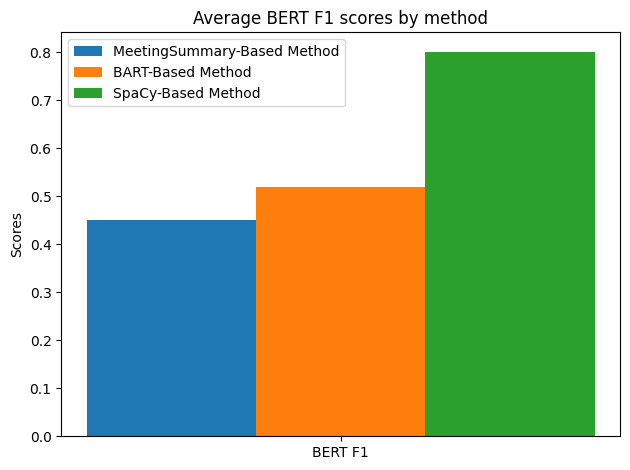

In [12]:
compute_todo_and_bert_score(longest_dialogues_todo)

Your max_length is set to 62, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Dialogue 1


Your max_length is set to 142, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Original Dialogue:
Emily: I need to pick up some groceries after work. I'll get milk, bread, and eggs. Should I get anything else? Maybe some fruits and vegetables too. And perhaps some snacks for the weekend. Yes, that should be enough.
Reference To-Do List:
Emily needs to pick up groceries after work. Emily will get milk, bread, and eggs. Emily considers getting fruits and vegetables. Emily thinks about buying snacks for the weekend.
MeetingSummary-Based To-Do List:
Emily will buy milk, bread, eggs, fruits and vegetables and snacks for the weekend after work.
BART-Based To-Do List:
Emily: I need to pick up some groceries after work. Should I get anything else? Emily: Yes, that should be enough.
SpaCy-Based To-Do List:
emily : pick groceries work . get milk , bread , eggs . get anything else ? maybe fruits vegetables . perhaps snacks weekend .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 51.40it/s]


done in 0.29 seconds, 3.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.98it/s]


done in 0.29 seconds, 3.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 48.90it/s]


done in 0.29 seconds, 3.41 sentences/sec
Dialogue 2


Your max_length is set to 142, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


Original Dialogue:
John: I have a busy day today. First, I have a meeting at 9 AM. Then, I need to finish the report by noon. After lunch, I have a conference call at 2 PM. In the evening, I’ll go to the gym. Busy but productive day ahead.
Reference To-Do List:
John has a meeting at 9 AM. John needs to finish the report by noon. John has a conference call at 2 PM. John plans to go to the gym in the evening.
MeetingSummary-Based To-Do List:
In the evening, he will go to the gym.
BART-Based To-Do List:
Then, I need to finish the report by noon.
SpaCy-Based To-Do List:
first , meeting 9 . evening , ’ go gym .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.70it/s]


done in 0.30 seconds, 3.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.99it/s]


done in 0.31 seconds, 3.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.97it/s]


done in 0.31 seconds, 3.18 sentences/sec
Dialogue 3


Your max_length is set to 142, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


Original Dialogue:
Anna: I need to clean the house this weekend. I’ll start with the living room. Then, I'll move to the kitchen. After that, the bedrooms need a good vacuuming. Lastly, I'll clean the bathrooms. It’s going to be a lot of work, but it’ll be worth it.
Reference To-Do List:
Anna needs to clean the house this weekend. Anna will start with the living room. Anna will then move to the kitchen. Anna plans to vacuum the bedrooms. Anna will clean the bathrooms last.
MeetingSummary-Based To-Do List:
She will start with the living room, then the kitchen, the bedrooms and the bathrooms.
BART-Based To-Do List:
Anna: I need to clean the house this weekend. After that, the bedrooms need a good vacuuming.
SpaCy-Based To-Do List:
’ start living room . , move kitchen . ’ going lot work , ’ worth .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 51.37it/s]


done in 0.33 seconds, 3.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.98it/s]


done in 0.32 seconds, 3.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.15it/s]
Your max_length is set to 62, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


done in 0.34 seconds, 2.98 sentences/sec
Dialogue 4


Your max_length is set to 142, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Original Dialogue:
Tom: I should call my parents today. I haven't talked to them in a while. I'll ask them how they're doing. Maybe I'll invite them over for dinner this weekend. It’ll be nice to catch up with them.
Reference To-Do List:
Tom should call his parents today. Tom will ask them how they're doing. Tom might invite them over for dinner this weekend.
MeetingSummary-Based To-Do List:
Tom will call his parents today to ask them how they're doing and maybe invite them for dinner this weekend.
BART-Based To-Do List:
Tom: I should call my parents today.
SpaCy-Based To-Do List:
tom : call parents today . maybe invite dinner weekend .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]


done in 0.22 seconds, 4.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 48.89it/s]


done in 0.27 seconds, 3.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 64.64it/s]


done in 0.29 seconds, 3.48 sentences/sec
Dialogue 5


Your max_length is set to 142, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


Original Dialogue:
Laura: I need to finish reading this book by the end of the week. I’m halfway through, so I need to read at least 50 pages a day. It’s a really interesting book, so it shouldn’t be too hard. I’ll make sure to find some quiet time each day to read.
Reference To-Do List:
Laura needs to finish reading her book by the end of the week. Laura plans to read at least 50 pages a day. Laura will find quiet time each day to read.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Laura: I need to finish reading this book by the end of the week.
SpaCy-Based To-Do List:
laura : finish reading book end week . ’ halfway , read least 50 pages day . ’ make sure find quiet time day read .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.31 seconds, 3.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 24.75it/s]


done in 0.38 seconds, 2.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.69it/s]


done in 0.30 seconds, 3.28 sentences/sec
Dialogue 6


Your max_length is set to 142, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


Original Dialogue:
Mike: I should start running again. It’s been months since I last ran. I’ll start with a short run, maybe 2 miles. Gradually, I’ll increase the distance. Running in the morning would be best, before work. Yes, I’ll start tomorrow.
Reference To-Do List:
Mike should start running again. Mike will start with a short run, maybe 2 miles. Mike plans to gradually increase the distance. Mike will run in the morning before work. Mike will start tomorrow.
MeetingSummary-Based To-Do List:
Mike will start running again tomorrow morning before work. He will start with a short 2-mile run.
BART-Based To-Do List:
Mike: I should start running again. Running in the morning would be best, before work. I want to get back to running.
SpaCy-Based To-Do List:
mike : start running . ’ start short run , maybe 2 miles . gradually , ’ increase distance . running morning would best , work . yes , ’ start tomorrow .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.12it/s]


done in 0.33 seconds, 3.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 91.15it/s]


done in 0.31 seconds, 3.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 48.86it/s]


done in 0.30 seconds, 3.29 sentences/sec
Dialogue 7


Your max_length is set to 142, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


Original Dialogue:
Sophie: I need to plan my vacation. I want to go somewhere warm, maybe a beach destination. I’ll look for flights to the Caribbean. I should also book a hotel. A place with good reviews and close to the beach would be ideal. I’m so excited!
Reference To-Do List:
Sophie needs to plan her vacation. Sophie wants to go to a warm beach destination. Sophie will look for flights to the Caribbean. Sophie should book a hotel with good reviews and close to the beach.
MeetingSummary-Based To-Do List:
Sophie will look for flights and book a hotel.
BART-Based To-Do List:
Sophie: I need to plan my vacation. I want to go somewhere warm, maybe a beach destination. I should also book a hotel. A place with good reviews and close to the beach would be ideal.
SpaCy-Based To-Do List:
want go somewhere warm , maybe beach destination . ’ look flights caribbean . place good reviews close beach would ideal .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.71it/s]


done in 0.31 seconds, 3.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 48.86it/s]


done in 0.32 seconds, 3.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 77.13it/s]
Your max_length is set to 62, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


done in 0.31 seconds, 3.28 sentences/sec
Dialogue 8


Your max_length is set to 142, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


Original Dialogue:
Alex: I need to fix my car this weekend. The brakes have been making a weird noise. I’ll take it to the mechanic first thing Saturday morning. Hopefully, it’s nothing too serious. I should also get the oil changed while I’m there.
Reference To-Do List:
Alex needs to fix his car this weekend. Alex will take it to the mechanic on Saturday morning. Alex hopes the brake issue is not serious. Alex should also get the oil changed.
MeetingSummary-Based To-Do List:
Alex's car brakes have been making a weird noise, so he will take it to the mechanic on Saturday morning.
BART-Based To-Do List:
I should also get the oil changed while I'm there. Alex: I need to fix my car this weekend.
SpaCy-Based To-Do List:
brakes making weird noise . ’ take mechanic first thing saturday morning . also get oil changed ’ .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 62.67it/s]


done in 0.31 seconds, 3.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.70it/s]


done in 0.30 seconds, 3.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.98it/s]


done in 0.30 seconds, 3.29 sentences/sec
Dialogue 9


Your max_length is set to 142, but your input_length is only 65. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


Original Dialogue:
Rachel: I should organize my closet. There are so many clothes I don’t wear anymore. I’ll start by sorting everything into keep, donate, and toss piles. It’ll be a big project, but I’ll feel so much better once it’s done.
Reference To-Do List:
Rachel should organize her closet. Rachel will sort clothes into keep, donate, and toss piles. Rachel will feel better once it's done.
MeetingSummary-Based To-Do List:
Rachel will sort through her clothes and sort them into keep, donate, and toss piles.
BART-Based To-Do List:
Rachel: I should organize my closet. It will be a big project, but I will feel so much better once it’s done.
SpaCy-Based To-Do List:
rachel : organize closet . many clothes ’ wear anymore . ’ start sorting everything keep , donate , toss piles . ’ big project , ’ feel much better ’ done .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.41it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.24 seconds, 4.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.54it/s]


done in 0.25 seconds, 3.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.75it/s]


done in 0.31 seconds, 3.24 sentences/sec
Dialogue 10


Your max_length is set to 142, but your input_length is only 65. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


Original Dialogue:
Kevin: I need to start eating healthier. I’ll begin by cutting out junk food. I’ll also add more fruits and vegetables to my diet. Maybe I should start cooking more meals at home too. It’s going to be a big change, but it’s necessary.
Reference To-Do List:
Kevin needs to start eating healthier. Kevin will cut out junk food. Kevin will add more fruits and vegetables to his diet. Kevin might start cooking more meals at home.
MeetingSummary-Based To-Do List:
He will cut out junk food and add more fruits and vegetables to his diet. Kevin will start cooking more at home.
BART-Based To-Do List:
Kevin: I need to start eating healthier. Maybe I should start cooking more meals at home too.
SpaCy-Based To-Do List:
kevin : start eating healthier . ’ begin cutting junk food . ’ also add fruits vegetables diet . maybe start cooking meals home . ’ going big change , ’ necessary .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.29 seconds, 3.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.98it/s]


done in 0.28 seconds, 3.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.31 seconds, 3.28 sentences/sec
Dialogue 11


Your max_length is set to 142, but your input_length is only 88. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


Original Dialogue:
Sarah: I need to catch up on my emails. There are so many unread messages. I’ll start with the most urgent ones. Then, I’ll go through the rest. I should also unsubscribe from newsletters I never read. That’ll help reduce the clutter. Maybe I can set aside some time every day to keep my inbox organized. It’s so easy to fall behind.
Reference To-Do List:
Sarah needs to catch up on her emails. Sarah will start with the most urgent messages. Sarah will go through the rest of the emails. Sarah should unsubscribe from unread newsletters. Sarah might set aside daily time to keep her inbox organized.
MeetingSummary-Based To-Do List:
She will start with the most urgent ones and unsubscribe from the rest.
BART-Based To-Do List:
Sarah: I need to catch up on my emails. I should also unsubscribe from newsletters I never read. Maybe I can set aside some time every day to keep my inbox organized.
SpaCy-Based To-Do List:
many unread messages . ’ start urgent ones . , ’ go rest . al

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 23.87it/s]


done in 0.44 seconds, 2.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 24.45it/s]


done in 0.42 seconds, 2.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 24.75it/s]


done in 0.42 seconds, 2.39 sentences/sec
Dialogue 12


Your max_length is set to 142, but your input_length is only 84. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


Original Dialogue:
Chris: I should start learning a new language. Spanish would be useful. I’ll look for an online course. Maybe I can practice with a language partner too. It’ll be a fun and rewarding challenge. I’ve always wanted to visit Spain and South America. Being able to speak the language would make the trips even more enjoyable. Yes, I’ll start today.
Reference To-Do List:
Chris should start learning Spanish. Chris will look for an online course. Chris might practice with a language partner. Chris wants to visit Spain and South America. Chris will start today.
MeetingSummary-Based To-Do List:
Chris will start learning Spanish today.
BART-Based To-Do List:
Being able to speak the language would make the trips even more enjoyable. Chris: I should start learning a new language. Spanish would be useful. Maybe I can practice with a language partner too.
SpaCy-Based To-Do List:
chris : start learning new language . ’ look online course . maybe practice language partner . ’ always w

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.14it/s]


done in 0.30 seconds, 3.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.75it/s]


done in 0.31 seconds, 3.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 46.59it/s]


done in 0.34 seconds, 2.98 sentences/sec
Dialogue 13


Your max_length is set to 142, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


Original Dialogue:
Megan: I need to find a new hobby. Something creative like painting or photography. I’ll look for local classes. It’ll be a nice way to relax and unwind. Plus, I’ll meet new people with similar interests. It’s been a while since I did something just for fun. Maybe I’ll start with a weekend workshop and see how it goes. Yes, that sounds perfect.
Reference To-Do List:
Megan needs to find a new hobby. Megan is considering painting or photography. Megan will look for local classes. Megan wants to meet new people with similar interests. Megan might start with a weekend workshop.
MeetingSummary-Based To-Do List:
She will look for local classes.
BART-Based To-Do List:
Megan: I need to find a new hobby.
SpaCy-Based To-Do List:
megan : find new hobby . something creative like painting photography . ’ look local classes . ’ nice way relax unwind . plus , ’ meet new people similar interests . maybe ’ start weekend workshop see goes . yes , sounds perfect .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 74.22it/s]


done in 0.31 seconds, 3.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 51.38it/s]


done in 0.32 seconds, 3.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 19.09it/s]


done in 0.45 seconds, 2.24 sentences/sec
Dialogue 14


Your max_length is set to 142, but your input_length is only 81. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)


Original Dialogue:
Daniel: I should start saving more money. I’ll create a budget to track my expenses. Maybe I can cut down on dining out. I’ll also set up a savings account. It’s important to be more financially responsible. I could start by setting small, achievable goals. Maybe save a certain amount each month and gradually increase it. Financial stability is crucial.
Reference To-Do List:
Daniel should start saving more money. Daniel will create a budget to track expenses. Daniel might cut down on dining out. Daniel will set up a savings account. Daniel will set small, achievable savings goals.
MeetingSummary-Based To-Do List:
Daniel will create a budget to track his expenses and set up a savings account.
BART-Based To-Do List:
Daniel: I should start saving more money. Maybe I can cut down on dining out. I could start by setting small, achievable goals.
SpaCy-Based To-Do List:
daniel : start saving money . ’ create budget track expenses . maybe cut dining . ’ also set savings acco

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.33 seconds, 3.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 44.51it/s]


done in 0.32 seconds, 3.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.71it/s]


done in 0.32 seconds, 3.15 sentences/sec
Dialogue 15


Your max_length is set to 142, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


Original Dialogue:
Olivia: I need to redecorate my living room. I’ll start by choosing a new color scheme. Maybe something bright and cheerful. I’ll look for some new furniture as well. A comfy couch and a stylish coffee table would be nice. I should also get some plants to add a touch of green. It’ll be a big project, but I’m excited to give the space a fresh look.
Reference To-Do List:
Olivia needs to redecorate her living room. Olivia will choose a new color scheme. Olivia will look for new furniture. Olivia should get a comfy couch and a stylish coffee table. Olivia plans to add some plants for a touch of green.
MeetingSummary-Based To-Do List:
She will choose a new color scheme and buy some new furniture. She should also buy some plants.
BART-Based To-Do List:
Olivia: I need to redecorate my living room. A comfy couch and a stylish coffee table would be nice. I should also get some plants to add a touch of green.
SpaCy-Based To-Do List:
olivia : redecorate living room . ’ start ch

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 22.53it/s]


done in 0.44 seconds, 2.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 25.07it/s]


done in 0.44 seconds, 2.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 222.39it/s]


done in 0.42 seconds, 2.36 sentences/sec
Dialogue 16


Your max_length is set to 142, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


Original Dialogue:
Mark: I need to plan my week ahead. On Monday, I have a project meeting in the morning. Tuesday is my deadline for the quarterly report. Wednesday, I need to visit the client’s site. Thursday, there’s a team-building activity in the afternoon. Friday, I’ll catch up on any pending tasks. It’s going to be a hectic week, but planning ahead will help me stay on top of things.
Reference To-Do List:
Mark needs to plan his week ahead. Mark has a project meeting on Monday morning. Mark's quarterly report deadline is on Tuesday. Mark needs to visit the client’s site on Wednesday. There is a team-building activity on Thursday afternoon. Mark will catch up on pending tasks on Friday.
MeetingSummary-Based To-Do List:
On Friday he will catch up on any pending tasks.
BART-Based To-Do List:
It's going to be a hectic week, but planning ahead will help him stay on top.
SpaCy-Based To-Do List:
wednesday , visit client ’ site . friday , ’ catch pending tasks . ’ going hectic week , pla

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.78it/s]


done in 0.55 seconds, 1.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]


done in 0.49 seconds, 2.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.53 seconds, 1.90 sentences/sec
Dialogue 17


Your max_length is set to 142, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


Original Dialogue:
Tina: I need to start a new workout routine. I’ll try to go to the gym at least three times a week. I’ll focus on cardio on Mondays, strength training on Wednesdays, and a mix of both on Fridays. I should also incorporate some yoga for flexibility. Keeping a workout log might help me stay motivated. It’s important to stay active and healthy.
Reference To-Do List:
Tina needs to start a new workout routine. Tina will go to the gym at least three times a week. Tina will focus on cardio on Mondays. Tina will do strength training on Wednesdays. Tina will do a mix of both on Fridays. Tina should incorporate yoga for flexibility. Tina might keep a workout log for motivation.
MeetingSummary-Based To-Do List:
Tina will try to go to the gym at least three times a week. She will focus on cardio on Mondays, strength training on Wednesdays and yoga on Fridays.
BART-Based To-Do List:
Tina: I need to start a new workout routine. I should also incorporate some yoga for flexibility. 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]


done in 0.49 seconds, 2.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.53it/s]


done in 0.50 seconds, 2.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.31it/s]


done in 0.49 seconds, 2.02 sentences/sec
Dialogue 18


Your max_length is set to 142, but your input_length is only 81. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)


Original Dialogue:
Nathan: I should start writing a journal. It might help me organize my thoughts better. I’ll start by writing a little every night before bed. Reflecting on my day and setting goals for tomorrow. It’s a good way to unwind and clear my mind. Maybe I can also jot down any creative ideas I have. This could be a really beneficial habit.
Reference To-Do List:
Nathan should start writing a journal. Nathan will write a little every night before bed. Nathan will reflect on his day and set goals for tomorrow. Nathan might jot down any creative ideas.
MeetingSummary-Based To-Do List:
Nathan will start writing in a journal every night before bedtime.
BART-Based To-Do List:
Nathan: I should start writing a journal. It might help me organize my thoughts better.
SpaCy-Based To-Do List:
nathan : start writing journal . help organize thoughts better . ’ start writing little every night bed . reflecting day setting goals tomorrow .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.71it/s]


done in 0.31 seconds, 3.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.75it/s]


done in 0.34 seconds, 2.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 57.25it/s]


done in 0.30 seconds, 3.31 sentences/sec
Dialogue 19


Your max_length is set to 142, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


Original Dialogue:
Lisa: I need to revamp my wardrobe. A lot of my clothes are outdated. I’ll start by sorting through what I have and deciding what to keep, donate, or throw away. Then, I’ll make a list of basics I need to buy. Maybe I’ll also add a few trendy pieces. Shopping can be fun if it’s planned out. Time for a fresh look!
Reference To-Do List:
Lisa needs to revamp her wardrobe. Lisa will sort through her clothes and decide what to keep, donate, or throw away. Lisa will make a list of basics to buy. Lisa might add a few trendy pieces.
MeetingSummary-Based To-Do List:
She will sort through what she has and decide what to keep, donate or throw away. Then she will make a list of basics and add a few trendy pieces.
BART-Based To-Do List:
Lisa will start by sorting through what she has and deciding what to keep, donate, or throw away. Then, she'll make a list of basics I need to buy. Shopping can be fun if it’s planned out.
SpaCy-Based To-Do List:
lot clothes outdated . ’ start sor

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 40.11it/s]


done in 0.34 seconds, 2.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 20.77it/s]


done in 0.42 seconds, 2.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 62.67it/s]


done in 0.34 seconds, 2.97 sentences/sec
Dialogue 20


Your max_length is set to 142, but your input_length is only 90. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)


Original Dialogue:
James: I need to prepare for my presentation next week. I’ll start by outlining the key points I want to cover. Then, I’ll create some slides to highlight the main ideas. Practice will be crucial, so I’ll rehearse a few times. I should also anticipate potential questions and prepare answers. Confidence is key, so I need to make sure I’m well-prepared.
Reference To-Do List:
James needs to prepare for his presentation next week. James will outline the key points to cover. James will create slides to highlight the main ideas. James will rehearse a few times. James should anticipate potential questions and prepare answers.
MeetingSummary-Based To-Do List:
He will create some slides to highlight the main ideas and rehearse a few times.
BART-Based To-Do List:
James: I need to prepare for my presentation next week. Practice will be crucial, so I’ll rehearse a few times. I should also anticipate potential questions and prepare answers. Confidence is key, soI need to make sur

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.75it/s]


done in 0.34 seconds, 2.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 251.35it/s]


done in 0.44 seconds, 2.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.44 seconds, 2.26 sentences/sec
Average BERT F1 score for MeetingSummary-Based Method: 0.8767274141311645
Average BERT F1 score for BART-Based Method: 0.9101037502288818
Average BERT F1 score for SpaCy-Based Method: 0.8597095012664795


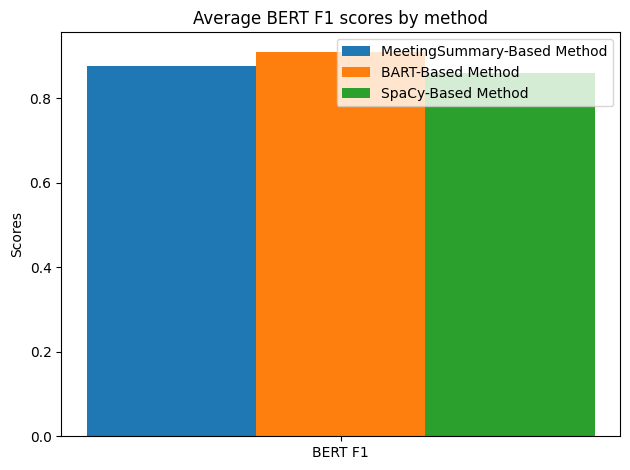

In [13]:
compute_todo_and_bert_score(single_speaker_todo)

Dialogue 1
Original Dialogue:
Dan: Guys, so are we going out on Sat?
Tim: I'm ready when you are.
Chris: I'm OK too, in the centre right?
Tom: I'm out guys sorry.
Dan: Come on Tom, what's wrong this time?
Tom: Told ya before. Party at in-laws.
Chris: Always the same story right.
Martin: Right guys, so what time?
Tim: Start @8? Finish 8 if we're lucky.
Dan: Yeah, I need to be home at 2 and ready to drive on Sunday noon.
Chris: So you takin it easy this time.
Martin: I guess I'd have to as well.
Tim: Guys you sound like 60 yos.
Chris: Tim, are the last two standing or what?
Tim: I gather.
Dan: You two will also grow up one day.
Reference To-Do List:
Dan, Tim, Chris, and Martin will go out on Saturday starting at 8 PM. Dan needs to be home by 2 AM and ready to drive on Sunday noon.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
dan : guys , going sat ? tim : 'm ready . chris : 'm ok , centre right ? tom : 'm guys sorry . dan : come tom , wrong time ? tom

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 45.58it/s]


done in 0.29 seconds, 3.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 45.58it/s]


done in 0.29 seconds, 3.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.74 seconds, 1.36 sentences/sec
Dialogue 2
Original Dialogue:
Steffen: Any room in any of the cars going to the infinity pool? I'm more handicapped than usual since I twisted my ankle yesterday.
Irene: We can give you a lift. Don’t think the car can make it all the way up, so will park at the bottom and hike up.
Steffen: Then I think I have to skip - can't really walk on my leg atm. But thanks anyway.
Irene: :(
Dan: I’m pretty sure Mr. Budd could make it, it’s 4-wheel drive, if Mr. Budd is going, although I haven’t seen the hill.
Luke: Have you been up there? How bad is the road actually?
Luke: lol, that explains it.
Luke: Sandy, is it Vistas de Olas?
Ben: Yes! Vistas de Olas.
Reference To-Do List:
Irene will give Steffen a lift to the infinity pool. Dan will check if Mr. Budd's 4-wheel drive can make it up the hill.
MeetingSummary-Based To-Do List:
Irene and Dan will give Steffen a lift to Vistas de Olas.
BART-Based To-Do List:
We can give you a lift. Don’t think the car can 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 52.62it/s]


done in 0.28 seconds, 3.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 283.80it/s]


done in 0.27 seconds, 3.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]


done in 0.62 seconds, 1.62 sentences/sec
Dialogue 3
Original Dialogue:
Maria: Who's gonna be at IMF lecture tomorrow? We can discuss all remaining questions after and do the calculations?
Alexander: I don't attend that class, but it is fine by me to meet.
Sarah: I will not be there, sorry. I am working.
Martha: So when? We are due on Monday.
Martha: That doesn't leave many options.
Alexander: On Saturday I already have to meet for another presentation, so my option is Friday afternoon or tomorrow.
Sarah: Tomorrow and on Friday I am available from 5 PM, during the weekend for the whole day.
Lawrence: I am meet after class anytime or make time over the weekend if needed.
Sarah: So can we meet tomorrow evening? 17:15?
Alexander: It is fine by me.
Lawrence: I will be late, but you can start without me.
Reference To-Do List:
Maria, Alexander, Sarah, and Lawrence will meet tomorrow at 5:15 PM to discuss questions and do calculations. Lawrence will join the meeting late.
MeetingSummary-Based 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.62it/s]


done in 0.27 seconds, 3.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.27 seconds, 3.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.60it/s]


done in 0.46 seconds, 2.17 sentences/sec
Dialogue 4
Original Dialogue:
Iris: Anyone know how to fix this? Trying to remove myself from an expense: > This expense involves a person who has left the group, and thus it can no longer be edited. If you wish to change this expense, you must first add that person back to your group.
Ken: You got the email address of the person?
Iris: Doesn't say. But probably Juls?
Luke: Probably have to delete that expense and re-add it.
Iris: I’m gonna try.
Luke: It's the car right?
Ken: Yip.
Iris: Gracias.
Ken: Fixed it - absorbed Juls' extra cost so we can remove her from the group again.
Gerardo: We will need to add her towards the car rental price.
Ken: True that - let me know when you are doing that and I'll add her back in.
Julia: Oops, that’d be me.
Ken: No worries, we got this.
Julia: Let me know how much I owe you so I can wire.
Ken: I guess by the end of the month – something unpredicted always pops up in the meantime so we have to recalculate aga

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 23.58it/s]


done in 0.43 seconds, 2.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 23.04it/s]


done in 0.43 seconds, 2.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]


done in 1.24 seconds, 0.81 sentences/sec
Dialogue 5
Original Dialogue:
Lynn: Sorry it's not worth it to have sex with some old wrinkled guy to pay your bills who rubs his old saggy balls all over you ewww fuck that.
Diana: I totally agree.
Diana: And she’s not even that pretty my Lord. But to each its own if materialistic as what she craves and I guess she is fulfilling her fantasies. But I don’t want no old balls on my forehead LOL no thanks.
Steviee: Lots of sugar babies don't actually sleep with them. Sometimes it's purely friendship and companionship.
Wilbur: OMG!!! Lynn...you've got me laughing so hard! I'm crying! Haha!! I seriously just spit my soda out!!! Lmao.
Kellene: Lynn what’s going to happen when you’re in your 60’s and every man close to your age has saggy balls? Will you only date younger men then? Perhaps, this girl's sugar daddy’s do exactly that.
Lynn: Can't even imagine.
Wilbur: You know what they say, from old eggs, comes salmonella lmao.
Lynn: Yes true.
Steviee: H

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.73it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.10 seconds, 9.64 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.31it/s]

done in 0.10 seconds, 9.66 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]


done in 0.84 seconds, 1.19 sentences/sec
Dialogue 6


Your max_length is set to 142, but your input_length is only 86. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=43)


Original Dialogue:
Natalie: Well well weeeeeell, I see something's going on here at last.
Martin: (Y)
Adam: Any confirmed data?
Anna: Hello everyone!!! I'd love to invite everybody to my bday. I would be extremely happy if you could come 6th of November at 19:30.
Martin: <3
Margot: <3
Mia: (Y)
Reference To-Do List:
Everyone is invited to Anna's birthday on November 6th at 19:30.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
I would be extremely happy if you could come 6th of November at 19:30.
SpaCy-Based To-Do List:
natalie : well well weeeeeell , see something going last . martin : ( ) adam : confirmed data ? anna : hello everyone ! ! ! would love invite everybody bday . would extremely happy could come 6th november 19:30 .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]

done in 0.17 seconds, 6.05 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.17 seconds, 5.83 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 21.33it/s]


done in 0.47 seconds, 2.11 sentences/sec
Dialogue 7
Original Dialogue:
Breonna: Melissa so are you ok with men acting like pigs and grabbing you whenever they feel like it?
Melissa: Of course not!
Breonna: So why you’re saying this?
Melissa: No one is saying men should behave like animals. It's that kind of thinking that makes men afraid to just be masculine in general though. Not all men are pigs.
Hailey: Thank you! I had a friend get yelled at by a girl for 5 minutes because he held the door for her and said “Ladies first”.
Melissa: Poor him.
Christine: Men aren't allowed to be men? How?
Hailey: Yeah, I felt sorry for him.
Holly: Melissa yes this!
Michelle: Not one of those fruit loop "feminists" speak for me!!! In fact MOST women can't stand them. GTFOH with your pussy hats, your metoo crap, you "screaming" at Potus through your vaginas etc. Don't try to shove your thinking on everyone. How about HIMTOO!!! I LOVE OUR strong REAL MEN!!!! TOO BAD IF ANY OF THOSE CRAZY CAT LADIES DON'T

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.10 seconds, 9.84 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.23it/s]

done in 0.14 seconds, 7.11 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.63 seconds, 1.60 sentences/sec
Dialogue 8
Original Dialogue:
Ed: Sinners!! Sex is for married people.
Valerie: Double sin if it’s anything but missionary style!
Chris: Then you go get married & leave us all alone.
Lor: You better hope all non-sin living is worth it or your consciousness after death is going to be butt hurt for eternity.
Atnee: Ed, take it easy.
Jessica: And the only purpose for sex is to make babies! !! That's it, hahaha.
Atnee: Lol.
Ed: Valerie, triple sin if you enjoy it!
Jessica: And only for procreation. :-))) And not to be enjoyed. :-)))
Matt: Ed, Ok. See you in hell!!
Ed: Matt, No you won’t. I don’t even look in the direction of another man.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
ed : sinners ! ! sex married people . valerie : double sin ’ anything missionary style ! chris : go get married & leave us alone . lor : better hope non-sin living worth consciousness death going butt hurt e

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.62it/s]

done in 0.09 seconds, 10.80 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.60it/s]

done in 0.11 seconds, 9.20 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.81 seconds, 1.24 sentences/sec
Dialogue 9


Your max_length is set to 142, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)


Original Dialogue:
Holt: Ladies, an important question. What to get my sis for bday?
Darla: How old?
Holt: 21.
Olive: Can't be too personal.
Treena: Cosmetics maybe?
Zula: I'd get her DVDs or book series. Always works.
Holt: You might be right. Set of DVDs and some cosmetics?
Olive: We'd all be happy I guess if you know what she likes.
Reference To-Do List:
Holt will get his sister a set of DVDs and some cosmetics for her 21st birthday.
MeetingSummary-Based To-Do List:
She will get a set of DVDs and cosmetics for her birthday.
BART-Based To-Do List:

SpaCy-Based To-Do List:
holt : ladies , important question . get sis bday ? holt : 21 . zula : would get dvds book series . always works . holt : right . set dvds cosmetics ? olive : would happy guess know likes .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.62it/s]

done in 0.16 seconds, 6.28 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.58it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.71it/s]

done in 0.16 seconds, 6.10 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 23.87it/s]


done in 0.44 seconds, 2.26 sentences/sec
Dialogue 10
Original Dialogue:
Sally: Hi guys have you heard about Natalie?
Tom: No. What about her?
Jane: You're such a gossip girl, Sally!
Sally: Come on! I'm sure you're all curious.
Tom: I am.
Sally: Relax Jane, what's your problem?!
Jane: She told us in confidence, I don't think we should share it with others.
Greg: Now I'm also curious.
Henriette: Tell us!
Henriette: Is she pregnant?
Sally: 💣💣💣
Sally: Guess who's the father!!!
Henriette: I knew it!
Henriette: Is it Mike?
Sally: Dave!!!
Henriette: WHAT????
Greg: That's insane!
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Sally: Relax Jane, what's your problem?! Jane: She told us in confidence, I don't think we should share it with others.
SpaCy-Based To-Do List:
sally : hi guys heard natalie ? jane : gossip girl , sally ! sally : come ! 'm sure curious . greg : 'm also curious . henriette : tell us ! henriette : pregnant ? sally : 💣💣💣 sally : guess fa

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.11 seconds, 9.35 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.31 seconds, 3.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.61 seconds, 1.63 sentences/sec
Dialogue 11
Original Dialogue:
Dan: Since I am not sure who all ate from the BBQ, I will Splitwise everyone equally. If you did not have any of the food from the BBQ, please feel free to remove yourself.
Ashley: Although I did not have any food, it looked delicious! Job well done, Dan.
Dan: Thanks!
Sara: Ahhh so sorry I wasn’t there :(
Ken: More food for us ;)
Sara: You’re such a meanie Ken!
Ken: Just kidding, sweetie :) but regrettably there are no leftovers for you.
Sara: K I’ll just remove myself since I didn’t eat.
Vicky: It was soo good! As usual, Dan = grill master :)
Eric: Gery and I cooked our own chicken and asparagus I believe.
Gerardo: Well, Dan the man cooked it. We only provided it.
Dan: Indeed.
Gerardo: Thanks Dan.
Eric: Cheers!
Gerardo: I removed us from the transaction Eric.
Reference To-Do List:
Dan will Splitwise everyone equally for the BBQ. Sara and Eric will remove themselves from the transaction.
MeetingSummary-Based To-Do 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]


done in 0.18 seconds, 5.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.63it/s]

done in 0.17 seconds, 5.81 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]


done in 0.84 seconds, 1.19 sentences/sec
Dialogue 12
Original Dialogue:
Maria: Who's gonna be at IMF lecture tomorrow? We can discuss all remaining questions after and do the calculations?
Alexander: I don't attend that class, but it is fine by me to meet.
Sarah: I will not be there, sorry. I am working.
Martha: So when? We are due on Monday.
Martha: That doesn't leave many options.
Alexander: On Saturday I already have to meet for another presentation, so my option is Friday afternoon or tomorrow.
Sarah: Tomorrow and on Friday I am available from 5 PM, during the weekend for the whole day.
Lawrence: I am meet after class anytime or make time over the weekend if needed.
Sarah: So can we meet tomorrow evening? 17:15?
Alexander: It is fine by me.
Lawrence: I will be late, but you can start without me.
Reference To-Do List:
Maria, Alexander, Sarah, and Lawrence will meet tomorrow at 5:15 PM to discuss questions and do calculations. Lawrence will join the meeting late.
MeetingSummary-Based

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.44it/s]


done in 0.26 seconds, 3.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 18.74it/s]


done in 0.29 seconds, 3.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]


done in 0.44 seconds, 2.27 sentences/sec
Dialogue 13


Your max_length is set to 142, but your input_length is only 86. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=43)


Original Dialogue:
Natalie: Well well weeeeeell, I see something's going on here at last.
Martin: (Y)
Adam: Any confirmed data?
Anna: Hello everyone!!! I'd love to invite everybody to my bday. I would be extremely happy if you could come 6th of November at 19:30.
Martin: <3
Margot: <3
Mia: (Y)
Reference To-Do List:
Everyone is invited to Anna's birthday on November 6th at 19:30.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
I would be extremely happy if you could come 6th of November at 19:30.
SpaCy-Based To-Do List:
natalie : well well weeeeeell , see something going last . martin : ( ) adam : confirmed data ? anna : hello everyone ! ! ! would love invite everybody bday . would extremely happy could come 6th november 19:30 .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.34it/s]

done in 0.15 seconds, 6.74 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]

done in 0.17 seconds, 5.77 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 26.03it/s]


done in 0.47 seconds, 2.12 sentences/sec
Dialogue 14
Original Dialogue:
Breonna: Melissa so are you ok with men acting like pigs and grabbing you whenever they feel like it?
Melissa: Of course not!
Breonna: So why you’re saying this?
Melissa: No one is saying men should behave like animals. It's that kind of thinking that makes men afraid to just be masculine in general though. Not all men are pigs.
Hailey: Thank you! I had a friend get yelled at by a girl for 5 minutes because he held the door for her and said “Ladies first”.
Melissa: Poor him.
Christine: Men aren't allowed to be men? How?
Hailey: Yeah, I felt sorry for him.
Holly: Melissa yes this!
Michelle: Not one of those fruit loop "feminists" speak for me!!! In fact MOST women can't stand them. GTFOH with your pussy hats, your metoo crap, you "screaming" at Potus through your vaginas etc. Don't try to shove your thinking on everyone. How about HIMTOO!!! I LOVE OUR strong REAL MEN!!!! TOO BAD IF ANY OF THOSE CRAZY CAT LADIES DON'

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.05it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]

done in 0.09 seconds, 10.74 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.31it/s]

done in 0.13 seconds, 7.64 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.57it/s]


done in 0.61 seconds, 1.64 sentences/sec
Dialogue 15
Original Dialogue:
Lynn: Sorry it's not worth it to have sex with some old wrinkled guy to pay your bills who rubs his old saggy balls all over you ewww fuck that.
Diana: I totally agree.
Diana: And she’s not even that pretty my Lord. But to each its own if materialistic as what she craves and I guess she is fulfilling her fantasies. But I don’t want no old balls on my forehead LOL no thanks.
Steviee: Lots of sugar babies don't actually sleep with them. Sometimes it's purely friendship and companionship.
Wilbur: OMG!!! Lynn...you've got me laughing so hard! I'm crying! Haha!! I seriously just spit my soda out!!! Lmao.
Kellene: Lynn what’s going to happen when you’re in your 60’s and every man close to your age has saggy balls? Will you only date younger men then? Perhaps, this girl's sugar daddy’s do exactly that.
Lynn: Can't even imagine.
Wilbur: You know what they say, from old eggs, comes salmonella lmao.
Lynn: Yes true.
Steviee: 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

done in 0.09 seconds, 10.70 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.37it/s]

done in 0.10 seconds, 10.21 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]


done in 0.87 seconds, 1.15 sentences/sec
Dialogue 16
Original Dialogue:
Steffen: Any room in any of the cars going to the infinity pool? I'm more handicapped than usual since I twisted my ankle yesterday.
Irene: We can give you a lift. Don’t think the car can make it all the way up, so will park at the bottom and hike up.
Steffen: Then I think I have to skip - can't really walk on my leg atm. But thanks anyway.
Irene: :(
Dan: I’m pretty sure Mr. Budd could make it, it’s 4-wheel drive, if Mr. Budd is going, although I haven’t seen the hill.
Luke: Have you been up there? How bad is the road actually?
Luke: lol, that explains it.
Luke: Sandy, is it Vistas de Olas?
Ben: Yes! Vistas de Olas.
Reference To-Do List:
Irene will give Steffen a lift to the infinity pool. Dan will check if Mr. Budd's 4-wheel drive can make it up the hill.
MeetingSummary-Based To-Do List:
Irene and Dan will give Steffen a lift to Vistas de Olas.
BART-Based To-Do List:
We can give you a lift. Don’t think the car can

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.27 seconds, 3.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]


done in 0.25 seconds, 4.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]


done in 0.58 seconds, 1.72 sentences/sec
Dialogue 17
Original Dialogue:
Steffen: Any room in any of the cars going to the infinity pool? I'm more handicapped than usual since I twisted my ankle yesterday.
Irene: We can give you a lift. Don’t think the car can make it all the way up, so will park at the bottom and hike up.
Steffen: Then I think I have to skip - can't really walk on my leg atm. But thanks anyway.
Irene: :(
Dan: I’m pretty sure Mr. Budd could make it, it’s 4-wheel drive, if Mr. Budd is going, although I haven’t seen the hill.
Luke: Have you been up there? How bad is the road actually?
Luke: lol, that explains it.
Luke: Sandy, is it Vistas de Olas?
Ben: Yes! Vistas de Olas.
Reference To-Do List:
Irene will give Steffen a lift to the infinity pool. Dan will check if Mr. Budd's 4-wheel drive can make it up the hill.
MeetingSummary-Based To-Do List:
Irene and Dan will give Steffen a lift to Vistas de Olas.
BART-Based To-Do List:
We can give you a lift. Don’t think the car can

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.75it/s]


done in 0.29 seconds, 3.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]


done in 0.25 seconds, 3.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.57it/s]


done in 0.61 seconds, 1.64 sentences/sec
Dialogue 18
Original Dialogue:
Ed: Sinners!! Sex is for married people.
Valerie: Double sin if it’s anything but missionary style!
Chris: Then you go get married & leave us all alone.
Lor: You better hope all non-sin living is worth it or your consciousness after death is going to be butt hurt for eternity.
Atnee: Ed, take it easy.
Jessica: And the only purpose for sex is to make babies! !! That's it, hahaha.
Atnee: Lol.
Ed: Valerie, triple sin if you enjoy it!
Jessica: And only for procreation. :-))) And not to be enjoyed. :-)))
Matt: Ed, Ok. See you in hell!!
Ed: Matt, No you won’t. I don’t even look in the direction of another man.
Reference To-Do List:
None.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
ed : sinners ! ! sex married people . valerie : double sin ’ anything missionary style ! chris : go get married & leave us alone . lor : better hope non-sin living worth consciousness death going butt hurt 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 285.89it/s]

done in 0.10 seconds, 9.98 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.07it/s]

done in 0.10 seconds, 9.97 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 243.84it/s]


done in 0.81 seconds, 1.23 sentences/sec
Average BERT F1 score for MeetingSummary-Based Method: 0.2525922689172957
Average BERT F1 score for BART-Based Method: 0.5898084839185079
Average BERT F1 score for SpaCy-Based Method: 0.8249143262704214


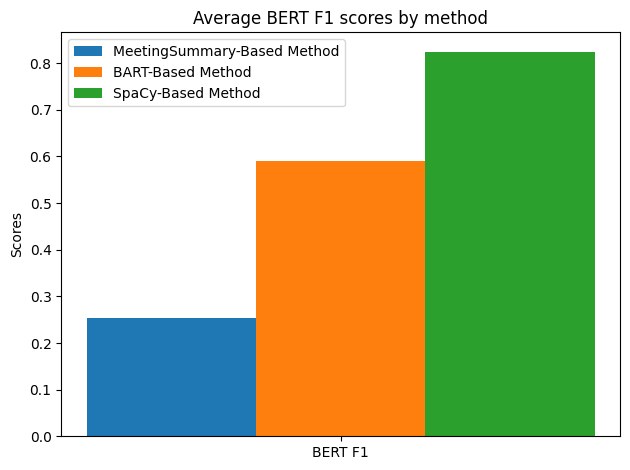

In [14]:
compute_todo_and_bert_score(multi_speaker_dialogues_todo)

Your max_length is set to 62, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Dialogue 1


Your max_length is set to 142, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Original Dialogue:
Ann: Movies at 5?
Mary: I can't, 6?
Ann: Maybe next time?
Mary: Actually nvm, 5 works.
Ann: Ok, see you.
Reference To-Do List:
Ann and Mary will go to the movies at 5.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
mary : actually nvm , 5 works . ann : ok , see .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.50it/s]

done in 0.13 seconds, 7.71 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.71it/s]

done in 0.13 seconds, 7.61 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.41it/s]
Your max_length is set to 62, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


done in 0.15 seconds, 6.78 sentences/sec
Dialogue 2


Your max_length is set to 142, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


Original Dialogue:
John: Hey, want to grab lunch?
Emily: Sure, where?
John: How about the new cafe?
Emily: Sounds good. 1 PM?
John: Perfect. See you then.
Reference To-Do List:
John and Emily will have lunch at the new cafe at 1 PM.
MeetingSummary-Based To-Do List:
John and Emily will have lunch together at the new cafe at 1 PM.
BART-Based To-Do List:
John: Hey, want to grab lunch?
SpaCy-Based To-Do List:
john : hey , want grab lunch ? emily : sounds good .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.71it/s]

done in 0.15 seconds, 6.71 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]

done in 0.14 seconds, 7.05 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]
Your max_length is set to 62, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


done in 0.14 seconds, 7.06 sentences/sec
Dialogue 3


Your max_length is set to 142, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Original Dialogue:
Tom: Did you finish the report?
Jerry: Not yet, still working on it.
Tom: When do you think it'll be done?
Jerry: By tomorrow morning.
Tom: Great, thanks.
Reference To-Do List:
Jerry will finish the report by tomorrow morning.
MeetingSummary-Based To-Do List:
Jerry will finish the report by tomorrow morning.
BART-Based To-Do List:

SpaCy-Based To-Do List:
tom : done ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.08it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.10 seconds, 9.95 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.23it/s]

done in 0.12 seconds, 8.24 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
Your max_length is set to 62, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


done in 0.12 seconds, 8.63 sentences/sec
Dialogue 4


Your max_length is set to 142, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


Original Dialogue:
Sarah: Can you pick up some milk?
Mark: Sure, anything else?
Sarah: Bread and eggs too.
Mark: Got it.
Reference To-Do List:
Mark will pick up milk, bread, and eggs.
MeetingSummary-Based To-Do List:
Mark will buy milk, bread and eggs on Sarah's request.
BART-Based To-Do List:
Sarah: Can you pick up some milk? Sarah, can you get some bread and eggs, too? Mark, can I get some milk too?
SpaCy-Based To-Do List:
sarah : pick milk ? mark : got .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]

done in 0.14 seconds, 7.02 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.26 seconds, 3.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
Your max_length is set to 62, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


done in 0.13 seconds, 7.41 sentences/sec
Dialogue 5


Your max_length is set to 142, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Original Dialogue:
Lisa: Are you coming to the party?
Megan: I might be late.
Lisa: No worries, just come when you can.
Megan: Will do, thanks!
Reference To-Do List:
Megan will come to the party and might be late.
MeetingSummary-Based To-Do List:
Megan might be late to the party.
BART-Based To-Do List:
Megan: I might be late. Megan: Will do, thanks! Lisa: You're welcome.
SpaCy-Based To-Do List:
lisa : coming party ? lisa : worries , come .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]

done in 0.13 seconds, 7.44 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.39it/s]


done in 0.22 seconds, 4.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]

done in 0.14 seconds, 6.98 sentences/sec
Dialogue 6


Original Dialogue:
Jake: We need to brainstorm ideas for the new marketing campaign.
Laura: Let’s think outside the box this time.
Michael: How about a social media challenge?
Jake: Interesting. What kind of challenge?
Laura: Maybe something related to our product.
Michael: Like a photo contest with our product?
Jake: That could work. Any other ideas?
Laura: We could collaborate with influencers.
Michael: That’s a great idea. They have a wide reach.
Jake: Let’s list potential influencers we could contact.
Laura: I’ll handle that.
Michael: I’ll start drafting the challenge rules.
Jake: Perfect, we’re off to a good start.
Reference To-Do List:
Laura will list potential influencers. Michael will draft the challenge rules.
MeetingSummary-Based To-Do List:
They want to create a social media challenge related to their product. They also want to work with influencers.
BART-Based To-Do List:
Michael: We need to brainstorm ideas for the new marketing campaign. Jake: That could work. Any other i

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.31it/s]

done in 0.18 seconds, 5.67 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 46.60it/s]


done in 0.28 seconds, 3.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 167.10it/s]


done in 0.56 seconds, 1.79 sentences/sec
Dialogue 7
Original Dialogue:
Ann: We need to decide on the venue for the event.
John: I was thinking about the downtown hall.
Mary: Isn't that place a bit too small for our crowd?
Ann: True, but it’s quite central.
John: How about the new convention center?
Mary: That could work. It’s spacious and modern.
Ann: But isn’t it too expensive?
John: I heard they offer discounts for non-profits.
Mary: Really? That’s great news!
Ann: Then we should definitely consider it.
John: I’ll call them to get a quote.
Mary: Perfect, let us know what they say.
Ann: Sounds like a plan.
Reference To-Do List:
John will call the new convention center to get a quote.
MeetingSummary-Based To-Do List:
John will call the new convention center to get a quote on the venue for the event.
BART-Based To-Do List:
Mary: We need to decide on the venue for the event. Mary: That could work. Ann: Then we should definitely consider it.
SpaCy-Based To-Do List:
ann : decide venue even

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.18it/s]

done in 0.16 seconds, 6.20 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


done in 0.28 seconds, 3.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]


done in 0.50 seconds, 2.01 sentences/sec
Dialogue 8
Original Dialogue:
Emily: We need to pick a destination for our next trip.
Liam: How about Italy?
Sophia: Italy sounds amazing! But what about the budget?
Emily: We could look for budget-friendly options.
Liam: We can stay in hostels or Airbnb.
Sophia: And maybe we can find cheap flights if we book early.
Emily: Good point. When should we go?
Liam: How about September?
Sophia: Perfect, the weather will still be nice.
Emily: Let’s start planning the itinerary.
Liam: I’ll check flights and accommodation.
Sophia: And I’ll research places to visit.
Emily: Great teamwork! This is going to be an awesome trip.
Reference To-Do List:
Liam will check flights and accommodation. Sophia will research places to visit.
MeetingSummary-Based To-Do List:
Emily, Liam and Sophia will go to Italy in September. They will stay in hostels or Airbnb. Liam will check flights and accommodation. Sophia will research places to visit.
BART-Based To-Do List:

SpaCy

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.97it/s]


done in 0.29 seconds, 3.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.34it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.66it/s]

done in 0.15 seconds, 6.82 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.65it/s]


done in 0.70 seconds, 1.43 sentences/sec
Dialogue 9
Original Dialogue:
Linda: What should we do for Kate's birthday?
Tom: We could throw a surprise party.
Sophie: I love that idea! Where should we have it?
Linda: How about her favorite restaurant?
Tom: It might be too crowded and obvious.
Sophie: Maybe we can book a private room there.
Linda: That’s a great compromise.
Tom: I’ll call the restaurant to check availability.
Sophie: I can help with the decorations.
Linda: And I’ll handle the guest list.
Tom: This is going to be great!
Sophie: Kate will be so surprised and happy.
Linda: Definitely, she deserves it.
Reference To-Do List:
Tom will call the restaurant to check availability. Sophie will help with the decorations. Linda will handle the guest list.
MeetingSummary-Based To-Do List:
Linda, Tom and Sophie will throw a surprise party at Kate's favourite restaurant. Tom will call the restaurant to check availability. Sophie will help with the decorations. Linda will handle the guest l

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 55.70it/s]


done in 0.31 seconds, 3.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 60.71it/s]


done in 0.30 seconds, 3.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.13it/s]


done in 0.48 seconds, 2.08 sentences/sec
Dialogue 10
Original Dialogue:
Mike: We should plan a team-building activity.
Sarah: That’s a good idea. Any suggestions?
Jake: What about a hiking trip?
Mike: Not everyone is into hiking.
Sarah: How about an escape room?
Jake: That sounds fun and inclusive.
Mike: I agree. It’s also good for teamwork.
Sarah: I’ll look for the best-rated escape rooms in the area.
Jake: I can help with that too.
Mike: Great, let’s decide on a date.
Sarah: How about next Friday?
Jake: Works for me.
Mike: Perfect, let’s finalize it then.
Reference To-Do List:
Sarah will look for the best-rated escape rooms. They will finalize the date for next Friday.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Mike and Sarah want to plan a team-building activity.
SpaCy-Based To-Do List:
mike : plan team-building activity . sarah : escape room ? jake : sounds fun inclusive . mike : agree . sarah : ’ look best-rated escape rooms area . mike : great , let ’ decide date . 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.18 seconds, 5.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]

done in 0.18 seconds, 5.58 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 285.27it/s]


done in 0.51 seconds, 1.96 sentences/sec
Dialogue 11
Original Dialogue:
Emily: I think we should re-evaluate our marketing strategy.
James: Why do you say that?
Emily: Our current approach isn’t yielding the results we want.
James: What do you suggest we change?
Emily: We should focus more on social media campaigns.
James: That makes sense. What platforms do you think are best?
Emily: Instagram and TikTok have a lot of potential.
James: I agree. Should we hire a social media manager?
Emily: Yes, and we can also collaborate with influencers.
James: That’s a good idea. Any influencers in mind?
Emily: I have a few in mind. I can make a list.
James: Great, let’s get started on this right away.
Emily: I’ll draft a new strategy and share it with you.
Reference To-Do List:
Emily will draft a new marketing strategy and share it with James. Emily will make a list of influencers.
MeetingSummary-Based To-Do List:
Emily will draft a new marketing strategy and share it with James. They will hire a 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.07it/s]


done in 0.23 seconds, 4.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 62.65it/s]


done in 0.30 seconds, 3.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.76 seconds, 1.32 sentences/sec
Dialogue 12
Original Dialogue:
John: Did you see the latest sales report?
Alice: Yes, our numbers are down this quarter.
John: We need to figure out why.
Alice: I think it’s because of the new competitor.
John: That’s possible. How should we respond?
Alice: We need to improve our product and marketing.
John: Agreed. Do you have any specific ideas?
Alice: We could launch a new feature.
John: That’s a good start. What else?
Alice: A targeted ad campaign might help.
John: Let’s work on a proposal for these changes.
Alice: I’ll start drafting it now.
John: Thanks, Alice. We’ll turn this around.
Reference To-Do List:
Alice will start drafting a proposal for product and marketing improvements.
MeetingSummary-Based To-Do List:
They need to improve their product and marketing. John and Alice will work on a proposal to address this.
BART-Based To-Do List:
Alice: We need to improve our product and marketing.
SpaCy-Based To-Do List:
john : see latest sales

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.18it/s]

done in 0.19 seconds, 5.33 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.15it/s]

done in 0.16 seconds, 6.20 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.49 seconds, 2.02 sentences/sec
Dialogue 13
Original Dialogue:
Karen: Are we still on for the meeting later?
Tom: Yes, I’m ready when you are.
Karen: Do you have the presentation materials?
Tom: I do. What about the handouts?
Karen: I printed them this morning.
Tom: Great, we’re all set then.
Karen: Did you confirm the time with the client?
Tom: Yes, they’ll be here at 3 PM.
Karen: Perfect. Let’s review the main points once more.
Tom: Sure, I’ll pull up the slides.
Karen: Thanks, Tom. This is going to go well.
Tom: I have a good feeling about it too.
Reference To-Do List:
Karen and Tom will review the main points of the presentation. Tom will pull up the slides. They will meet the client at 3 PM.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:

SpaCy-Based To-Do List:
karen : still meeting later ? karen : printed morning . tom : great , ’ set . karen : confirm time client ? let ’ review main points . tom : sure , ’ pull slides . going go well .



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


done in 0.30 seconds, 3.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]


done in 0.26 seconds, 3.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 21.80it/s]


done in 0.43 seconds, 2.33 sentences/sec
Dialogue 14
Original Dialogue:
Dave: Are we all set for the presentation tomorrow?
Megan: I’ve finished the slides.
Dave: What about the data analysis part?
Megan: I can cover that.
Dave: And the conclusion?
Megan: I’ve included it at the end.
Dave: Great, should we do a run-through?
Megan: Yes, after lunch?
Dave: Works for me.
Megan: I’ll reserve the conference room.
Dave: Good idea, thanks.
Megan: No problem, we’ll be ready.
Dave: I’m confident we’ll do well.
Reference To-Do List:
Megan will cover the data analysis part. Megan will reserve the conference room for a run-through after lunch.
MeetingSummary-Based To-Do List:
Megan will cover the data analysis part. Megan and Dave will do a run-through after lunch in the conference room.
BART-Based To-Do List:

SpaCy-Based To-Do List:
dave : set presentation tomorrow ? megan : ’ finished slides . megan : cover . megan : ’ included end . dave : great , run-through ?



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.21it/s]


done in 0.22 seconds, 4.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 200.51it/s]

done in 0.18 seconds, 5.44 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 46.61it/s]


done in 0.33 seconds, 3.00 sentences/sec
Dialogue 15
Original Dialogue:
Nina: We need to finalize the guest list for the conference.
Eric: Do we have a preliminary list?
Nina: Yes, but we need to add more industry experts.
Eric: Any suggestions?
Nina: How about Dr. Smith from MIT?
Eric: Great idea. And maybe Professor Lee from Stanford?
Nina: Perfect. What about keynote speakers?
Eric: We should invite the CEO of TechCorp.
Nina: Excellent. Let’s send out the invitations soon.
Eric: I’ll draft the invitations today.
Nina: Thanks, Eric. We’re making good progress.
Eric: Yes, we are. This conference will be a success.
Reference To-Do List:
Eric will draft the invitations for the conference.
MeetingSummary-Based To-Do List:
Eric will draft invitations today for the conference. He will invite Dr. Smith from MIT, Professor Lee from Stanford and the CEO of TechCorp.
BART-Based To-Do List:
Nina: We need to finalize the guest list for the conference. Eric: We should invite the CEO of TechCorp.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 58.98it/s]


done in 0.27 seconds, 3.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 51.40it/s]


done in 0.25 seconds, 4.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 69.12it/s]


done in 0.33 seconds, 3.06 sentences/sec
Dialogue 16
Original Dialogue:
Ann: We need to decide on the venue for the event.
John: I was thinking about the downtown hall.
Mary: Isn't that place a bit too small for our crowd?
Ann: True, but it’s quite central.
John: How about the new convention center?
Mary: That could work. It’s spacious and modern.
Ann: But isn’t it too expensive?
John: I heard they offer discounts for non-profits.
Mary: Really? That’s great news!
Ann: Then we should definitely consider it.
John: I’ll call them to get a quote.
Mary: Perfect, let us know what they say.
Ann: Sounds like a plan.
Reference To-Do List:
John will call the new convention center to get a quote.
MeetingSummary-Based To-Do List:
John will call the new convention center to get a quote on the venue for the event.
BART-Based To-Do List:
Mary: We need to decide on the venue for the event. Mary: That could work. Ann: Then we should definitely consider it.
SpaCy-Based To-Do List:
ann : decide venue eve

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]

done in 0.17 seconds, 5.87 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.74it/s]


done in 0.26 seconds, 3.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.10it/s]


done in 0.49 seconds, 2.06 sentences/sec
Dialogue 17
Original Dialogue:
Mike: We should plan a team-building activity.
Sarah: That’s a good idea. Any suggestions?
Jake: What about a hiking trip?
Mike: Not everyone is into hiking.
Sarah: How about an escape room?
Jake: That sounds fun and inclusive.
Mike: I agree. It’s also good for teamwork.
Sarah: I’ll look for the best-rated escape rooms in the area.
Jake: I can help with that too.
Mike: Great, let’s decide on a date.
Sarah: How about next Friday?
Jake: Works for me.
Mike: Perfect, let’s finalize it then.
Reference To-Do List:
Sarah will look for the best-rated escape rooms. They will finalize the date for next Friday.
MeetingSummary-Based To-Do List:

BART-Based To-Do List:
Mike and Sarah want to plan a team-building activity.
SpaCy-Based To-Do List:
mike : plan team-building activity . sarah : escape room ? jake : sounds fun inclusive . mike : agree . sarah : ’ look best-rated escape rooms area . mike : great , let ’ decide date . 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.71it/s]

done in 0.18 seconds, 5.46 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.74it/s]

done in 0.17 seconds, 5.82 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.02it/s]


done in 0.51 seconds, 1.95 sentences/sec
Dialogue 18
Original Dialogue:
Linda: What should we do for Kate's birthday?
Tom: We could throw a surprise party.
Sophie: I love that idea! Where should we have it?
Linda: How about her favorite restaurant?
Tom: It might be too crowded and obvious.
Sophie: Maybe we can book a private room there.
Linda: That’s a great compromise.
Tom: I’ll call the restaurant to check availability.
Sophie: I can help with the decorations.
Linda: And I’ll handle the guest list.
Tom: This is going to be great!
Sophie: Kate will be so surprised and happy.
Linda: Definitely, she deserves it.
Reference To-Do List:
Tom will call the restaurant to check availability. Sophie will help with the decorations. Linda will handle the guest list.
MeetingSummary-Based To-Do List:
Linda, Tom and Sophie will throw a surprise party at Kate's favourite restaurant. Tom will call the restaurant to check availability. Sophie will help with the decorations. Linda will handle the guest 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 48.87it/s]


done in 0.32 seconds, 3.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 54.15it/s]


done in 0.31 seconds, 3.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.69it/s]


done in 0.50 seconds, 2.00 sentences/sec
Dialogue 19
Original Dialogue:
Emily: We need to pick a destination for our next trip.
Liam: How about Italy?
Sophia: Italy sounds amazing! But what about the budget?
Emily: We could look for budget-friendly options.
Liam: We can stay in hostels or Airbnb.
Sophia: And maybe we can find cheap flights if we book early.
Emily: Good point. When should we go?
Liam: How about September?
Sophia: Perfect, the weather will still be nice.
Emily: Let’s start planning the itinerary.
Liam: I’ll check flights and accommodation.
Sophia: And I’ll research places to visit.
Emily: Great teamwork! This is going to be an awesome trip.
Reference To-Do List:
Liam will check flights and accommodation. Sophia will research places to visit.
MeetingSummary-Based To-Do List:
Emily, Liam and Sophia will go to Italy in September. They will stay in hostels or Airbnb. Liam will check flights and accommodation. Sophia will research places to visit.
BART-Based To-Do List:

SpaC

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 47.75it/s]


done in 0.30 seconds, 3.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

done in 0.17 seconds, 5.73 sentences/sec



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.72it/s]


done in 0.70 seconds, 1.43 sentences/sec
Dialogue 20
Original Dialogue:
Jake: We need to brainstorm ideas for the new marketing campaign.
Laura: Let’s think outside the box this time.
Michael: How about a social media challenge?
Jake: Interesting. What kind of challenge?
Laura: Maybe something related to our product.
Michael: Like a photo contest with our product?
Jake: That could work. Any other ideas?
Laura: We could collaborate with influencers.
Michael: That’s a great idea. They have a wide reach.
Jake: Let’s list potential influencers we could contact.
Laura: I’ll handle that.
Michael: I’ll start drafting the challenge rules.
Jake: Perfect, we’re off to a good start.
Reference To-Do List:
Laura will list potential influencers. Michael will draft the challenge rules.
MeetingSummary-Based To-Do List:
They want to create a social media challenge related to their product. They also want to work with influencers.
BART-Based To-Do List:
Michael: We need to brainstorm ideas for the new m

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.13it/s]


done in 0.19 seconds, 5.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 50.14it/s]


done in 0.28 seconds, 3.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 501.41it/s]


done in 0.58 seconds, 1.72 sentences/sec
Average BERT F1 score for MeetingSummary-Based Method: 0.7554763376712799
Average BERT F1 score for BART-Based Method: 0.6211281746625901
Average BERT F1 score for SpaCy-Based Method: 0.8328653484582901


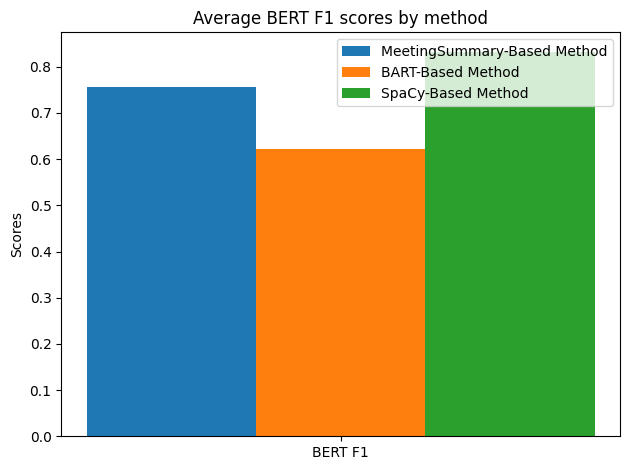

In [15]:
compute_todo_and_bert_score(contradictions_dialogues_todo)